# Time Domain Analysis of Currency Time Series Data Part 2 


In finance, volatility is the degree of variation of trading series price over time as measured by the  standard deviation of logarithmic returns.  Volatility is a statistical measure of the dispersion of returns for a given currency pair exchange rate. It is directly related to the risk associated with security, i.e the higher the volatility higher the risk.  A higher volatility means that a exchange rate value can be potentially spread out over large range of values. This means that the value of currency exchange value can change dramatically over a short time period in either direction. A lower volatility means that a currency exchange value does not fluctuate dramatically  and tends to be more steady.


In [3]:
!pip install quandl

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import datetime as dt
import math
from scipy import signal
from scipy import stats
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.linear_model import LinearRegression

In [5]:
#First day of ethereum trading
start = dt.datetime(2015, 8, 6)
#Enter a specific date or today
#end = datetime.datetime(2017, 12, 29)
end = dt.date.today()

In [13]:
#Retrieving the Fiat Data set from quandl https://www.quandl.com/
quandl.ApiConfig.api_key = 'VjFuzxCrAVganxficKxm'
usd_gbp  = quandl.get('FRED/DEXUSUK')
usd_cny  = quandl.get('FRED/DEXCHUS')
usd_eur  = quandl.get('FRED/DEXUSEU')
gbp_cny  = quandl.get('BOE/XUDLBK89')
eur_cny  = quandl.get('ECB/EURCNY')
eur_gbp  = quandl.get('ECB/EURGBP')
usd_jpy  = quandl.get('FED/RXI_N_B_JA')

#Retrieving the Crypto Data set 
#CRYPTO Data
btc_usd_df = pd.read_csv('BTC-USD.csv')
eth_usd_df= pd.read_csv('ETH-USD.csv')
btc_eth_df= pd.read_csv('BTC-ETH.csv')
btc_jpy_df= pd.read_csv('BTC-JPY.csv')
eth_jpy_df= pd.read_csv('Quoine_ETHJPY_d.csv')


In [14]:
#Reformating the dataframe 
btc_usd=pd.DataFrame(data=btc_usd_df.Close)
btc_usd.index=btc_usd_df.Date
btc_usd.columns = ['Value']

eth_usd=pd.DataFrame(data=eth_usd_df.Close)
eth_usd.index=eth_usd_df.Date
eth_usd.columns = ['Value']

btc_eth=pd.DataFrame(data=btc_eth_df.Close)
btc_eth.index=btc_eth_df.Date
btc_eth.columns = ['Value']
btc_jpy=pd.DataFrame(data=btc_jpy_df.Close)
btc_jpy.index=btc_jpy_df.Date
btc_jpy.columns = ['Value']
eth_jpy=pd.DataFrame(data=eth_jpy_df.Close)
eth_jpy.index=eth_jpy_df.Date
eth_jpy.columns = ['Value']

In [8]:
#tickers = ['usd_gbp', 'usd_cny', 'usd_eur','gbp_cny','eur_cny','eur_gbp','usd_jpy', 'btc_usd','eth_usd','btc_eth','btc_jpy','eth_jpy']
#tickers
#df = pd.concat([usd_gbp, usd_cny, usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy], axis = 1)
#df.columns.names = ['Currency Pair','Daily Close']
#df.tail()
#result = pd.concat([df1, df4], axis=1, join='inner')
#df = pd.concat([usd_gbp, usd_cny, usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy], axis = 1,join='inner')
#df.columns.names = ['Currency Pair','Daily Close']
#df.tail()
#result = pd.merge(left, right, left_index=True, right_index=True, how='inner');
#result = left.join(right, how='inner')
#result = left.join(right)

In [9]:
#Reading USDX data 
d_xy= pd.read_csv('USDX.csv')
dxy= d_xy.set_index('Date')
dxy = dxy.sort_index()
dxy.index =pd.to_datetime(dxy.index)
dxy= dxy[~dxy.index.duplicated(keep='first')]

In [17]:
#Remove duplicate index from the data frame 
btc_usd= btc_usd[~btc_usd.index.duplicated(keep='first')]
eth_usd= eth_usd[~eth_usd.index.duplicated(keep='first')]
btc_eth= btc_eth[~btc_eth.index.duplicated(keep='first')]
btc_jpy= btc_jpy[~btc_jpy.index.duplicated(keep='first')]
eth_jpy= eth_jpy[~eth_jpy.index.duplicated(keep='first')]

In [18]:
#Seting index of data frame into datetime format 
btc_usd.index =pd.to_datetime(btc_usd.index)
eth_usd.index =pd.to_datetime(eth_usd.index)
btc_eth.index =pd.to_datetime(btc_eth.index)
btc_jpy.index =pd.to_datetime(btc_jpy.index)
eth_jpy.index =pd.to_datetime(eth_jpy.index)


Returns - For a stock, it is the percent change in price, accounting for dividends. For a currency, it is the percent change over a given time period. 

Horizons- The total length of time that an investor expects to hold a security or a portfolio. The investment horizon determines the investor's income needs and desired risk exposure, which aid in security selection.


Histogram : Histograms are a very useful tool for description and analysis of a large set of data, and is very easy to understand as it is a visual tool. The histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins. A moving average convergence divergence (MACD) histogram, which is an indicator that illustrates the difference between the MACD value and the current rate value. A frequency distribution shows how often each different value in a set of data occurs. A histogram is the most commonly used graph to show frequency distributions. 
The histogram of daily, monthly, and yearly returns shows the distribution of percent return for each currency pair.  

Three different methods methods are used to calculate weekly, monthly, and yearly percent return and their frequency distribution are studied using histogram plots.

Method 1:
In this method, for weekly analysis, firstly the data set is grouped together on week basis and mean price over each calendar week is calculated. The weekly returns are then calculated as percentage change of mean price in calendar weeks. Similarly, for monthly, the data set is grouped into calendar months and monthly returns are calculated using change in mean price between calendar months. Similarly for yearly change, percentage returns are calculated using change in mean price over calendar year. 


Method 2: 
This method calculates percentage change simply using current price and price before period ‘p’. For weekly return, the percent change is calculated using current price and price one week before same time. Similarly monthly and yearly percent returns are calculated using current price and price a month and year before respectively. 


Method 3:
In this method we used rolling means over a week, month and year before current time and price. The percent returns are calculated over the weekly, monthly and yearly mean prices from current date time (not calendar week, month and year). 


# Daily % Change

In [21]:
# Daily return = {x(t)-x(t-1)}/x(t-1) 
#x(t): value    t: day 
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html

daily_df=pd.DataFrame()
daily_df['usd_gbp']=usd_gbp.Value.pct_change(fill_method='ffill')
daily_df['usd_cny']=usd_cny.Value.pct_change(fill_method='ffill')
daily_df['usd_eur']=usd_eur.Value.pct_change(fill_method='ffill')
daily_df['gbp_cny']=gbp_cny.Value.pct_change(fill_method='ffill')
daily_df['eur_cny']=eur_cny.Value.pct_change(fill_method='ffill')
daily_df['eur_gbp']=eur_gbp.Value.pct_change(fill_method='ffill')
daily_df['usd_jpy']=usd_jpy.Value.pct_change(fill_method='ffill')
daily_df['btc_usd']=btc_usd.Value.pct_change(fill_method='ffill')
daily_df['eth_usd']=eth_usd.Value.pct_change(fill_method='ffill')
daily_df['btc_eth']=btc_eth.Value.pct_change(fill_method='ffill')
daily_df['btc_jpy']=btc_jpy.Value.pct_change(fill_method='ffill')
daily_df['eth_jpy']=eth_jpy.Value.pct_change(fill_method='ffill')
daily_df['usdx']=dxy.Value.pct_change(fill_method='ffill')

returns=daily_df

#Crypto
#daily_cr_df=pd.DataFrame()
#daily_cr_df['btc_usd']=btc_usd.Value.pct_change(fill_method='ffill')
#daily_cr_df['eth_usd']=eth_usd.Value.pct_change(fill_method='ffill')
#daily_cr_df['btc_eth']=btc_eth.Value.pct_change(fill_method='ffill')
#daily_cr_df['btc_jpy']=btc_jpy.Value.pct_change(fill_method='ffill')
#daily_cr_df['eth_jpy']=eth_jpy.Value.pct_change(fill_method='ffill')

In [22]:
daily_df=daily_df.dropna()


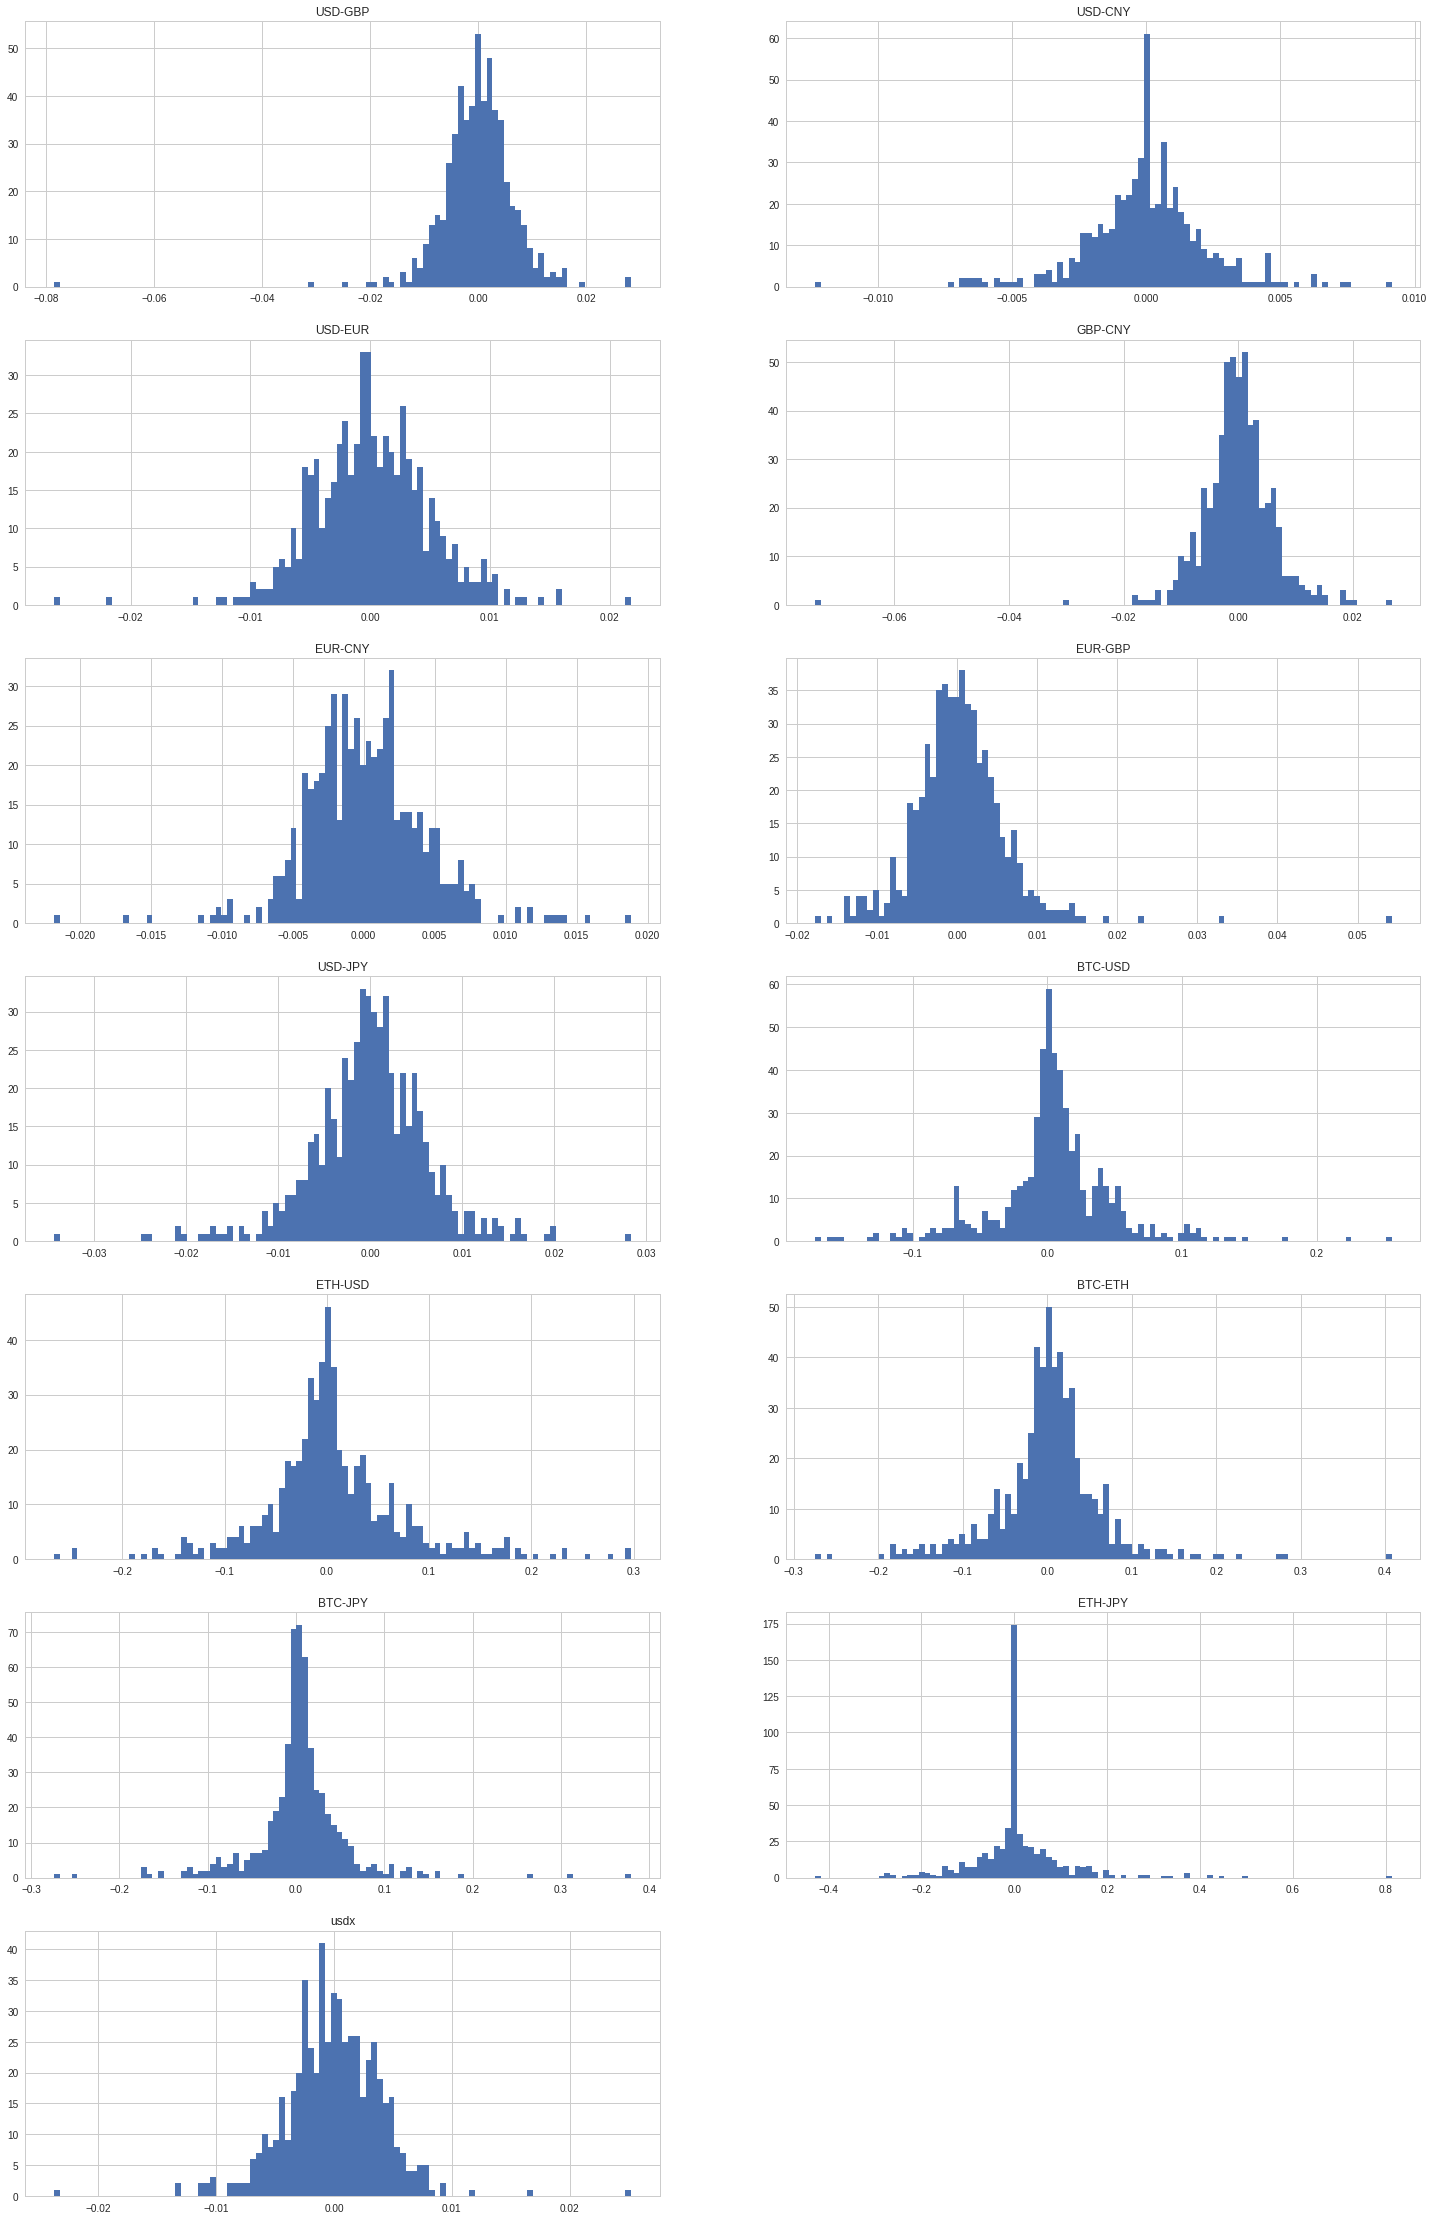

In [23]:
#plotting the histogram 
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
plt.hist(daily_df['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(daily_df['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(daily_df['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(daily_df['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(daily_df['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(daily_df['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(daily_df['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(daily_df['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(daily_df['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(daily_df['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(daily_df['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(daily_df['eth_jpy'],bins=100)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
plt.hist(daily_df['usdx'],bins=100)
plt.title('usdx')
          

# Weekly % Change - Method 1

In [24]:
#Grouping the monthly data points together and finding the difference between the monthly mean value
week_df=pd.DataFrame()
week_groupby = usd_gbp.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['usd_gbp']=week_diff

week_groupby = usd_cny.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['usd_cny']=week_diff

week_groupby = usd_eur.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['usd_eur']=week_diff

week_groupby = gbp_cny.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['gbp_cny']=week_diff

week_groupby = eur_cny.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['eur_cny']=week_diff

week_groupby = eur_gbp.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['eur_gbp']=week_diff

week_groupby = usd_jpy.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['usd_jpy']=week_diff

week_groupby = btc_usd.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['btc_usd']=week_diff

week_groupby = eth_usd.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['eth_usd']=week_diff

week_groupby = btc_eth.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['btc_eth']=week_diff

week_groupby = btc_jpy.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['btc_jpy']=week_diff

week_groupby = eth_jpy.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['eth_jpy']=week_diff

week_groupby = dxy.groupby(pd.TimeGrouper(freq='W'))
week_diff = (week_groupby['Value'].mean()).pct_change(fill_method='ffill')
week_df['usdx']=week_diff


In [25]:
week_df=week_df.dropna()

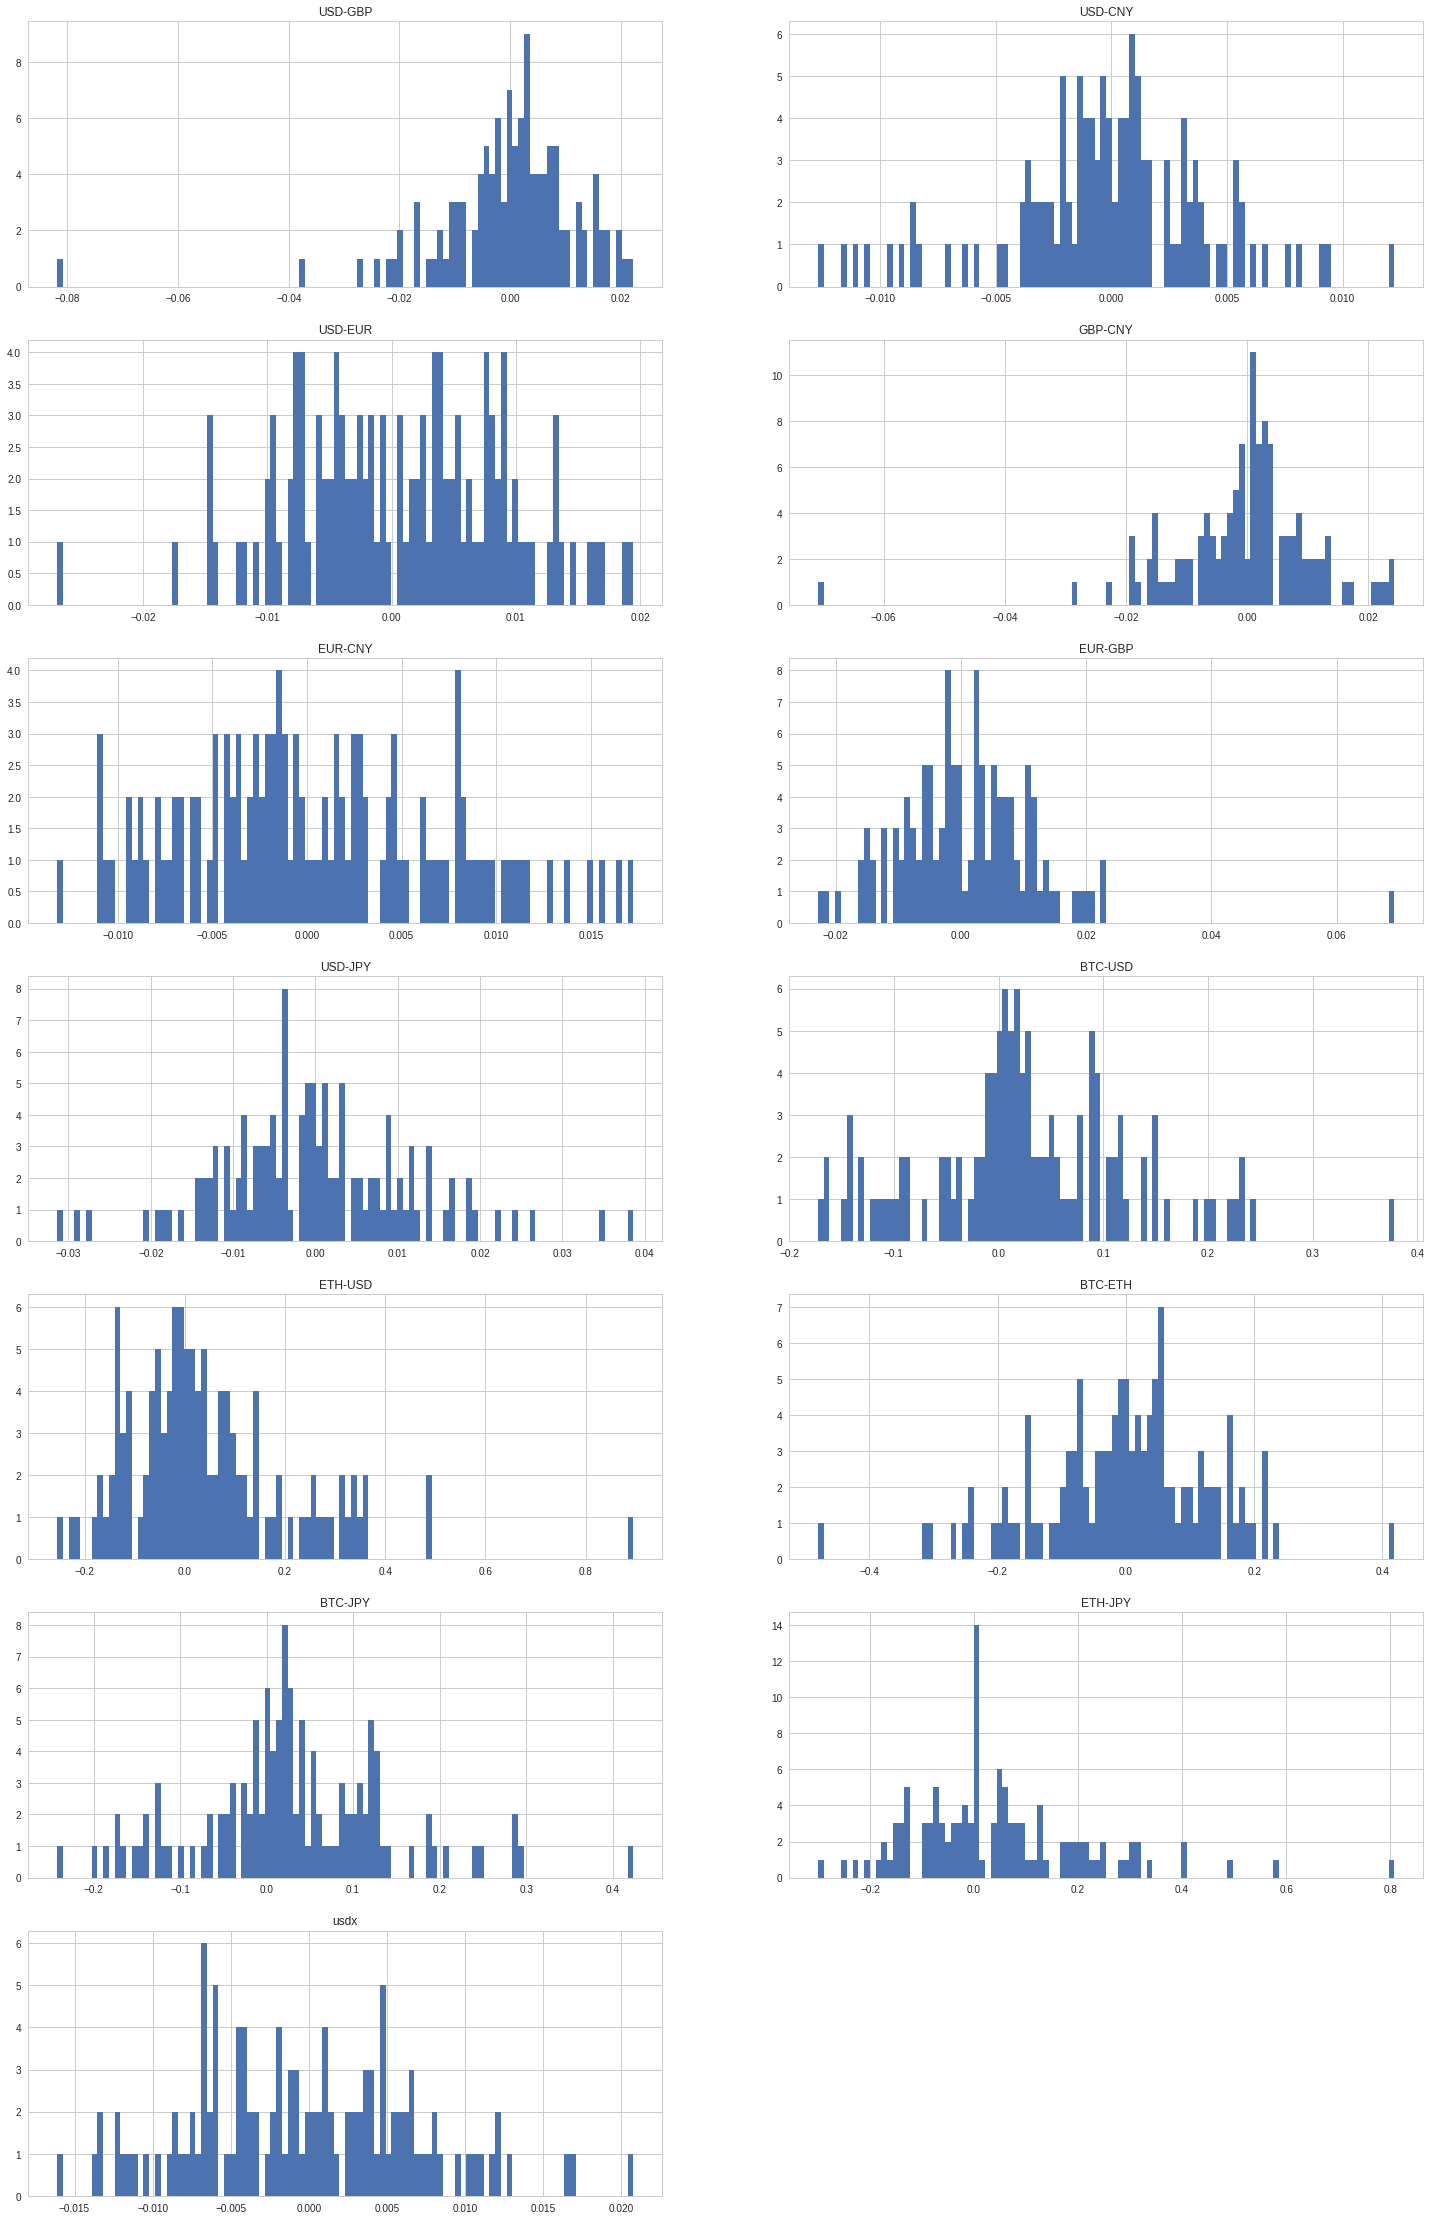

In [26]:
#plotting the histogram 
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
plt.hist(week_df['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(week_df['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(week_df['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(week_df['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(week_df['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(week_df['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(week_df['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(week_df['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(week_df['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(week_df['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(week_df['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(week_df['eth_jpy'],bins=100)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
plt.hist(week_df['usdx'],bins=100)
plt.title('usdx')
          

# % Weekly  Method 2

In [28]:
# For data point, the finding difference between current value and value a week before the current day 
week_period=pd.DataFrame()
week_period['usd_gbp']= usd_gbp.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['usd_cny']= usd_cny.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['usd_eur']= usd_eur.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['gbp_cny']= gbp_cny.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['eur_cny']= eur_cny.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['eur_gbp']= eur_gbp.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['usd_jpy']= usd_jpy.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['btc_usd']= btc_usd.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['eth_usd']= eth_usd.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['btc_eth']= btc_eth.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['btc_jpy']= btc_jpy.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['eth_jpy']= eth_jpy.pct_change(periods=5,fill_method='ffill').T.squeeze()
week_period['usdx']= dxy.pct_change(periods=5,fill_method='ffill').T.squeeze()

In [29]:
week_period=week_period.dropna()

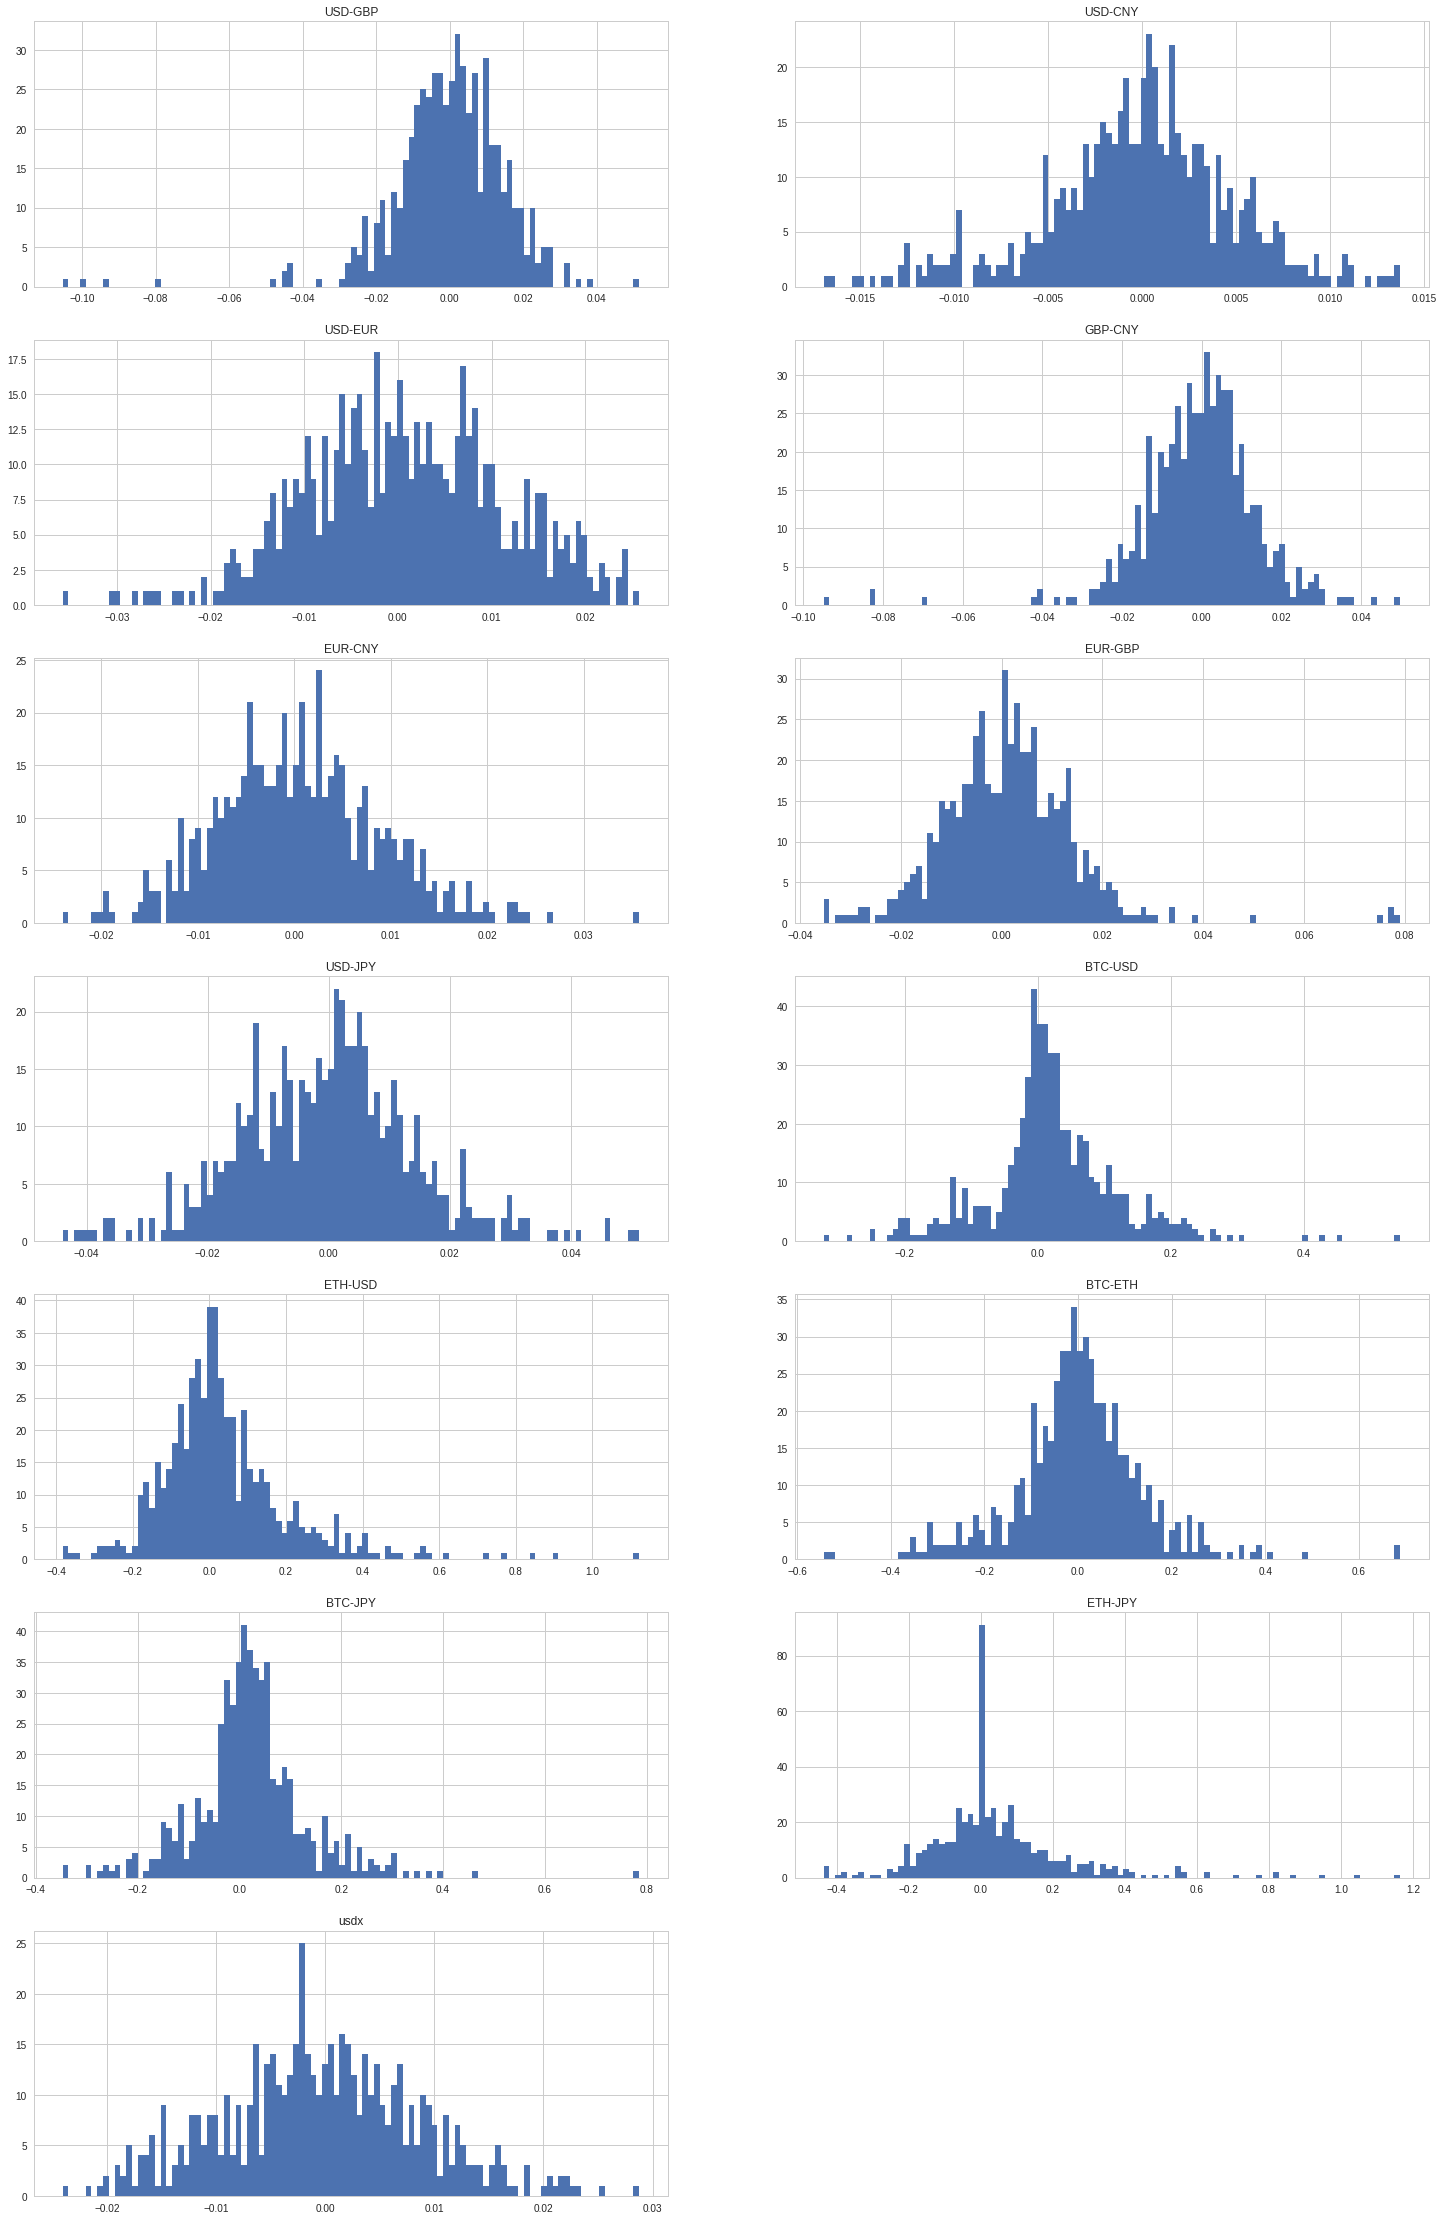

In [30]:
#Plotting the histogram 
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
plt.hist(week_period['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(week_period['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(week_period['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(week_period['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(week_period['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(week_period['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(week_period['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(week_period['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(week_period['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(week_period['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(week_period['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(week_period['eth_jpy'],bins=100)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
plt.hist(week_period['usdx'],bins=100)
plt.title('usdx')

# % Weekly with Rolling Mean - Method 3 

In [31]:
#Finding the difference between current value and mean value over past 5 days 

Weekly_mean=pd.DataFrame()
Weekly_mean['usd_gbp']=((usd_gbp/(usd_gbp.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['usd_cny']=((usd_cny/(usd_cny.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['usd_eur']=((usd_eur/(usd_eur.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['gbp_cny']=((gbp_cny/(gbp_cny.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['eur_cny']=((eur_cny/(eur_cny.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['eur_gbp']=((eur_gbp/(eur_gbp.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['usd_jpy']=((usd_jpy/(usd_jpy.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['btc_usd']=((btc_usd/(btc_usd.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['eth_usd']=((eth_usd/(eth_usd.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['btc_eth']=((btc_eth/(btc_eth.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['btc_jpy']=((btc_jpy/(btc_jpy.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['eth_jpy']=((eth_jpy/(eth_jpy.rolling(window = 5).mean().shift()))-1).T.squeeze()
Weekly_mean['usdx']=((dxy/(dxy.rolling(window = 5).mean().shift()))-1).T.squeeze()


In [32]:
Weekly_mean=Weekly_mean.dropna()

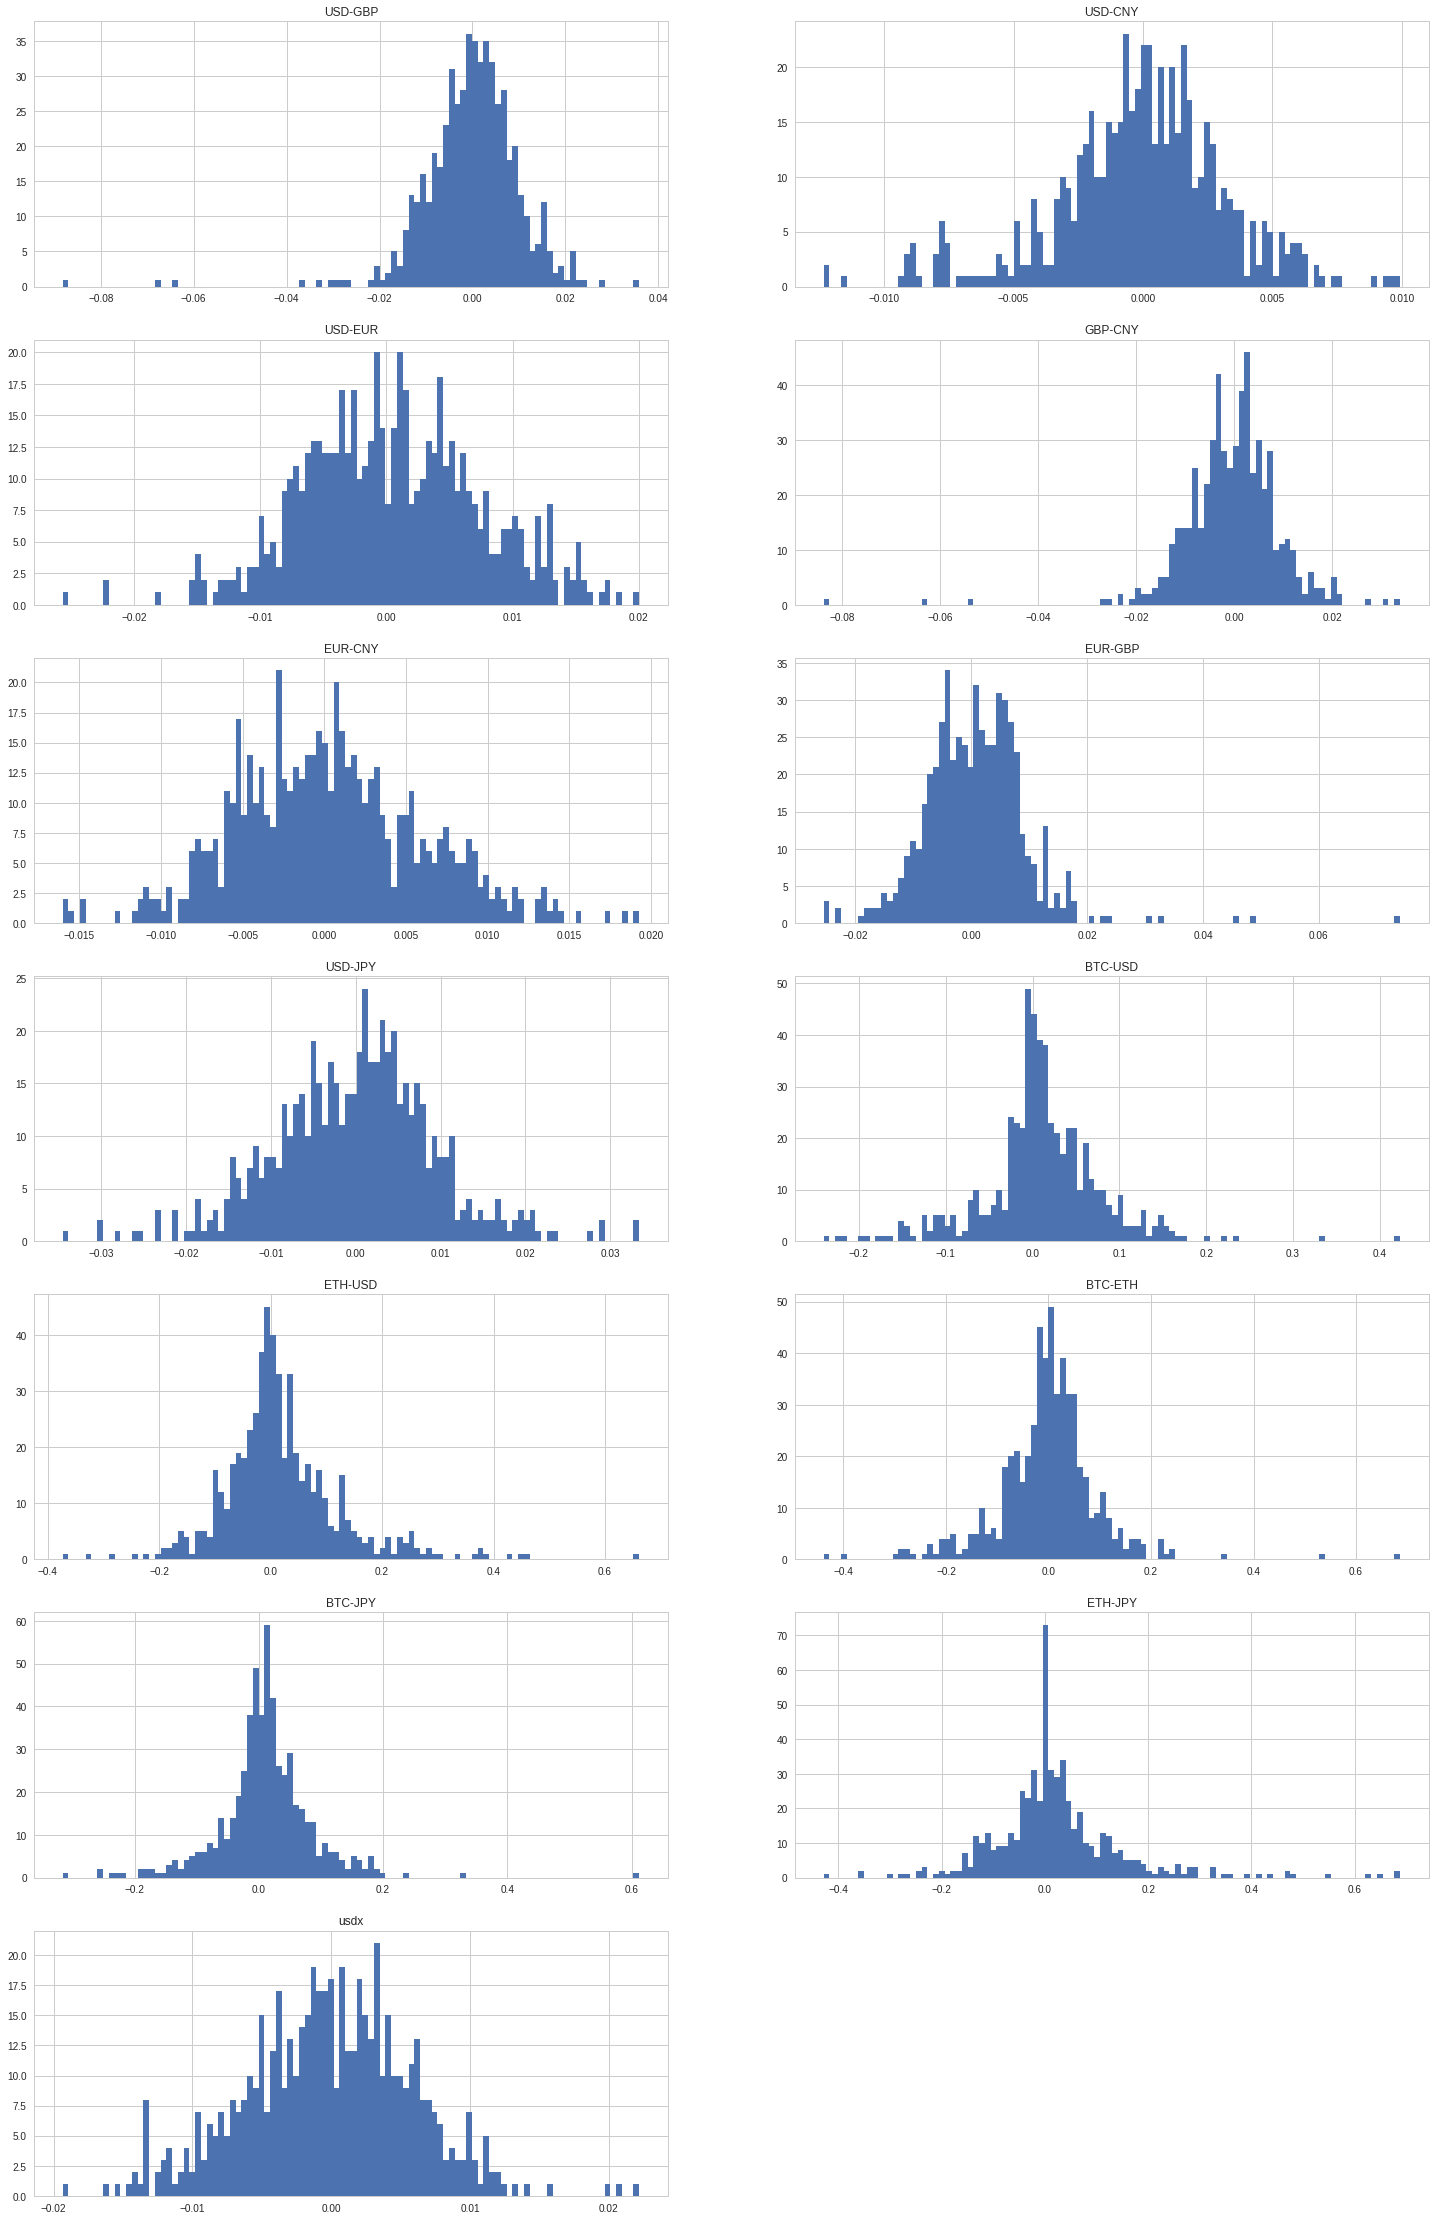

In [33]:
#plotting the histogram 
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
plt.hist(Weekly_mean['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(Weekly_mean['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(Weekly_mean['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(Weekly_mean['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(Weekly_mean['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(Weekly_mean['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(Weekly_mean['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(Weekly_mean['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(Weekly_mean['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(Weekly_mean['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(Weekly_mean['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(Weekly_mean['eth_jpy'],bins=100)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
plt.hist(Weekly_mean['usdx'],bins=100)
plt.title('usdx')

# Monthly % Change  - Method 1 

In [36]:
#Grouping the mean over month for each data point and calculating the difference between mean  
month_df=pd.DataFrame()
month_groupby = usd_gbp.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['usd_gbp']=month_diff

month_groupby = usd_cny.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['usd_cny']=month_diff

month_groupby = usd_eur.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['usd_eur']=month_diff

month_groupby = gbp_cny.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['gbp_cny']=month_diff

month_groupby = eur_cny.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['eur_cny']=month_diff

month_groupby = eur_gbp.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['eur_gbp']=month_diff

month_groupby = usd_jpy.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['usd_jpy']=month_diff

month_groupby = btc_usd.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['btc_usd']=month_diff

month_groupby = eth_usd.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['eth_usd']=month_diff

month_groupby = btc_eth.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['btc_eth']=month_diff

month_groupby = btc_jpy.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['btc_jpy']=month_diff

month_groupby = eth_jpy.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['eth_jpy']=month_diff


month_groupby = dxy.groupby(pd.TimeGrouper(freq='M'))
month_diff = (month_groupby['Value'].mean()).pct_change(fill_method='ffill')
month_df['usdx']=month_diff

In [37]:
month_df=month_df.dropna()

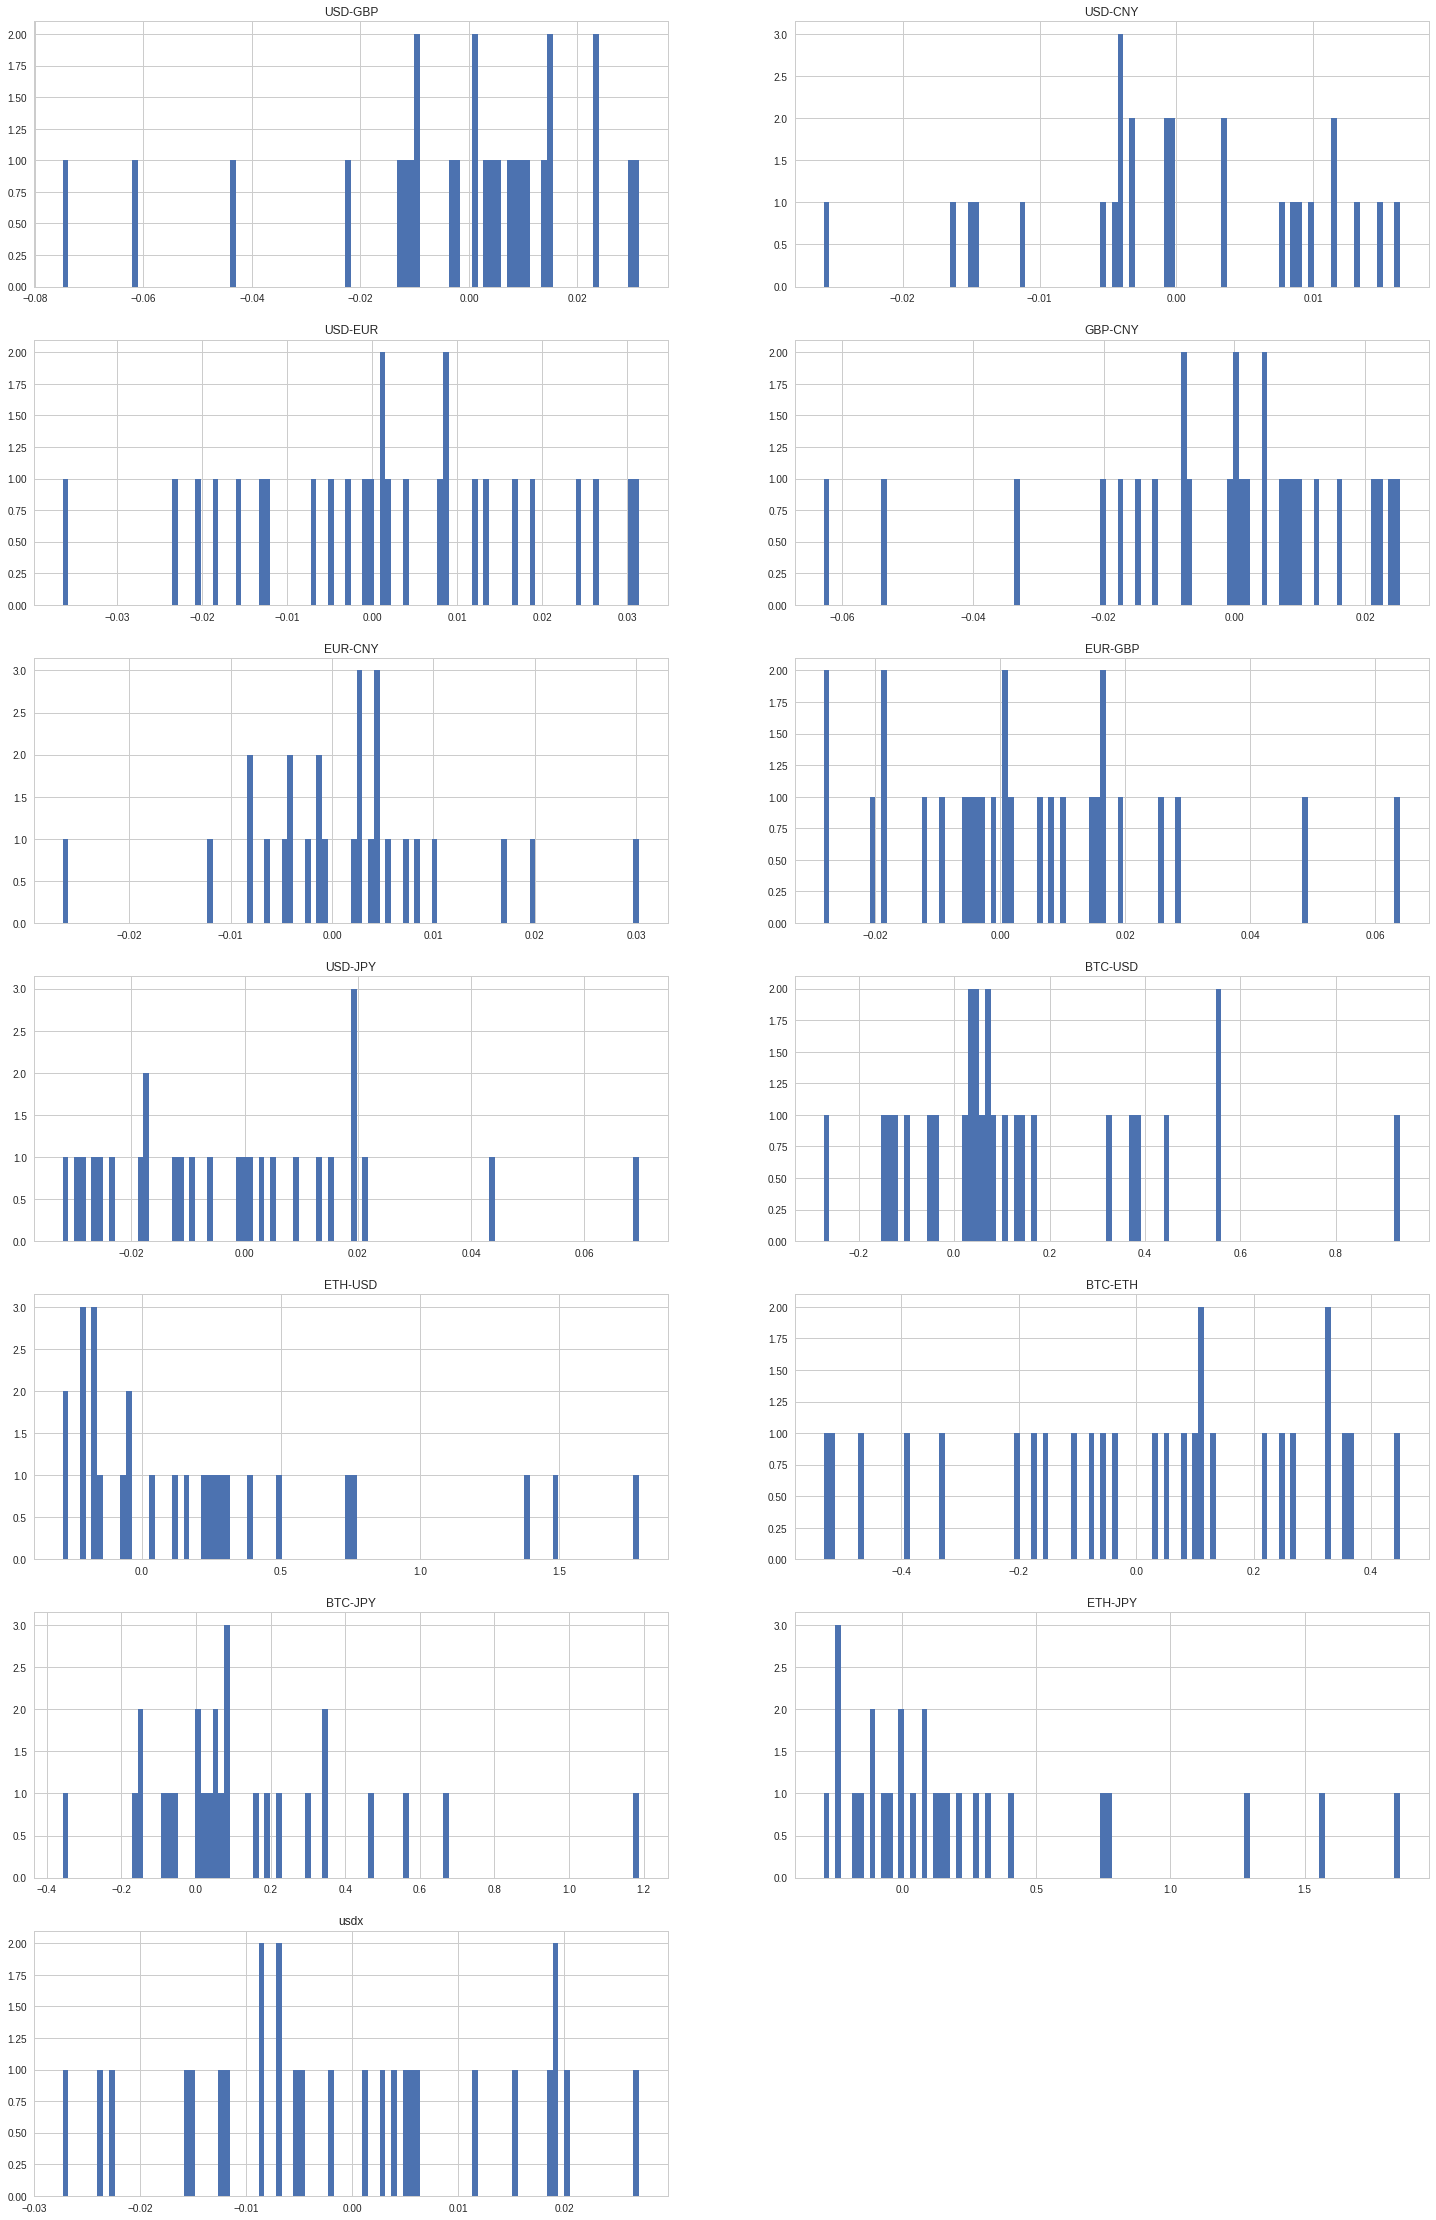

In [38]:
#Plotting the histogram 
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
plt.hist(month_df['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(month_df['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(month_df['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(month_df['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(month_df['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(month_df['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(month_df['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(month_df['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(month_df['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(month_df['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(month_df['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(month_df['eth_jpy'],bins=100)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
plt.hist(month_df['usdx'],bins=100)
plt.title('usdx')
          

# % Monthly Change - Method 2 

In [39]:
#Finding the difference between current value and value before 1 month 
month_period=pd.DataFrame()
month_period['usd_gbp']= usd_gbp.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['usd_cny']= usd_cny.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['usd_eur']= usd_eur.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['gbp_cny']= gbp_cny.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['eur_cny']= eur_cny.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['eur_gbp']= eur_gbp.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['usd_jpy']= usd_jpy.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['btc_usd']= btc_usd.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['eth_usd']= eth_usd.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['btc_eth']= btc_eth.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['btc_jpy']= btc_jpy.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['eth_jpy']= eth_jpy.pct_change(periods=21,fill_method='ffill').T.squeeze()
month_period['usdx']= dxy.pct_change(periods=21,fill_method='ffill').T.squeeze()

In [40]:
month_period=month_period.dropna()

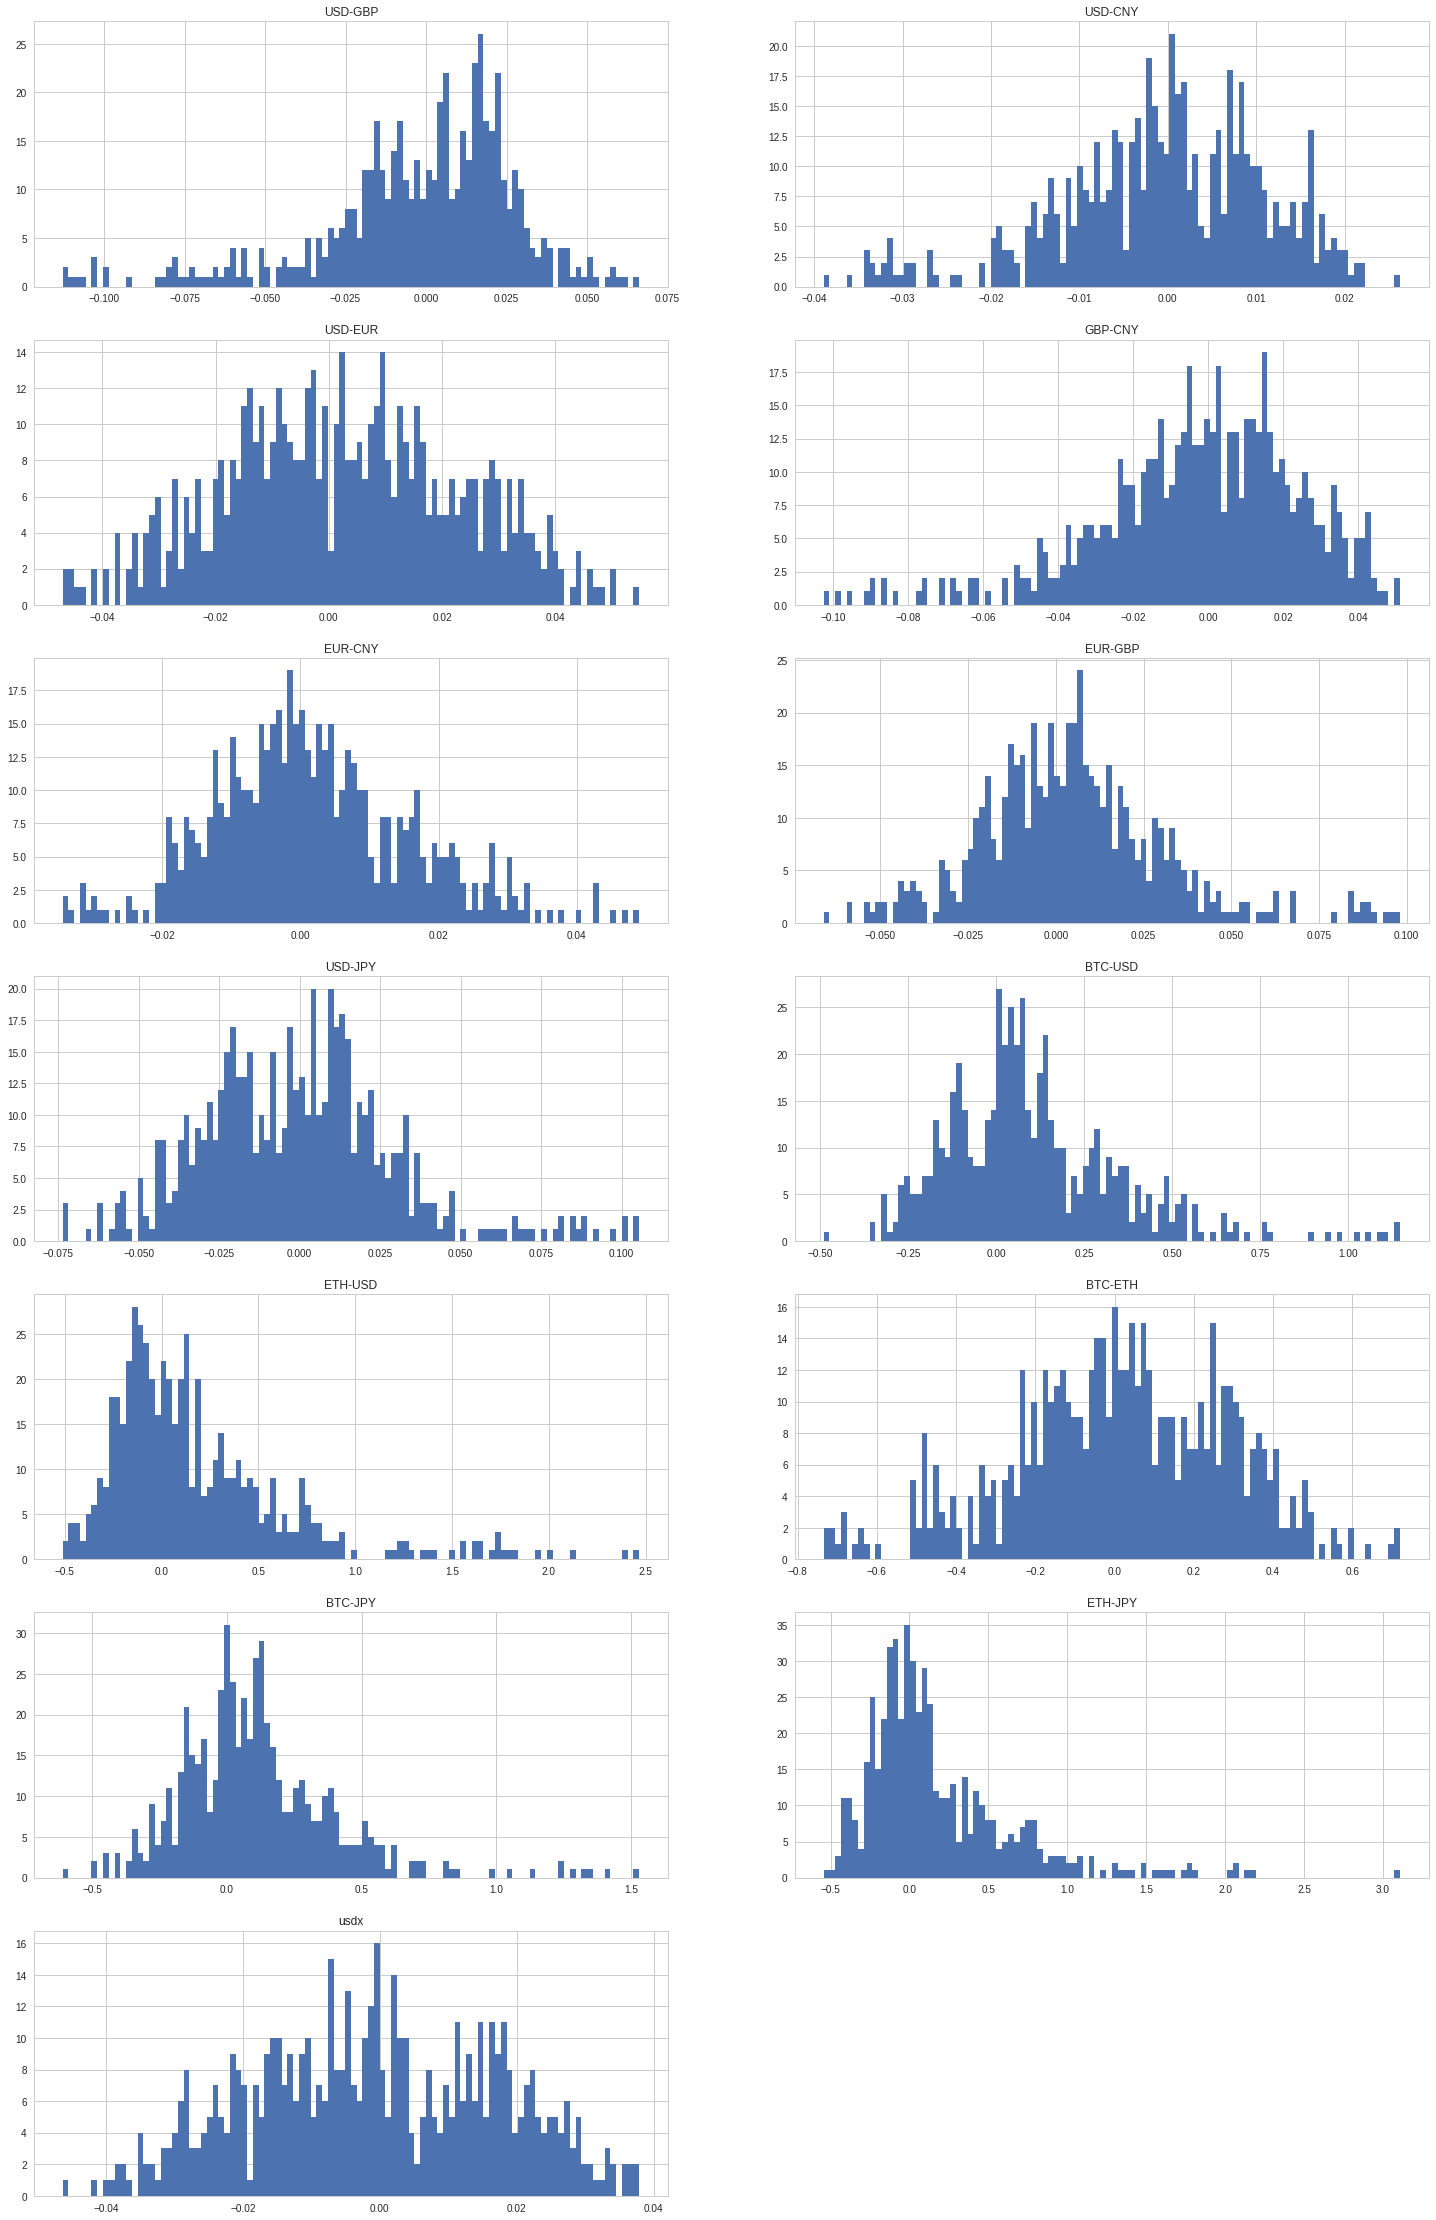

In [41]:
#Histogram 
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
plt.hist(month_period['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(month_period['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(month_period['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(month_period['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(month_period['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(month_period['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(month_period['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(month_period['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(month_period['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(month_period['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(month_period['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(month_period['eth_jpy'],bins=100)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
plt.hist(month_period['usdx'],bins=100)
plt.title('usdx')

# % Monthly Change with Rolling Mean - Method 3 

In [44]:
#Finding the difference between current value and mean value over past 21 days  
Monthly_mean=pd.DataFrame()
Monthly_mean['usd_gbp']=((usd_gbp/(usd_gbp.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['usd_cny']=((usd_cny/(usd_cny.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['usd_eur']=((usd_eur/(usd_eur.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['gbp_cny']=((gbp_cny/(gbp_cny.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['eur_cny']=((eur_cny/(eur_cny.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['eur_gbp']=((eur_gbp/(eur_gbp.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['usd_jpy']=((usd_jpy/(usd_jpy.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['btc_usd']=((btc_usd/(btc_usd.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['eth_usd']=((eth_usd/(eth_usd.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['btc_eth']=((btc_eth/(btc_eth.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['btc_jpy']=((btc_jpy/(btc_jpy.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['eth_jpy']=((eth_jpy/(eth_jpy.rolling(window = 21).mean().shift()))-1).T.squeeze()
Monthly_mean['usdx']=((dxy/(dxy.rolling(window = 21).mean().shift()))-1).T.squeeze()

In [45]:
Monthly_mean=Monthly_mean.dropna()

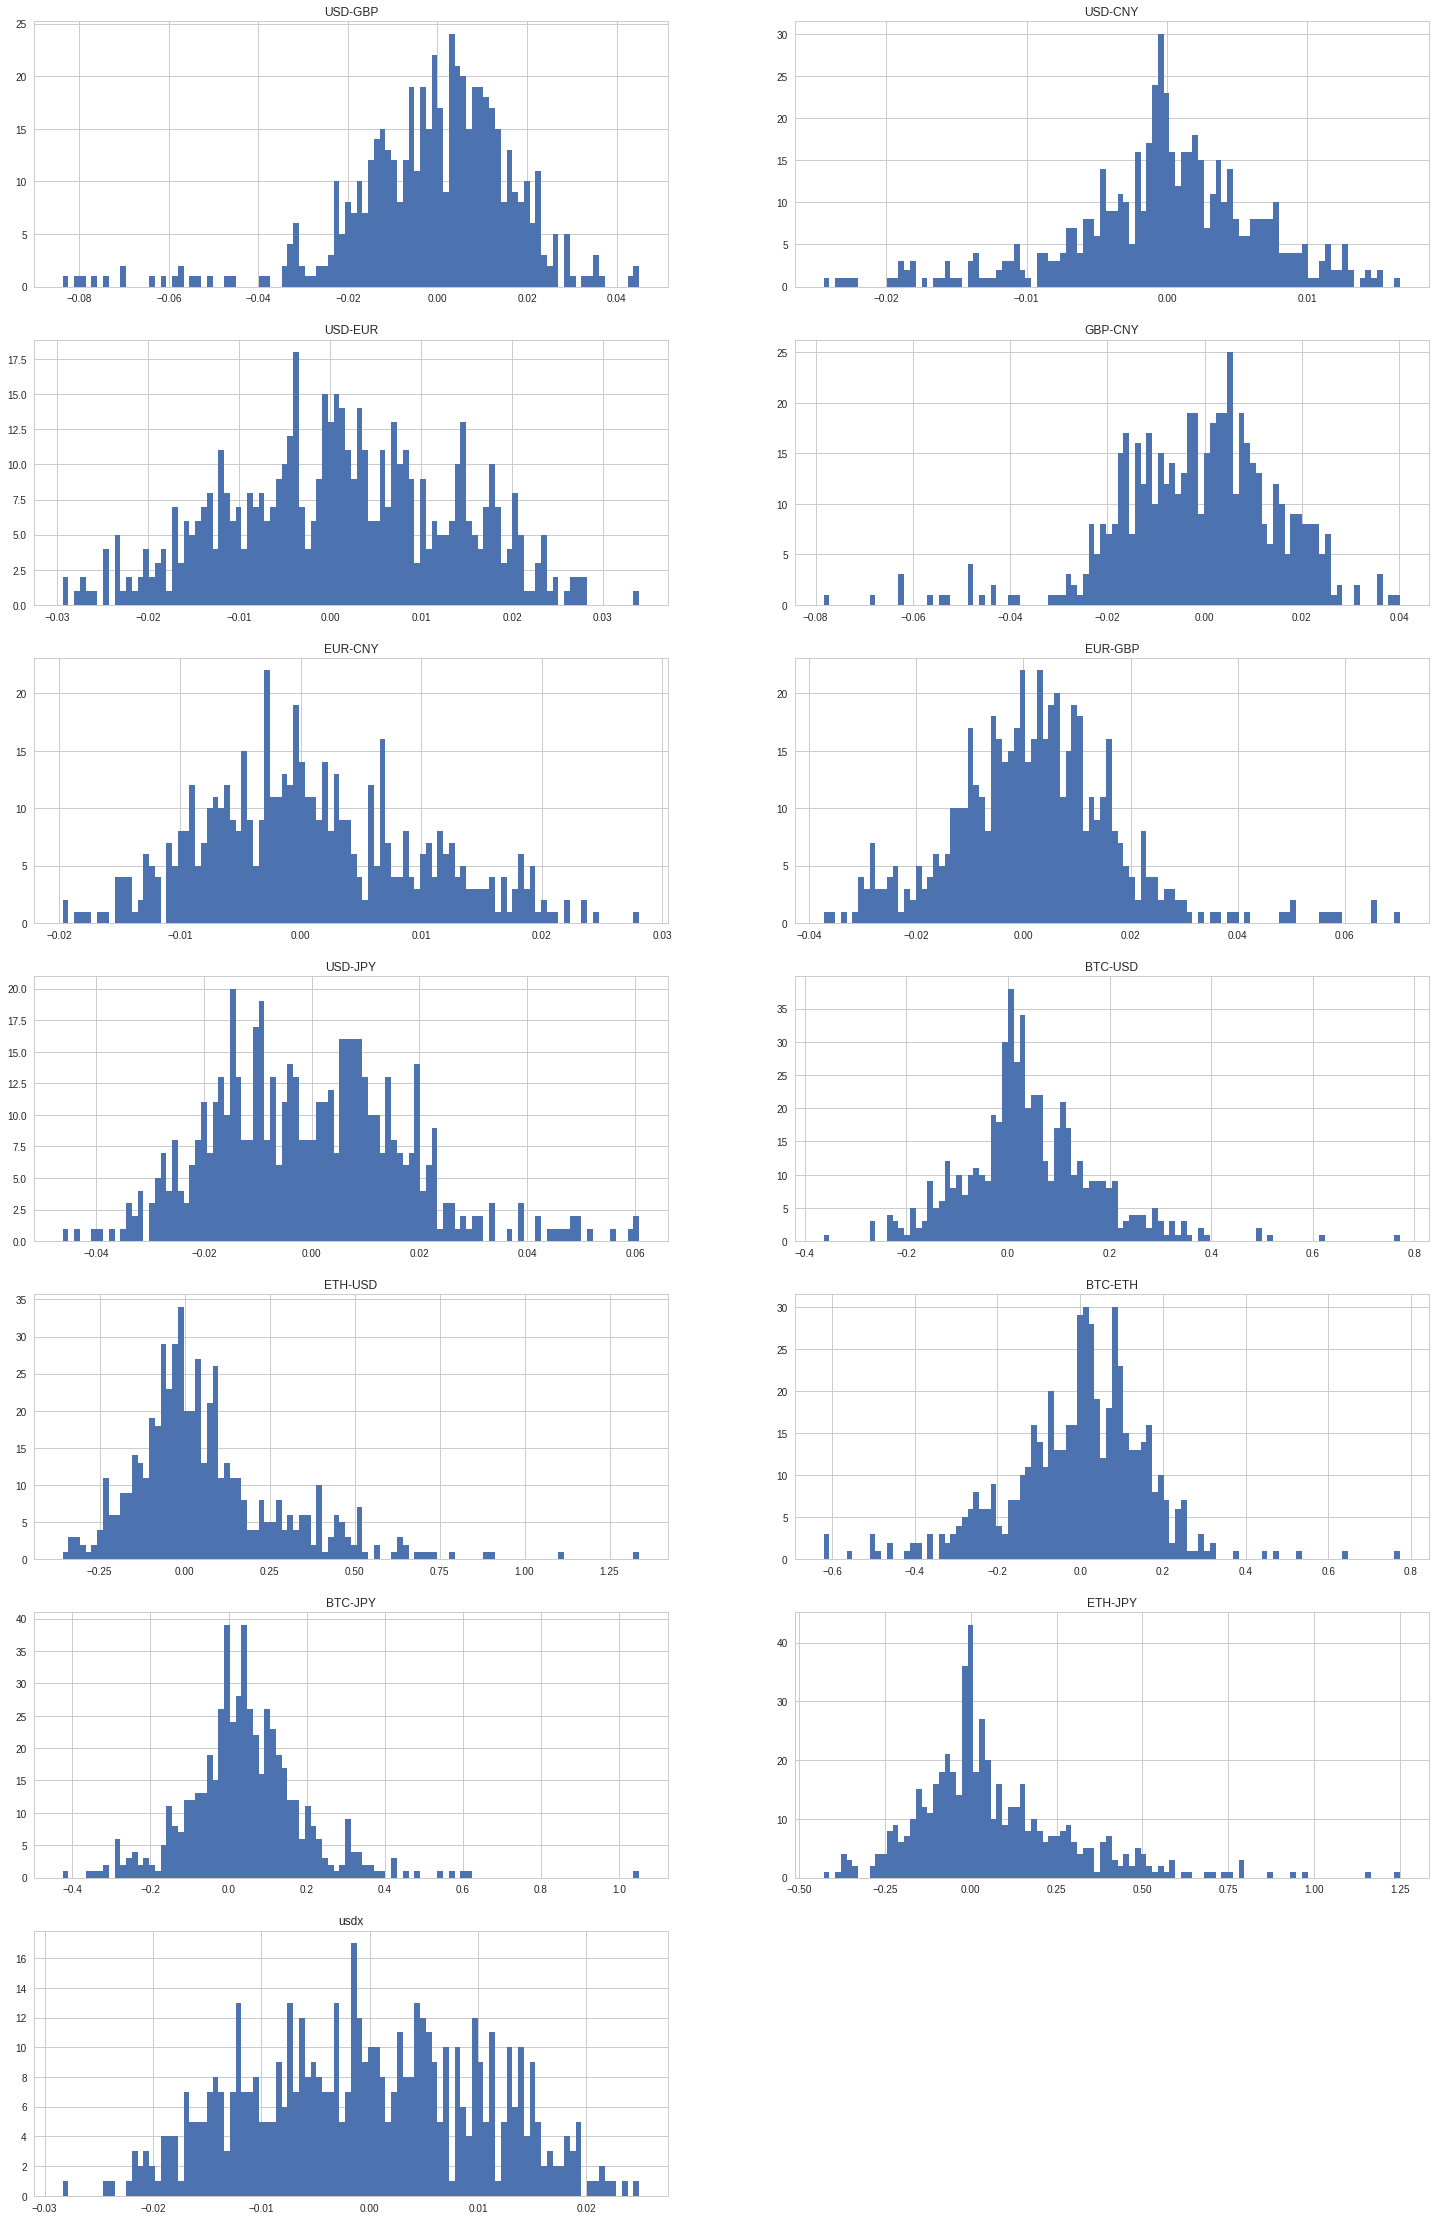

In [46]:
#plotting the histogram 
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
plt.hist(Monthly_mean['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(Monthly_mean['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(Monthly_mean['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(Monthly_mean['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(Monthly_mean['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(Monthly_mean['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(Monthly_mean['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(Monthly_mean['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(Monthly_mean['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(Monthly_mean['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(Monthly_mean['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(Monthly_mean['eth_jpy'],bins=100)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
plt.hist(Monthly_mean['usdx'],bins=100)
plt.title('usdx')

# Yearly % Change - Method 1 

In [47]:
#Grouping the yearly data points together and finding the difference between the yearly mean value
year_df=pd.DataFrame()
year_groupby = usd_gbp.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['usd_gbp']=year_diff

year_groupby = usd_cny.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['usd_cny']=year_diff

year_groupby = usd_eur.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['usd_eur']=year_diff

year_groupby = gbp_cny.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['gbp_cny']=year_diff

year_groupby = eur_cny.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['eur_cny']=year_diff

year_groupby = eur_gbp.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['eur_gbp']=year_diff

year_groupby = usd_jpy.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['usd_jpy']=year_diff

year_groupby = btc_usd.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['btc_usd']=year_diff

year_groupby = eth_usd.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['eth_usd']=year_diff

year_groupby = btc_eth.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['btc_eth']=year_diff

year_groupby = btc_jpy.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['btc_jpy']=year_diff

year_groupby = eth_jpy.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['eth_jpy']=year_diff


year_groupby = dxy.groupby(pd.TimeGrouper(freq='A'))
year_diff = (year_groupby['Value'].mean()).pct_change(fill_method='ffill')
year_df['usdx']=year_diff

In [48]:
year_df=year_df.dropna()

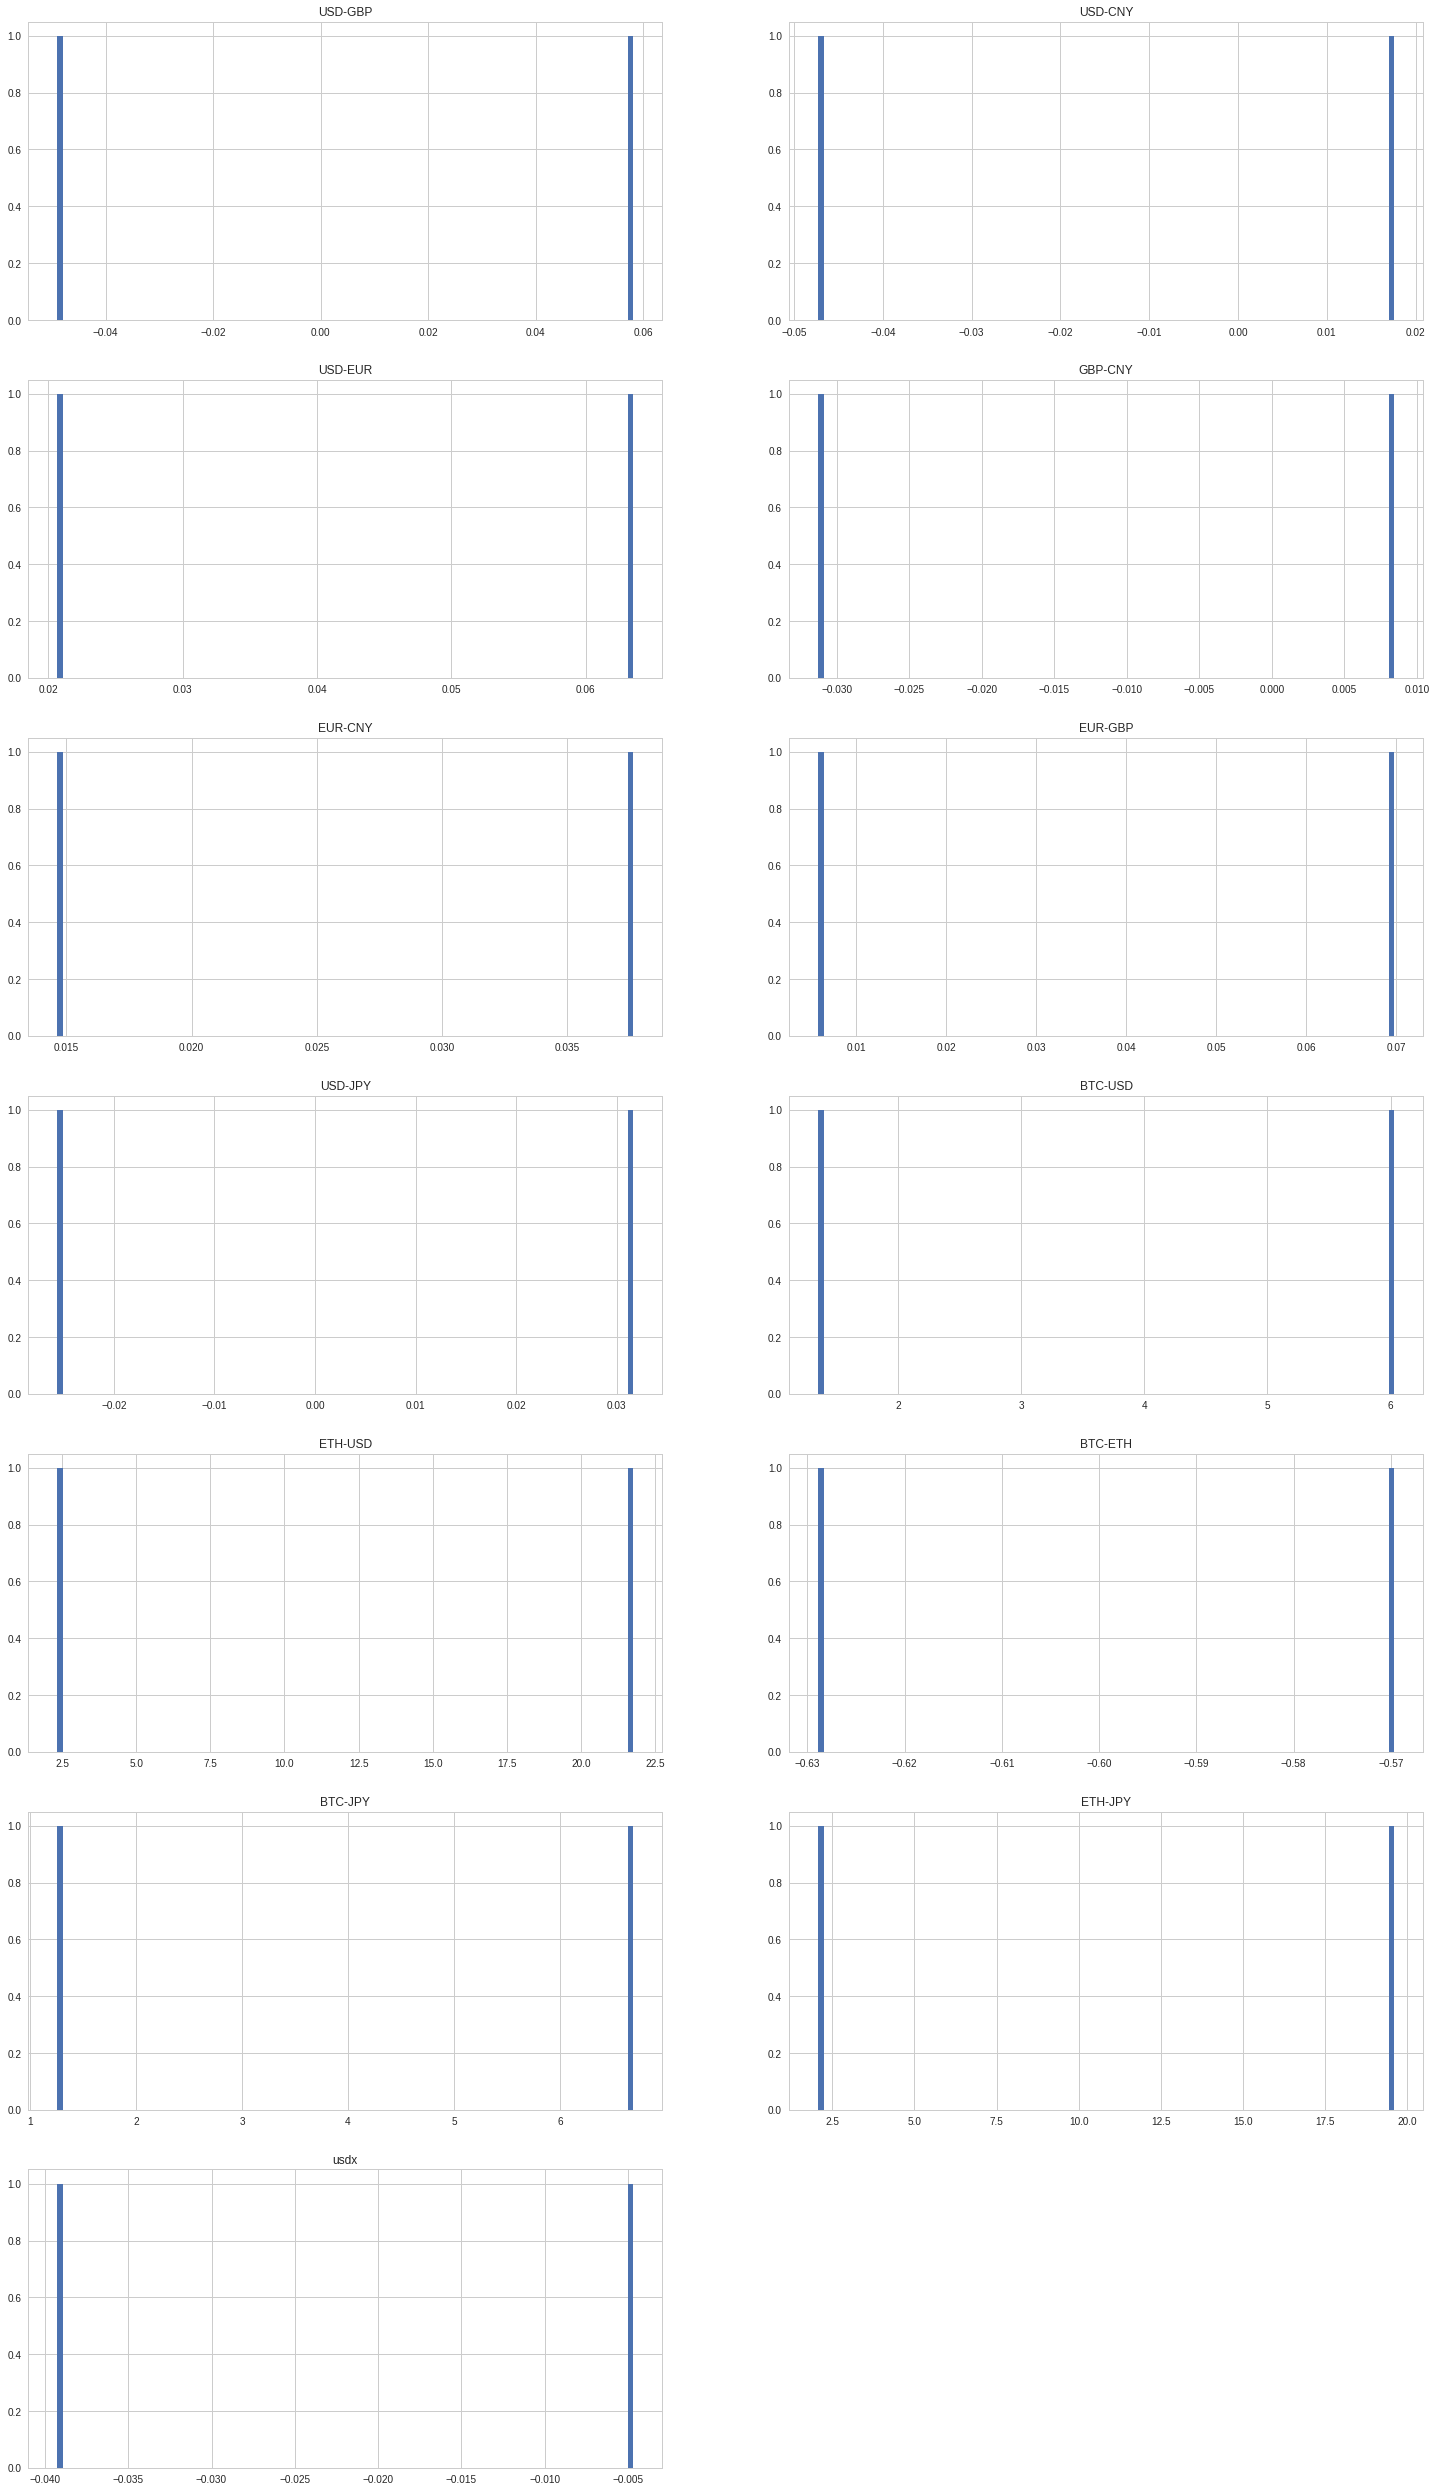

In [49]:
#plotting the histogram values 
plt.figure(figsize=(25,45))
plt.subplot(7,2,1)
plt.hist(year_df['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(year_df['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(year_df['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(year_df['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(year_df['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(year_df['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(year_df['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(year_df['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(year_df['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(year_df['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(year_df['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(year_df['eth_jpy'],bins=100)
plt.title('ETH-JPY')
          
    
plt.subplot(7,2,13)
plt.hist(year_df['usdx'],bins=100)
plt.title('usdx')

# % Yearly Change - Method 2 

In [50]:
# For data point, the finding difference between current value and value a year before the current day 
year_period=pd.DataFrame()
year_period['usd_gbp']= usd_gbp.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['usd_cny']= usd_cny.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['usd_eur']= usd_eur.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['gbp_cny']= gbp_cny.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['eur_cny']= eur_cny.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['eur_gbp']= eur_gbp.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['usd_jpy']= usd_jpy.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['btc_usd']= btc_usd.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['eth_usd']= eth_usd.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['btc_eth']= btc_eth.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['btc_jpy']= btc_jpy.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['eth_jpy']= eth_jpy.pct_change(periods=252,fill_method='ffill').T.squeeze()
year_period['usdx']= dxy.pct_change(periods=252,fill_method='ffill').T.squeeze()

In [51]:
year_period=year_period.dropna()

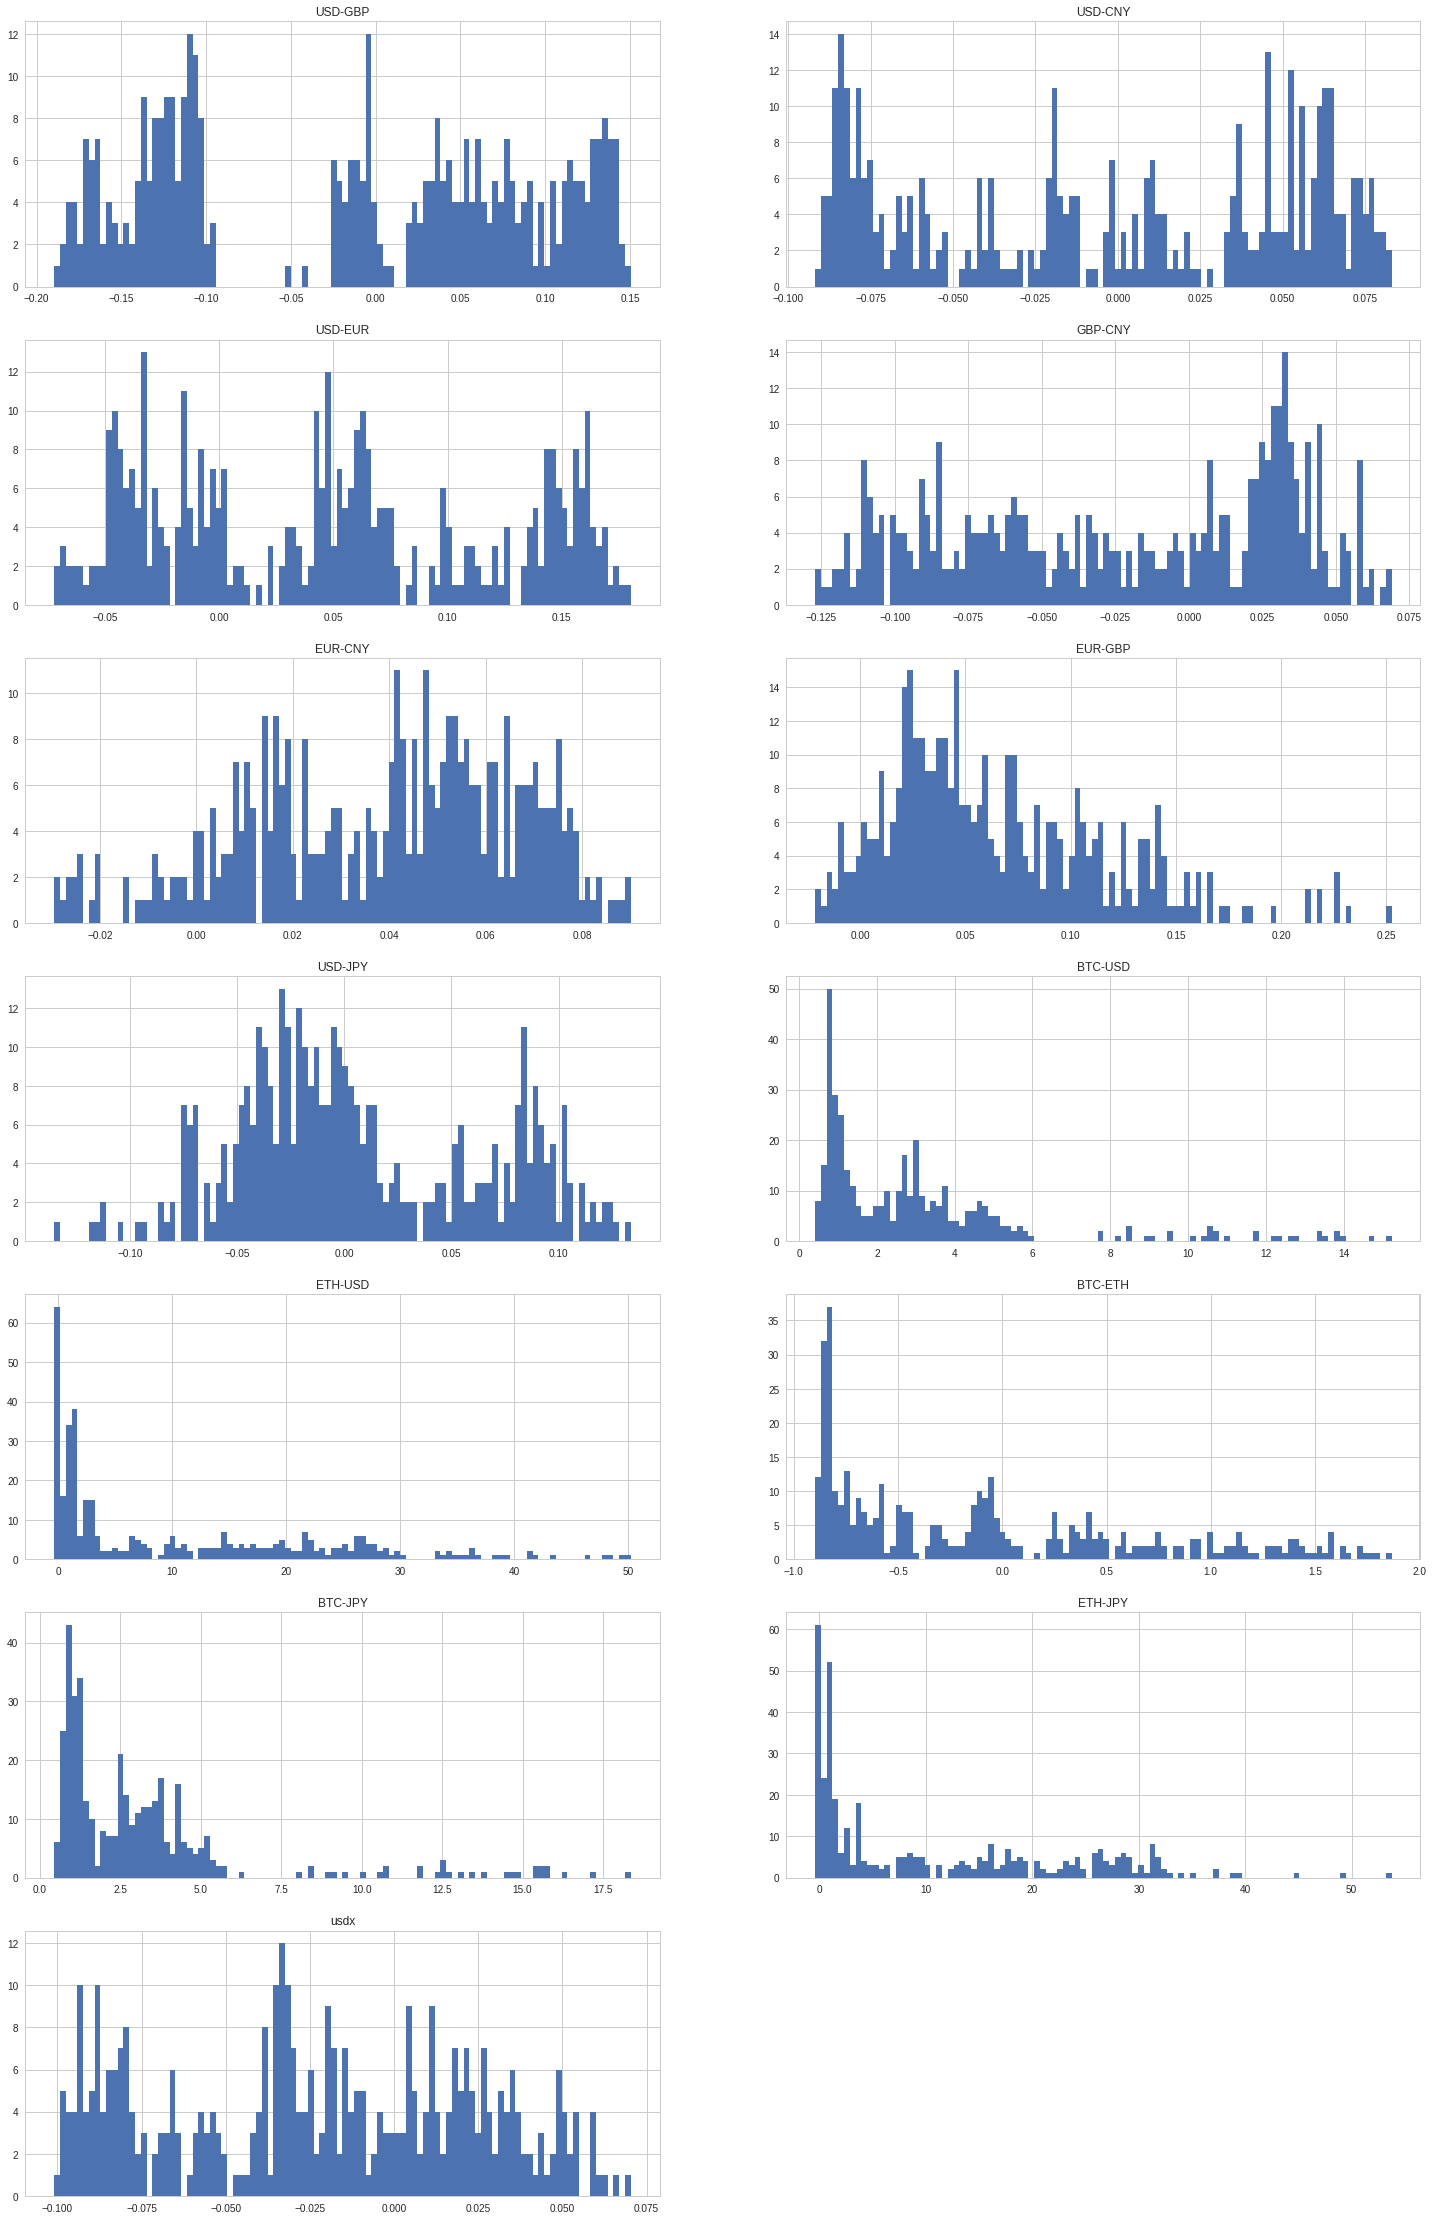

In [52]:
#Plotting the histogram 
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
plt.hist(year_period['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(year_period['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(year_period['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(year_period['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(year_period['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(year_period['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(year_period['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(year_period['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(year_period['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(year_period['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(year_period['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(year_period['eth_jpy'],bins=100)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
plt.hist(year_period['usdx'],bins=100)
plt.title('usdx')

# % Yearly Change with Rolling Mean - Method 3 

In [53]:
#Finding the difference between current value and mean value over past 252 days  
Yearly_mean=pd.DataFrame()
Yearly_mean['usd_gbp']=((usd_gbp/(usd_gbp.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['usd_cny']=((usd_cny/(usd_cny.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['usd_eur']=((usd_eur/(usd_eur.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['gbp_cny']=((gbp_cny/(gbp_cny.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['eur_cny']=((eur_cny/(eur_cny.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['eur_gbp']=((eur_gbp/(eur_gbp.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['usd_jpy']=((usd_jpy/(usd_jpy.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['btc_usd']=((btc_usd/(btc_usd.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['eth_usd']=((eth_usd/(eth_usd.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['btc_eth']=((btc_eth/(btc_eth.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['btc_jpy']=((btc_jpy/(btc_jpy.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['eth_jpy']=((eth_jpy/(eth_jpy.rolling(window = 252).mean().shift()))-1).T.squeeze()
Yearly_mean['usdx']=((dxy/(dxy.rolling(window = 252).mean().shift()))-1).T.squeeze()

In [54]:
Yearly_mean=Yearly_mean.dropna()

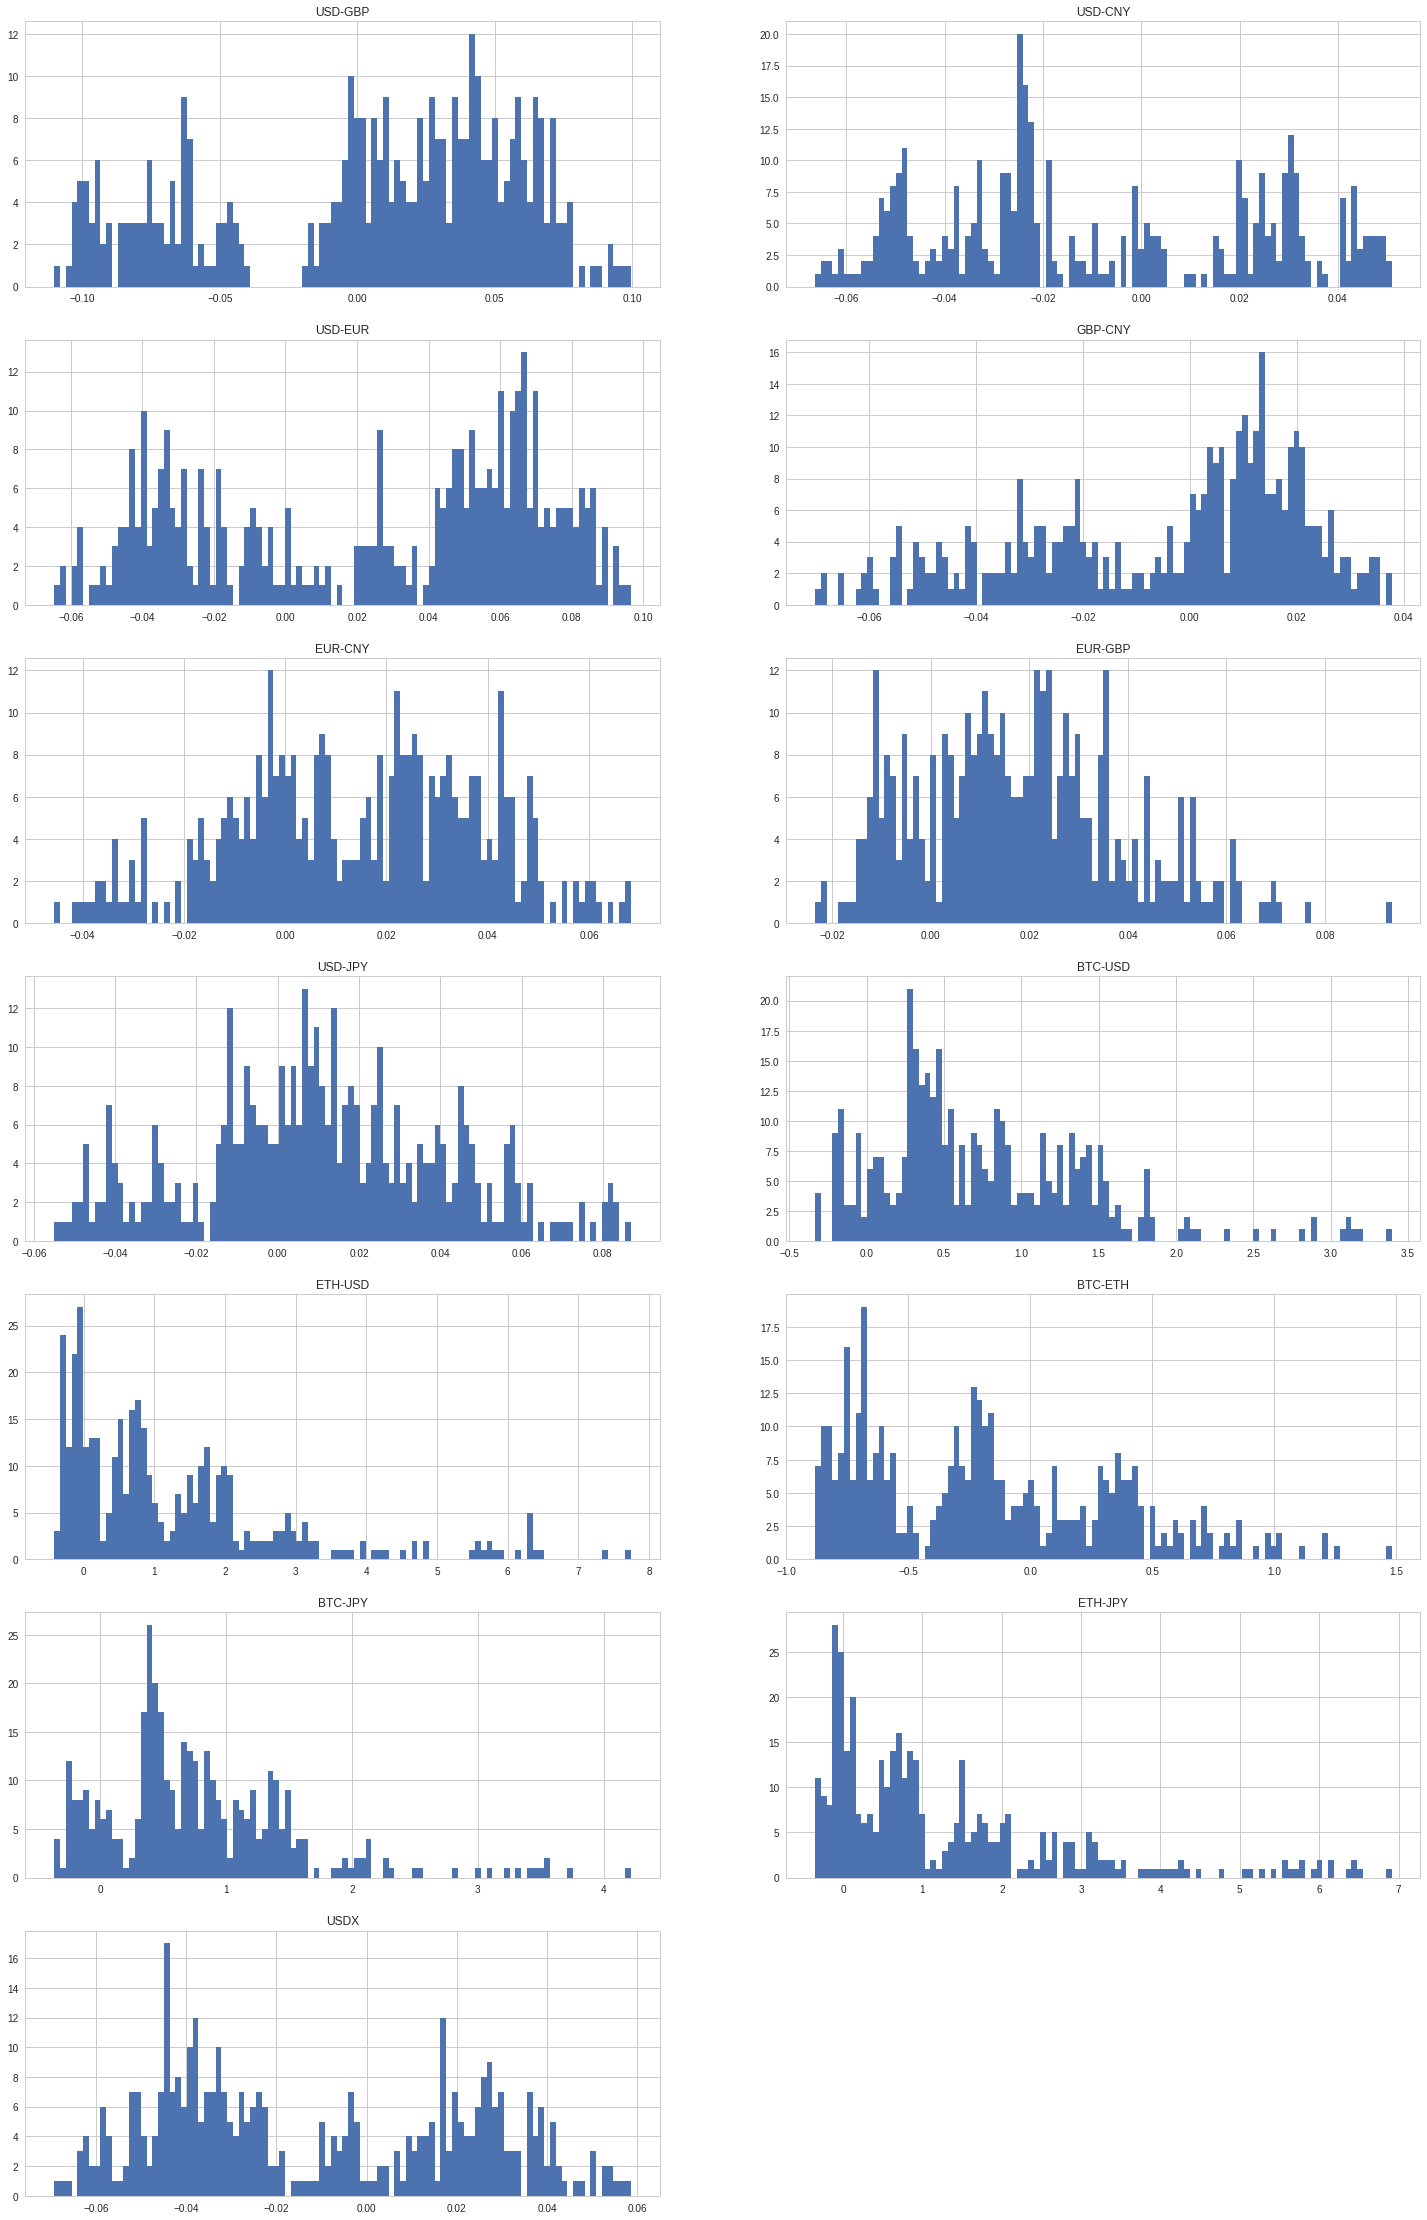

In [56]:
#plotting the histogram 
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
plt.hist(Yearly_mean['usd_gbp'],bins=100)
plt.title('USD-GBP')

plt.subplot(7,2,2)
plt.hist(Yearly_mean['usd_cny'],bins=100)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
plt.hist(Yearly_mean['usd_eur'],bins=100)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
plt.hist(Yearly_mean['gbp_cny'],bins=100)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
plt.hist(Yearly_mean['eur_cny'],bins=100)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
plt.hist(Yearly_mean['eur_gbp'],bins=100)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
plt.hist(Yearly_mean['usd_jpy'],bins=100)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
plt.hist(Yearly_mean['btc_usd'],bins=100)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
plt.hist(Yearly_mean['eth_usd'],bins=100)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
plt.hist(Yearly_mean['btc_eth'],bins=100)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
plt.hist(Yearly_mean['btc_jpy'],bins=100)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
plt.hist(Yearly_mean['eth_jpy'],bins=100)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
plt.hist(Yearly_mean['usdx'],bins=100)
plt.title('USDX')

# Measure of Volatility

Typical instruments to measure volatility of an asset include trading bands and Beta. Trading bands show the price movement of a stock relative to some set of statistical measures, relating moving average to its standard deviation. Another measure of volatility is beta. Beta approximates the overall volatility of a security's/currency exchange returns against the returns of a relevant benchmark. In the stock market, this index is typically the S&P 500. Beta is a good indicator of relative volatility against an index, if it is correlated with that index. Both trading bands and beta are discussed in greater detail in later sections.

Correlation: Measures the degree to which two securities move in relation to each other. Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.  A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one security moves, either up or down, the other security moves in lockstep, in the same direction. A perfect negative correlation means that two assets move in opposite directions, while a zero correlation implies no relationship at all

In [92]:
corr_df=returns.corr()
corr_df

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx
usd_gbp,1.000000,-0.044413,0.640442,0.907576,0.407723,-0.282400,-0.304931,0.011976,0.018194,-0.016181,0.002262,-0.011809,-0.714746
usd_cny,-0.044413,1.000000,-0.137615,0.012972,-0.056280,-0.012656,0.027004,-0.005057,0.094296,-0.053545,0.033260,0.030346,0.042609
usd_eur,0.640442,-0.137615,1.000000,0.550957,0.641980,0.315796,-0.282831,-0.003444,0.045300,-0.006011,0.002532,0.013836,-0.893195
gbp_cny,0.907576,0.012972,0.550957,1.000000,0.440039,-0.376313,-0.055579,0.010534,0.057599,-0.026430,0.010877,0.007860,-0.611674
eur_cny,0.407723,-0.056280,0.641980,0.440039,1.000000,0.417389,-0.109680,0.014070,0.068018,0.034596,-0.023369,0.054919,-0.571071
eur_gbp,-0.282400,-0.012656,0.315796,-0.376313,0.417389,1.000000,-0.113702,-0.000561,0.005333,0.043652,-0.014312,-0.014205,-0.181263
usd_jpy,-0.304931,0.027004,-0.282831,-0.055579,-0.109680,-0.113702,1.000000,0.004287,-0.048898,-0.008510,0.011253,0.033893,0.637235
btc_usd,0.011976,-0.005057,-0.003444,0.010534,0.014070,-0.000561,0.004287,1.000000,0.326822,0.110961,0.156351,0.071280,0.003062
eth_usd,0.018194,0.094296,0.045300,0.057599,0.068018,0.005333,-0.048898,0.326822,1.000000,-0.659767,0.281134,0.220057,-0.036273
btc_eth,-0.016181,-0.053545,-0.006011,-0.026430,0.034596,0.043652,-0.008510,0.110961,-0.659767,1.000000,0.122901,-0.181144,0.001543


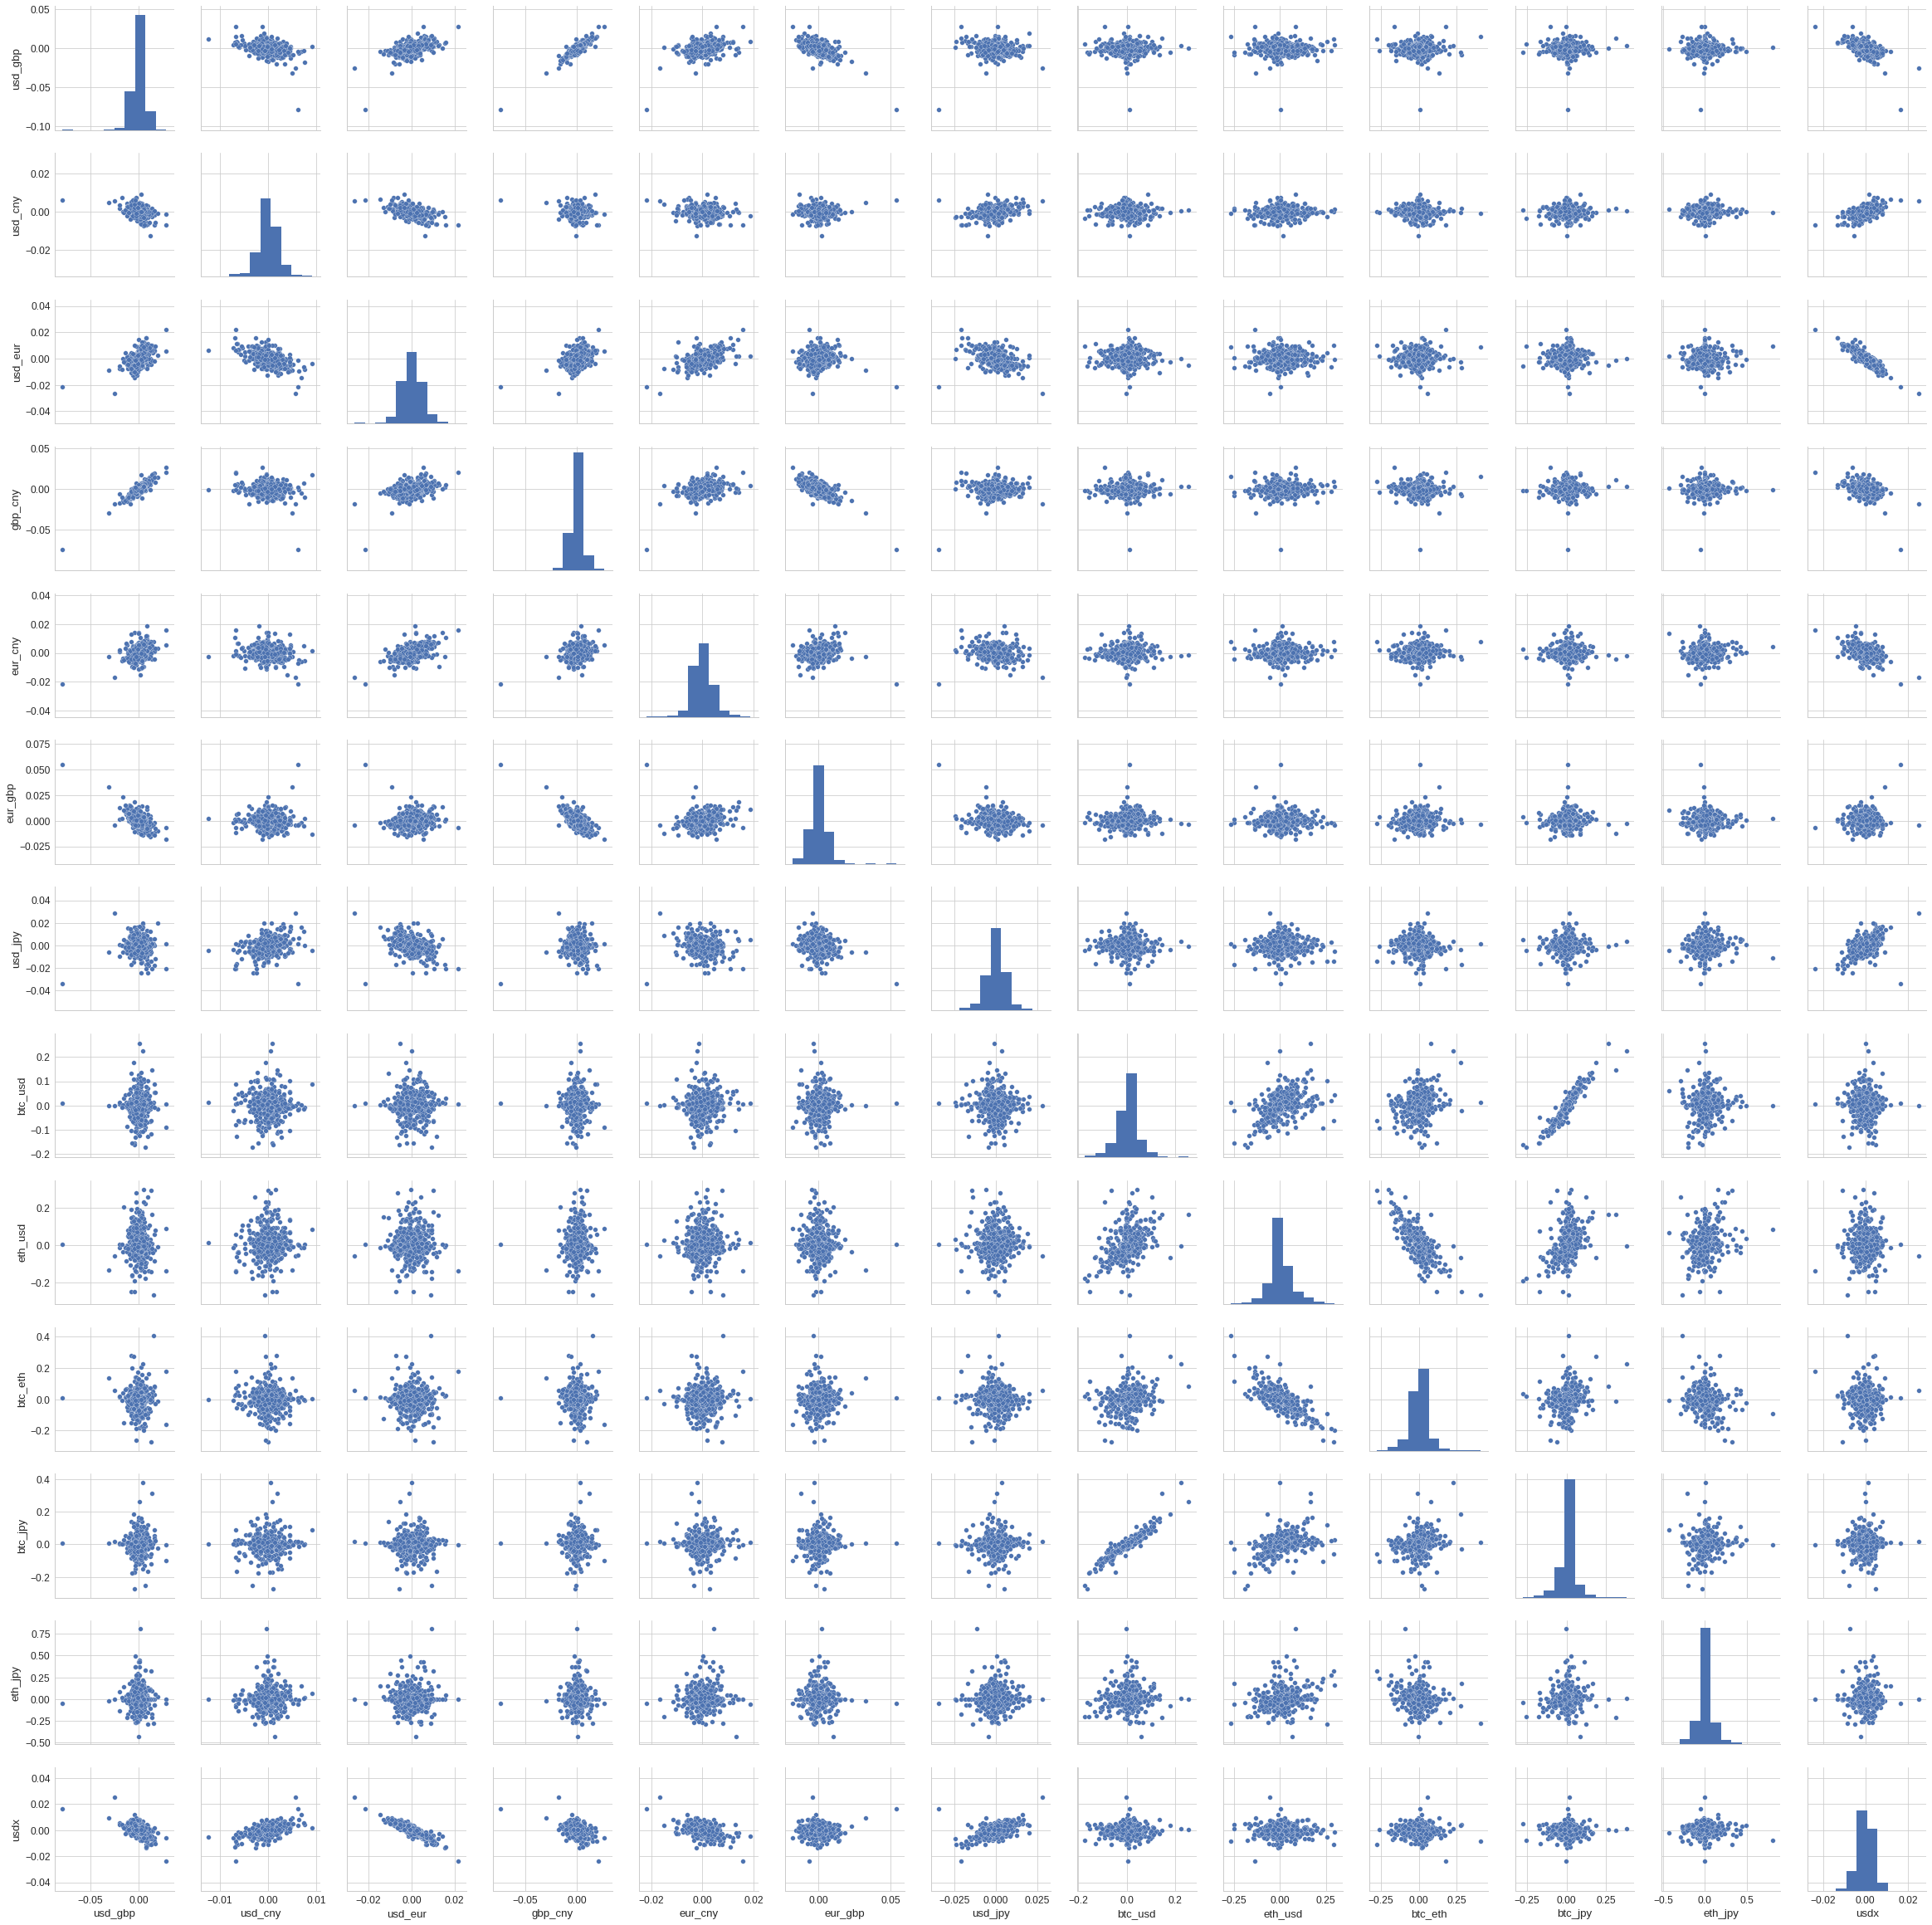

In [93]:
#plotting the correlation between each pair using seaborn pair plot
sns.pairplot(returns[1:].dropna())

In [94]:
tickers=['usd_gbp','usd_cny','usd_eur','gbp_cny','eur_cny','eur_gbp','usd_jpy','btc_usd','eth_usd','btc_eth','btc_jpy','eth_jpy','usdx']

In [95]:
#stats.describe(returns.dropna())

In [96]:
#stats.kurtosistest(returns.dropna())

# Statistical Parameters - 
Minmax: Minimum and Maximum value of percent returns of currency pair

Mean: Arithmetic mean of percent return of currency pair
Standard deviation: Used to quantify the amount of variation or dispersion of a set of data values.

Variance: It measures how far a set of numbers are spread out from their average value 

Skewness: It is the degree of distortion from the symmetrical bell curve, or normal distribution, in a set of data. Skewness can be negative, positive, zero or undefined.

Kurtosis: It is a statistical measure that is used to describe the distribution. Kurtosis measures extreme values in either tail. For investors, high kurtosis of the return distribution implies that the investor will experience occasional extreme returns either positive or negative, more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as kurtosis risk

z-value: The number of standard deviations from the mean a data point is. It is a measure of how many standard deviations below or above the population mean a raw score is

p-value: The level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given event. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. 

Moving Standard Deviation is a statistical measurement of market volatility. It is derived by calculating an ‘n’ time period Simple Moving Average of the data item. It then sums the squares of the difference between the data item and its Moving Average over each of the preceding ‘n’ time periods. Finally, it divides this sum by ‘n’ and calculates the square root of this result.
Standard deviation is a statistical term that measures the amount of variability or dispersion around an average. Standard deviation is also a measure of volatility.



In [97]:
stat_table=pd.DataFrame(index=tickers)
#stat_table.set_index(tickers)
stat_table['Mean']=stats.describe(returns.dropna())[2]
stat_table['min']=stats.describe(returns.dropna())[1][0]
stat_table['max']=stats.describe(returns.dropna())[1][1]
stat_table['variance']=stats.describe(returns.dropna())[3]
stat_table['std']=returns.dropna().std()
stat_table['skewness']=stats.describe(returns.dropna())[4]
stat_table['kurtosis']=stats.describe(returns.dropna())[5]
stat_table['zvalue']=stats.kurtosistest(returns.dropna())[0]
stat_table['pvalue']=stats.kurtosistest(returns.dropna())[1]
stat_table

,Mean,min,max,variance,std,skewness,kurtosis,zvalue,pvalue
usd_gbp,-0.000090,-0.078446,0.028211,0.000049,0.006996,-2.497419,28.767523,13.294943,2.476613e-40
usd_cny,-0.000004,-0.012340,0.009146,0.000005,0.002202,-0.296408,3.328302,7.005839,2.455095e-12
usd_eur,0.000117,-0.026370,0.021761,0.000024,0.004884,-0.109929,2.540554,6.149781,7.759006e-10
gbp_cny,-0.000109,-0.073796,0.026772,0.000044,0.006615,-2.364719,27.978311,13.229692,5.912908e-40
eur_cny,0.000120,-0.021806,0.018817,0.000017,0.004173,0.075129,2.974407,6.646816,2.995002e-11
eur_gbp,0.000336,-0.017710,0.054246,0.000035,0.005887,1.715473,13.962764,11.440164,2.633863e-30
usd_jpy,-0.000044,-0.034372,0.028333,0.000041,0.006417,-0.374002,3.158302,6.838026,8.029159e-12
btc_usd,0.004339,-0.172351,0.255605,0.002049,0.045270,0.170261,4.353425,7.870842,3.522626e-15
eth_usd,0.006742,-0.266624,0.297247,0.004799,0.069276,0.496445,2.947029,6.617431,3.654947e-11
btc_eth,0.000993,-0.274790,0.407751,0.004027,0.063456,0.307480,5.788617,8.785985,1.549996e-18


In [98]:
returns.dropna().describe()

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,-0.000090,-0.000004,0.000117,-0.000109,0.000120,0.000336,-0.000044,0.004339,0.006742,0.000993,0.004394,0.008330,-0.000048
std,0.006996,0.002202,0.004884,0.006615,0.004173,0.005887,0.006417,0.045270,0.069276,0.063456,0.053021,0.103177,0.004060
min,-0.078446,-0.012340,-0.026370,-0.073796,-0.021806,-0.017710,-0.034372,-0.172351,-0.266624,-0.274790,-0.273627,-0.428762,-0.023722
25%,-0.003577,-0.001045,-0.002815,-0.003143,-0.002442,-0.002790,-0.003253,-0.009461,-0.025900,-0.021905,-0.010679,-0.024625,-0.002428
50%,-0.000073,0.000000,-0.000179,0.000058,-0.000068,0.000025,0.000099,0.003786,0.000000,0.003030,0.003533,0.000000,-0.000020
75%,0.003575,0.001080,0.003015,0.003102,0.002352,0.003328,0.003605,0.022097,0.034751,0.027996,0.021601,0.036152,0.002549
max,0.028211,0.009146,0.021761,0.026772,0.018817,0.054246,0.028333,0.255605,0.297247,0.407751,0.378802,0.812442,0.025170


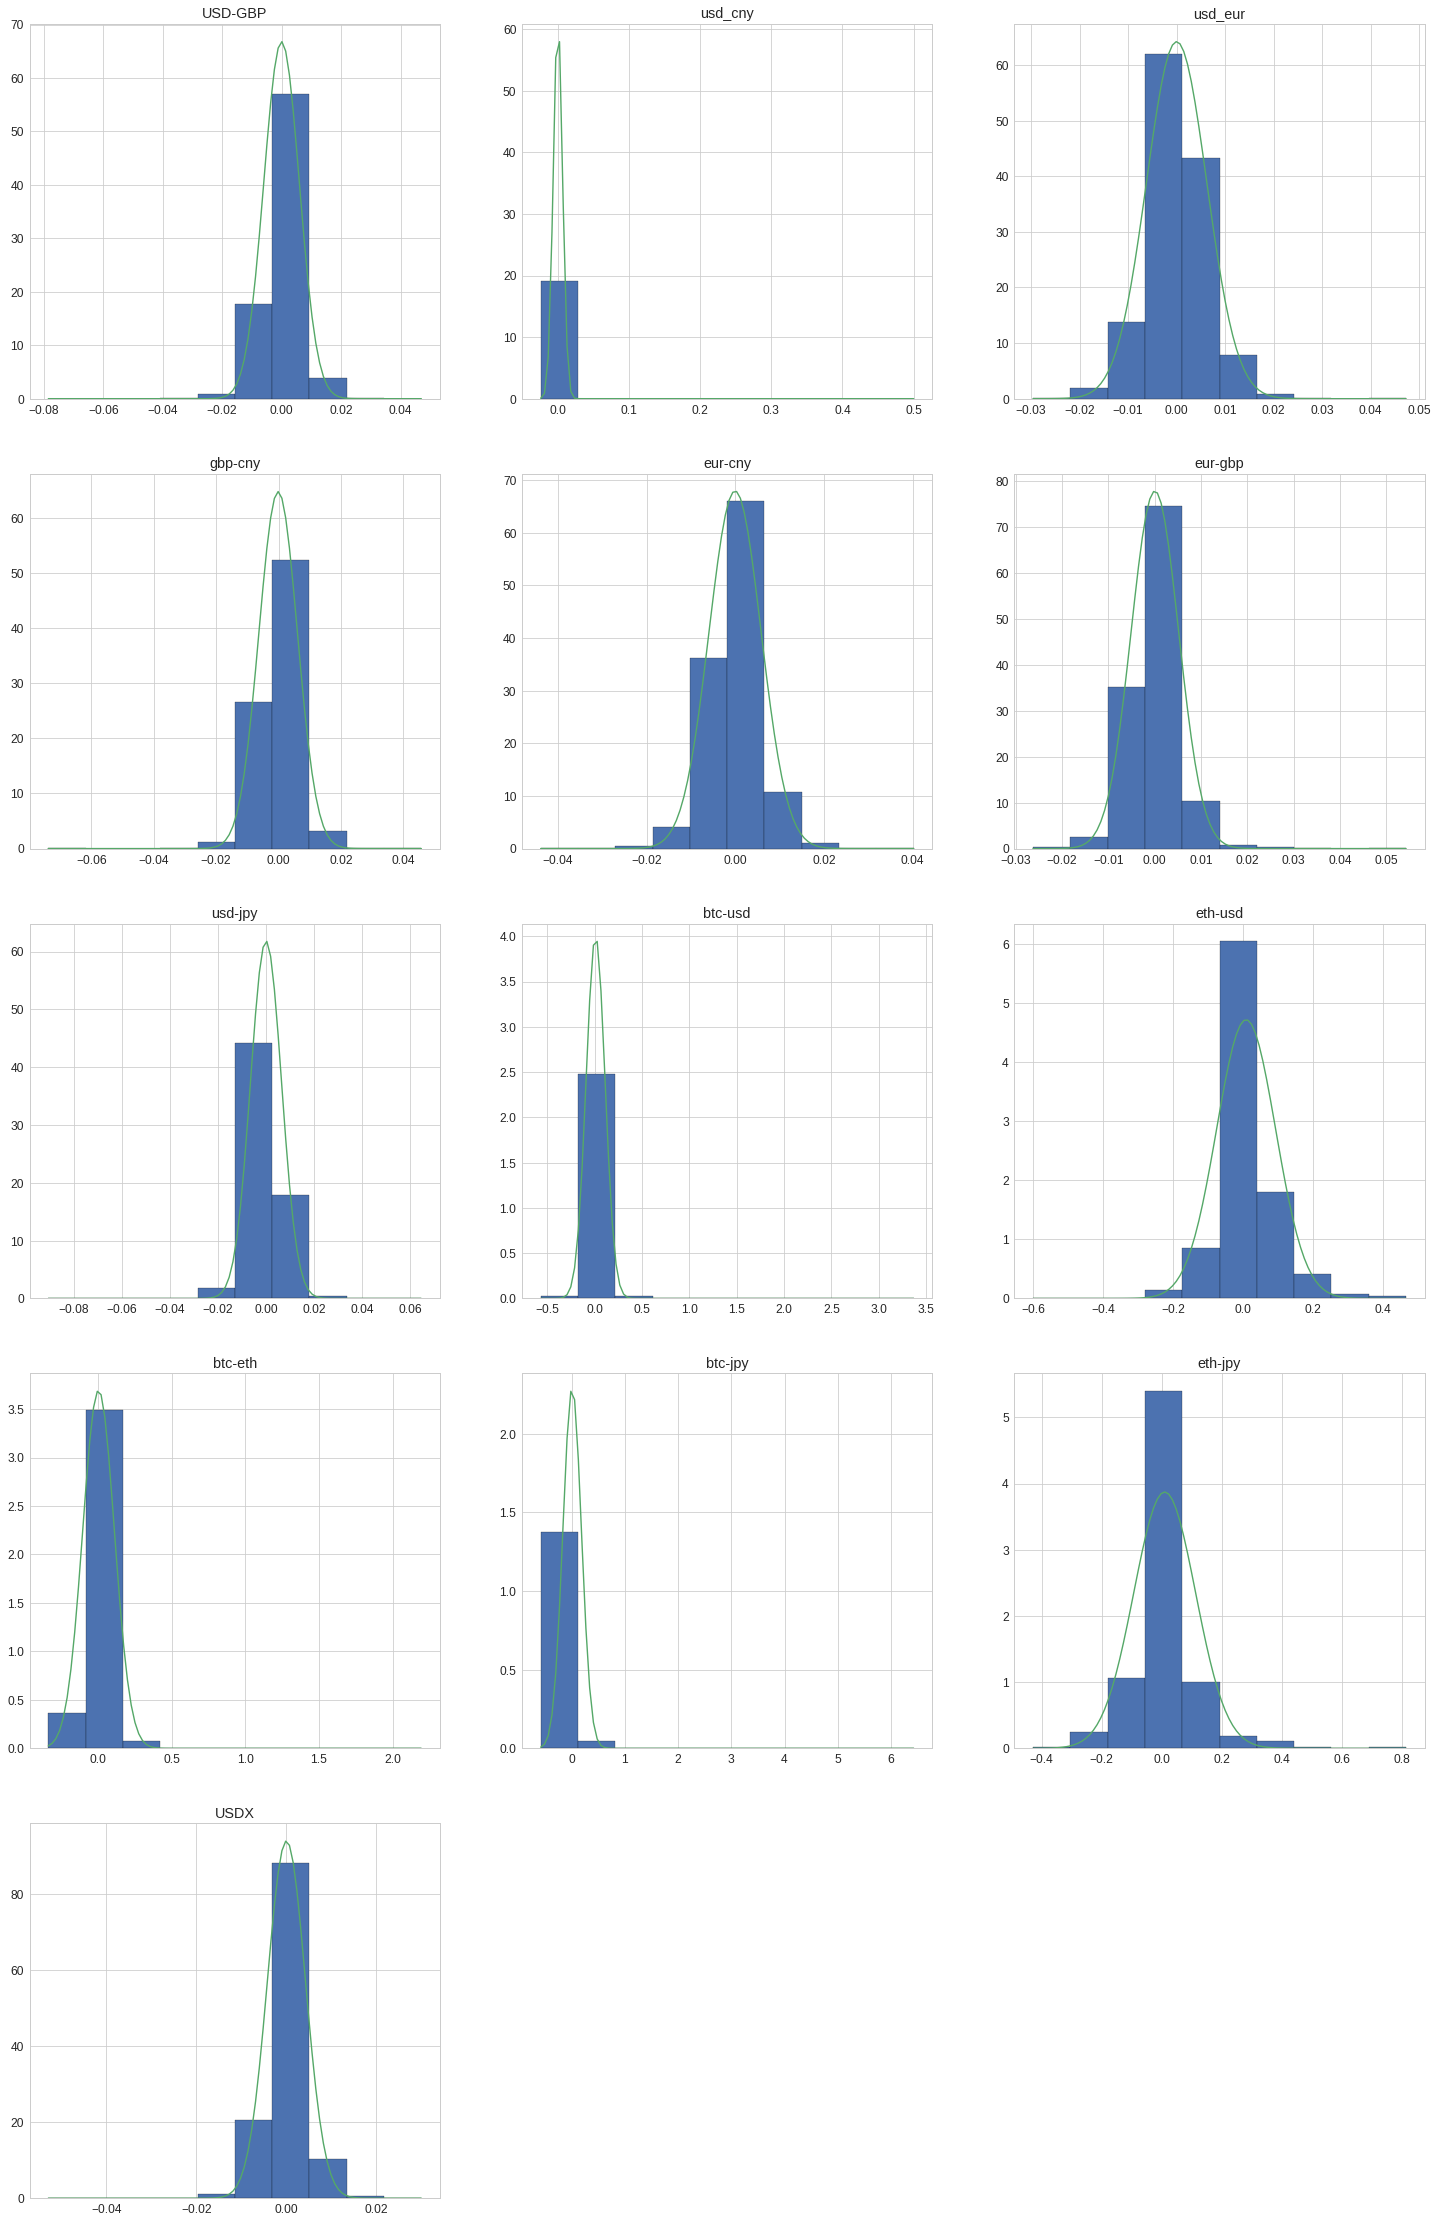

In [99]:
#plotting the histogram and distribution of return 
plt.figure(figsize=(25,40))
import matplotlib.mlab as mlab

plt.subplot(5,3,1)
plt.hist(returns.usd_gbp.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.usd_gbp.dropna()))
sd = float(np.std(returns.usd_gbp.dropna(), ddof=1))
min_chng = float(np.min(returns.usd_gbp.dropna()))
max_chng = float(np.max(returns.usd_gbp.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('USD-GBP')

plt.subplot(5,3,2)
plt.hist(returns.usd_cny.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.usd_cny.dropna()))
sd = float(np.std(returns.usd_cny.dropna(), ddof=1))
min_chng = float(np.min(returns.usd_cny.dropna()))
max_chng = float(np.max(returns.usd_cny.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('usd_cny')

plt.subplot(5,3,3)
plt.hist(returns.usd_eur.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.usd_eur.dropna()))
sd = float(np.std(returns.usd_eur.dropna(), ddof=1))
min_chng = float(np.min(returns.usd_eur.dropna()))
max_chng = float(np.max(returns.usd_eur.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('usd_eur')
          
plt.subplot(5,3,4)
plt.hist(returns.gbp_cny.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.gbp_cny.dropna()))
sd = float(np.std(returns.gbp_cny.dropna(), ddof=1))
min_chng = float(np.min(returns.gbp_cny.dropna()))
max_chng = float(np.max(returns.gbp_cny.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('gbp-cny')
    
plt.subplot(5,3,5)
plt.hist(returns.eur_cny.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.eur_cny.dropna()))
sd = float(np.std(returns.eur_cny.dropna(), ddof=1))
min_chng = float(np.min(returns.eur_cny.dropna()))
max_chng = float(np.max(returns.eur_cny.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('eur-cny')
          
plt.subplot(5,3,6)
plt.hist(returns.eur_gbp.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.eur_gbp.dropna()))
sd = float(np.std(returns.eur_gbp.dropna(), ddof=1))
min_chng = float(np.min(returns.eur_gbp.dropna()))
max_chng = float(np.max(returns.eur_gbp.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('eur-gbp')
          
plt.subplot(5,3,7)
plt.hist(returns.usd_jpy.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.usd_jpy.dropna()))
sd = float(np.std(returns.usd_jpy.dropna(), ddof=1))
min_chng = float(np.min(returns.usd_jpy.dropna()))
max_chng = float(np.max(returns.usd_jpy.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('usd-jpy')
          
plt.subplot(5,3,8)
plt.hist(returns.btc_usd.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.btc_usd.dropna()))
sd = float(np.std(returns.btc_usd.dropna(), ddof=1))
min_chng = float(np.min(returns.btc_usd.dropna()))
max_chng = float(np.max(returns.btc_usd.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('btc-usd')
          
plt.subplot(5,3,9)
plt.hist(returns.eth_usd.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.eth_usd.dropna()))
sd = float(np.std(returns.eth_usd.dropna(), ddof=1))
min_chng = float(np.min(returns.eth_usd.dropna()))
max_chng = float(np.max(returns.eth_usd.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('eth-usd')

          
plt.subplot(5,3,10)
plt.hist(returns.btc_eth.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.btc_eth.dropna()))
sd = float(np.std(returns.btc_eth.dropna(), ddof=1))
min_chng = float(np.min(returns.btc_eth.dropna()))
max_chng = float(np.max(returns.btc_eth.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('btc-eth')

          
plt.subplot(5,3,11)
plt.hist(returns.btc_jpy.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.btc_jpy.dropna()))
sd = float(np.std(returns.btc_jpy.dropna(), ddof=1))
min_chng = float(np.min(returns.btc_jpy.dropna()))
max_chng = float(np.max(returns.btc_jpy.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('btc-jpy')
          
plt.subplot(5,3,12)
plt.hist(returns.eth_jpy.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.eth_jpy.dropna()))
sd = float(np.std(returns.eth_jpy.dropna(), ddof=1))
min_chng = float(np.min(returns.eth_jpy.dropna()))
max_chng = float(np.max(returns.eth_jpy.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('eth-jpy')


plt.subplot(5,3,13)
plt.hist(returns.usdx.dropna(), edgecolor='black', normed=True)
mean = float(np.mean(returns.usdx.dropna()))
sd = float(np.std(returns.usdx.dropna(), ddof=1))
min_chng = float(np.min(returns.usdx.dropna()))
max_chng = float(np.max(returns.usdx.dropna()))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))
plt.title('USDX')

# Bolinger_Bands

Trading bands and envelopes provide relative definitions of high and low that can be used to create rigorous trading approaches, in pattern recognition etc. Bands are usually thought of as employing a measure of central tendency as a base such as a moving average, whereas envelopes encompass the price structure without a clearly defined central focus, perhaps by reference to highs and lows, or via cyclic analysis.

Bollinger Bands monitor shifts in price volatilities. Bollinger Bands consist of an upper band, a middle band, and a lower band. The middle band is the moving average of the currency exchange rate. The upper and lower bands are two standard deviations above and below the moving average:

Middle Band = 21 day moving average

Upper Band = 21 day moving average + (21 Day standard deviation of price x 2) 

Lower Band = 21 day moving average - (21 Day standard deviation of price x 2)


In [100]:
#finding rolling standard deviation 
rolling_std=pd.DataFrame()
rolling_std['usd_gbp']=(usd_gbp.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['usd_cny']=(usd_cny.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['usd_eur']=(usd_eur.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['gbp_cny']=(gbp_cny.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['eur_cny']=(eur_cny.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['eur_gbp']=(eur_gbp.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['usd_jpy']=(usd_jpy.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['btc_usd']=(btc_usd.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['eth_usd']=(eth_usd.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['btc_eth']=(btc_eth.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['btc_jpy']=(btc_jpy.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['eth_jpy']=(eth_jpy.Value.rolling(window = 21).std()).T.squeeze()
rolling_std['usdx']=(dxy.rolling(window = 21).std()).T.squeeze()
#rolling_std=rolling_std.dropna()

In [101]:
#Finding the rolling mean 
rolling_mean=pd.DataFrame()
rolling_mean['usd_gbp']=(usd_gbp.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['usd_cny']=(usd_cny.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['usd_eur']=(usd_eur.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['gbp_cny']=(gbp_cny.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['eur_cny']=(eur_cny.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['eur_gbp']=(eur_gbp.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['usd_jpy']=(usd_jpy.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['btc_usd']=(btc_usd.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['eth_usd']=(eth_usd.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['btc_eth']=(btc_eth.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['btc_jpy']=(btc_jpy.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['eth_jpy']=(eth_jpy.Value.rolling(window = 21).mean()).T.squeeze()
rolling_mean['usdx']=(dxy.rolling(window = 21).mean()).T.squeeze()
#rolling_mean=rolling_mean.dropna()

In [102]:
#finding the bands 
upper_band = rolling_mean + (rolling_std* 2)
lower_band = rolling_mean - (rolling_std* 2)
middle_band= rolling_mean

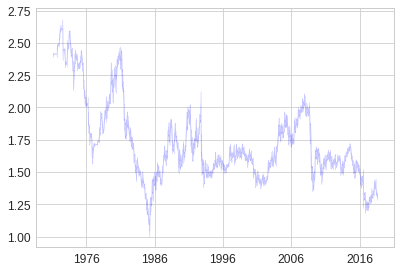

In [103]:
#plt.fill_between(rolling_std.index,lower_band.usd_gbp,upper_band.usd_gbp, color='b', alpha=0.2)
plt.fill_between(rolling_std.index,lower_band.usd_gbp,upper_band.usd_gbp, color='b', alpha=0.2)

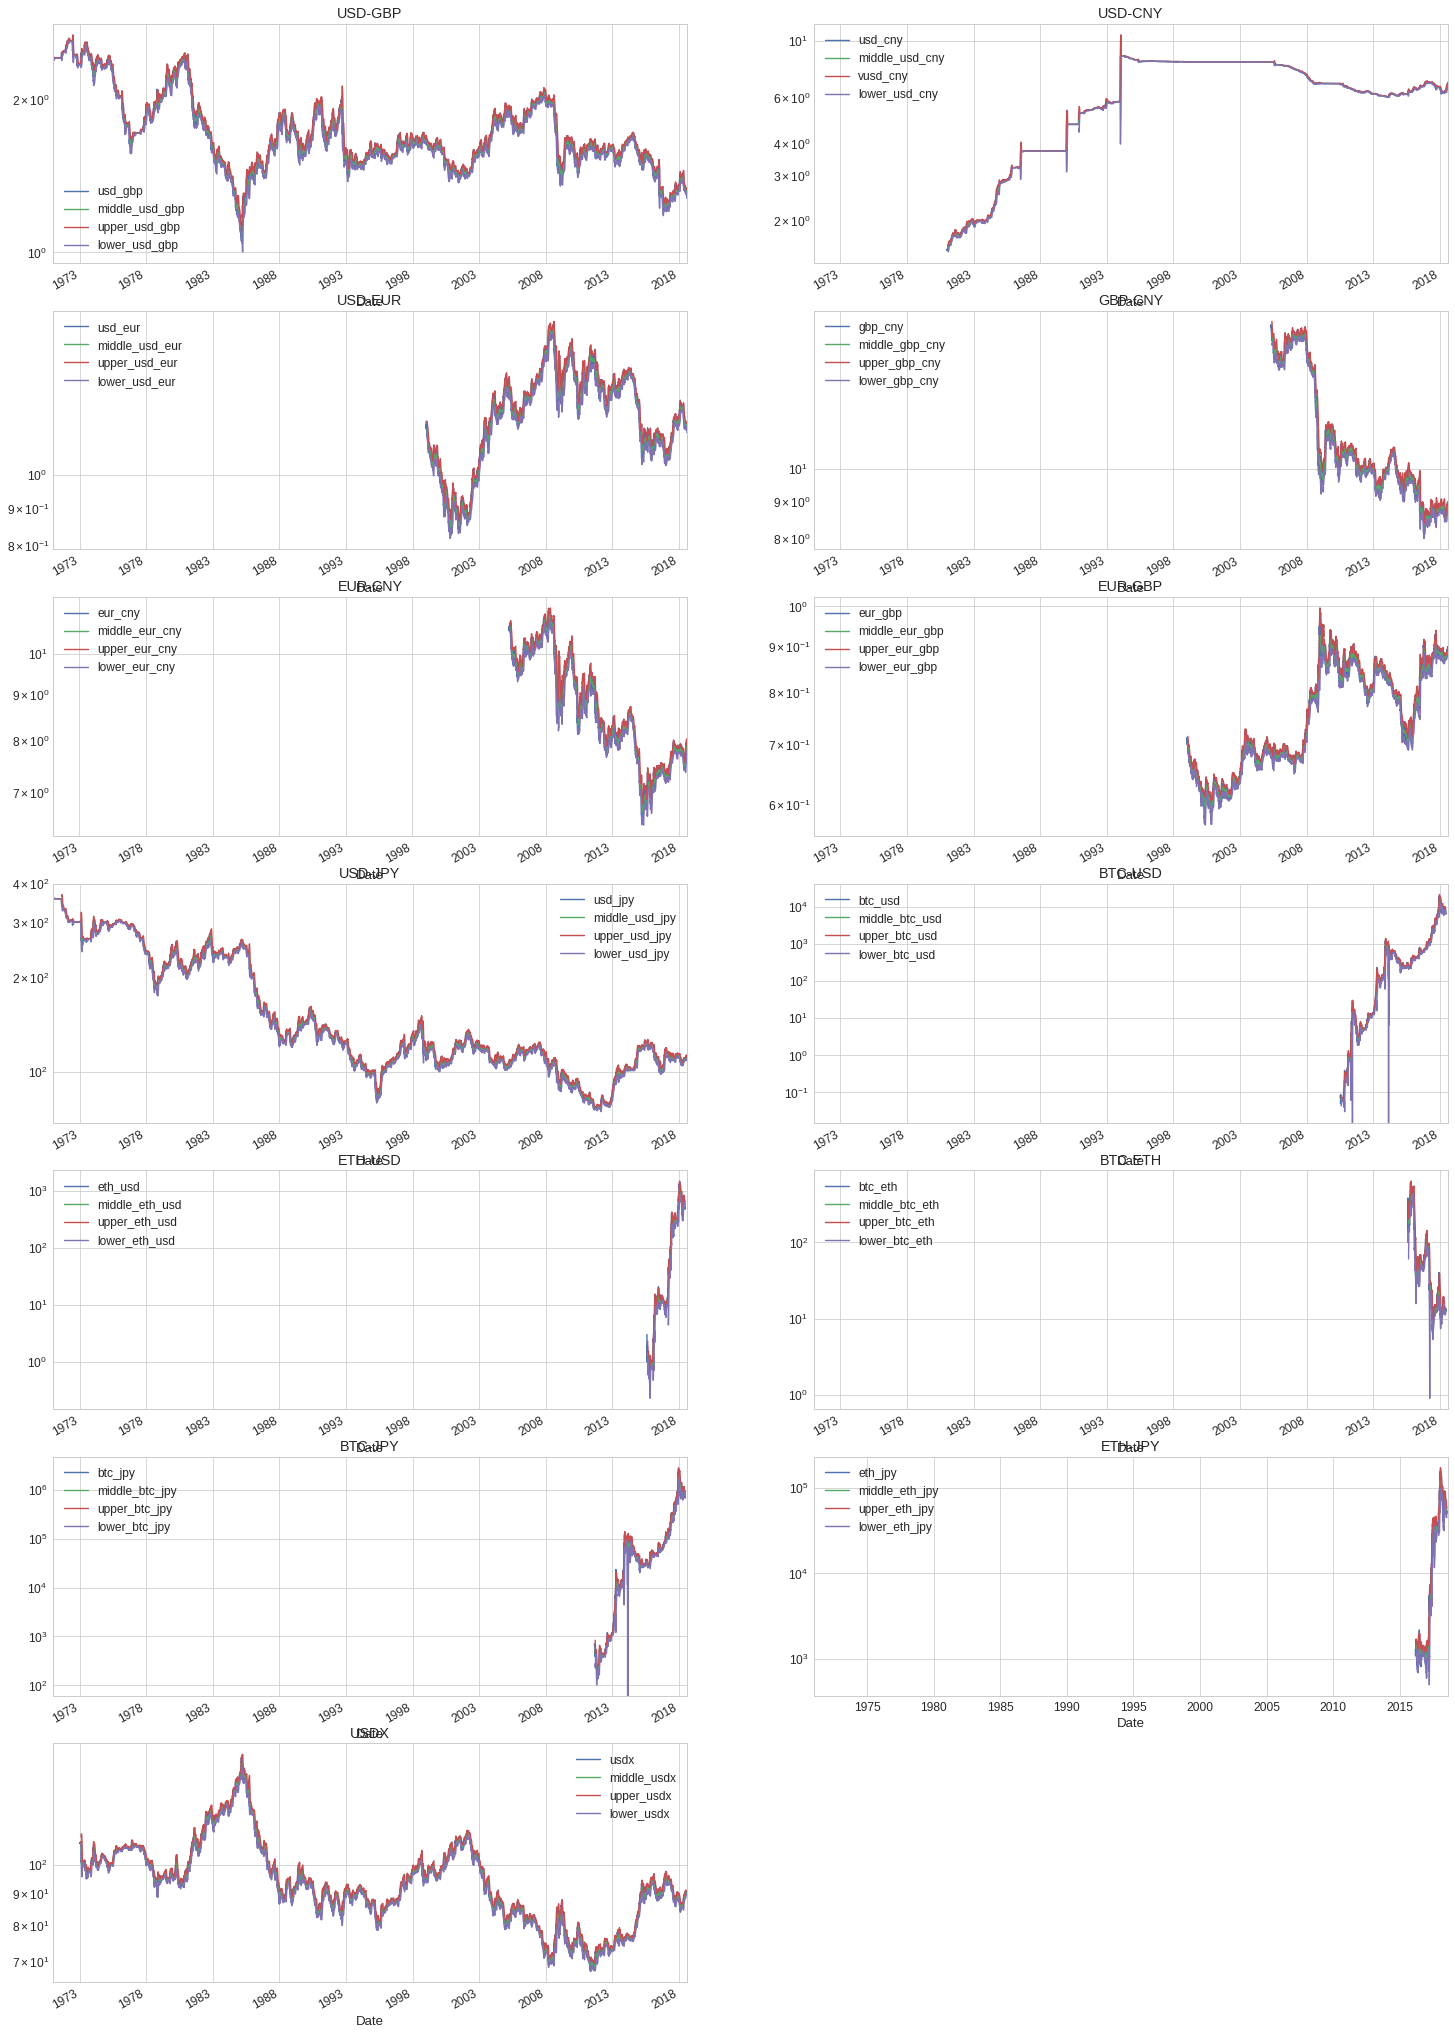

In [104]:
plt.figure(figsize=(25,40))
plt.subplot(7,2,1)
usd_gbp.Value.plot(label='usd_gbp',legend=True,logy=True)
middle_band.usd_gbp.plot(label='middle_usd_gbp',legend=True,logy=True)
upper_band.usd_gbp.plot(label='upper_usd_gbp',legend=True,logy=False)
lower_band.usd_gbp.plot(label='lower_usd_gbp',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.usd_gbp,upper_band.usd_gbp, color='b', alpha=0.2)

plt.title('USD-GBP')

plt.subplot(7,2,2)
usd_cny.Value.plot(label='usd_cny',legend=True,logy=True)
middle_band.usd_cny.plot(label='middle_usd_cny',legend=True,logy=True)
upper_band.usd_cny.plot(label='vusd_cny',legend=True,logy=False)
lower_band.usd_cny.plot(label='lower_usd_cny',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.usd_cny,upper_band.usd_cny, color='b', alpha=0.2)
plt.title('USD-CNY')
          
plt.subplot(7,2,3)
usd_eur.Value.plot(label='usd_eur',legend=True,logy=True)
middle_band.usd_eur.plot(label='middle_usd_eur',legend=True,logy=True)
upper_band.usd_eur.plot(label='upper_usd_eur',legend=True,logy=False)
lower_band.usd_eur.plot(label='lower_usd_eur',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.usd_eur,upper_band.usd_eur, color='b', alpha=0.2)
plt.title('USD-EUR')
          
plt.subplot(7,2,4)
gbp_cny.Value.plot(label='gbp_cny',legend=True,logy=True)
middle_band.gbp_cny.plot(label='middle_gbp_cny',legend=True,logy=True)
upper_band.gbp_cny.plot(label='upper_gbp_cny',legend=True,logy=False)
lower_band.gbp_cny.plot(label='lower_gbp_cny',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.gbp_cny,upper_band.gbp_cny, color='b', alpha=0.2)
plt.title('GBP-CNY')
                
plt.subplot(7,2,5)
eur_cny.Value.plot(label='eur_cny',legend=True,logy=True)
middle_band.eur_cny.plot(label='middle_eur_cny',legend=True,logy=True)
upper_band.eur_cny.plot(label='upper_eur_cny',legend=True,logy=False)
lower_band.eur_cny.plot(label='lower_eur_cny',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.eur_cny,upper_band.eur_cny, color='b', alpha=0.2)
plt.title('EUR-CNY')
          
plt.subplot(7,2,6)
eur_gbp.Value.plot(label='eur_gbp',legend=True,logy=True)
middle_band.eur_gbp.plot(label='middle_eur_gbp',legend=True,logy=True)
upper_band.eur_gbp.plot(label='upper_eur_gbp',legend=True,logy=False)
lower_band.eur_gbp.plot(label='lower_eur_gbp',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.eur_gbp,upper_band.eur_gbp, color='b', alpha=0.2)
plt.title('EUR-GBP')
          
plt.subplot(7,2,7)
usd_jpy.Value.plot(label='usd_jpy',legend=True,logy=True)
middle_band.usd_jpy.plot(label='middle_usd_jpy',legend=True,logy=True)
upper_band.usd_jpy.plot(label='upper_usd_jpy',legend=True,logy=False)
lower_band.usd_jpy.plot(label='lower_usd_jpy',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.usd_jpy,upper_band.usd_jpy, color='b', alpha=0.2)
plt.title('USD-JPY')
          
          
plt.subplot(7,2,8)
btc_usd.Value.plot(label='btc_usd',legend=True,logy=True)
middle_band.btc_usd.plot(label='middle_btc_usd',legend=True,logy=True)
upper_band.btc_usd.plot(label='upper_btc_usd',legend=True,logy=False)
lower_band.btc_usd.plot(label='lower_btc_usd',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.btc_usd,upper_band.btc_usd, color='b', alpha=0.2)
plt.title('BTC-USD')
          
plt.subplot(7,2,9)
eth_usd.Value.plot(label='eth_usd',legend=True,logy=True)
middle_band.eth_usd.plot(label='middle_eth_usd',legend=True,logy=True)
upper_band.eth_usd.plot(label='upper_eth_usd',legend=True,logy=False)
lower_band.eth_usd.plot(label='lower_eth_usd',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.eth_usd,upper_band.eth_usd, color='b', alpha=0.2)
plt.title('ETH-USD')
          
plt.subplot(7,2,10)
btc_eth.Value.plot(label='btc_eth',legend=True,logy=True)
middle_band.btc_eth.plot(label='middle_btc_eth',legend=True,logy=True)
upper_band.btc_eth.plot(label='upper_btc_eth',legend=True,logy=False)
lower_band.btc_eth.plot(label='lower_btc_eth',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.btc_eth,upper_band.btc_eth, color='b', alpha=0.2)
plt.title('BTC-ETH')
          
plt.subplot(7,2,11)
btc_jpy.Value.plot(label='btc_jpy',legend=True,logy=True)
middle_band.btc_jpy.plot(label='middle_btc_jpy',legend=True,logy=True)
upper_band.btc_jpy.plot(label='upper_btc_jpy',legend=True,logy=False)
lower_band.btc_jpy.plot(label='lower_btc_jpy',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.btc_jpy,upper_band.btc_jpy, color='b', alpha=0.2)
plt.title('BTC-JPY')
          
plt.subplot(7,2,12)
eth_jpy.Value.plot(label='eth_jpy',legend=True,logy=True)
middle_band.eth_jpy.plot(label='middle_eth_jpy',legend=True,logy=True)
upper_band.eth_jpy.plot(label='upper_eth_jpy',legend=True,logy=False)
lower_band.eth_jpy.plot(label='lower_eth_jpy',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.eth_jpy,upper_band.eth_jpy, color='b', alpha=0.2)
plt.title('ETH-JPY')

plt.subplot(7,2,13)
dxy.Value.plot(label='usdx',legend=True,logy=True)
middle_band.usdx.plot(label='middle_usdx',legend=True,logy=True)
upper_band.usdx.plot(label='upper_usdx',legend=True,logy=False)
lower_band.usdx.plot(label='lower_usdx',legend=True,logy=False)
plt.fill_between(rolling_std.index,lower_band.usdx,upper_band.usdx, color='b', alpha=0.2)
plt.title('USDX')

# Covariance Plot

Covariance is a measure of the joint variability of two random variables. The sign of the covariance shows the tendency in the linear relationship between the variables. Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.


In [105]:
cov_df=returns[1:].dropna().cov()
cov_df

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx
usd_gbp,4.893750e-05,-6.143767e-06,0.000019,0.000042,0.000011,-2.460380e-05,-2.019961e-06,0.000004,1.126512e-05,-2.281159e-07,0.000004,-0.000013,-1.795231e-05
usd_cny,-6.143767e-06,4.849595e-06,-0.000006,-0.000002,-0.000002,1.995162e-07,4.575262e-06,0.000002,6.918352e-06,-6.174406e-06,0.000006,0.000009,5.206658e-06
usd_eur,1.911153e-05,-5.903502e-06,0.000024,0.000013,0.000012,1.714482e-06,-1.252217e-05,0.000001,3.357478e-06,3.044882e-06,-0.000005,0.000003,-1.784939e-05
gbp_cny,4.221563e-05,-2.053891e-06,0.000013,0.000044,0.000010,-2.636718e-05,1.618662e-06,0.000010,2.521300e-05,-9.472064e-06,0.000013,0.000007,-1.272502e-05
eur_cny,1.091903e-05,-1.739058e-06,0.000012,0.000010,0.000017,4.414621e-06,-3.887327e-06,0.000007,4.462759e-06,6.999043e-06,0.000004,0.000022,-8.899029e-06
eur_gbp,-2.460380e-05,1.995162e-07,0.000002,-0.000026,0.000004,3.466068e-05,-8.323957e-06,0.000007,-1.419487e-05,1.875524e-05,0.000006,-0.000010,9.475803e-07
usd_jpy,-2.019961e-06,4.575262e-06,-0.000013,0.000002,-0.000004,-8.323957e-06,4.117560e-05,-0.000007,2.845779e-07,-1.657338e-05,0.000007,0.000024,1.417333e-05
btc_usd,4.360199e-06,2.304575e-06,0.000001,0.000010,0.000007,6.793377e-06,-7.336926e-06,0.002049,1.329348e-03,7.086953e-04,0.002251,0.000318,-1.175101e-06
eth_usd,1.126512e-05,6.918352e-06,0.000003,0.000025,0.000004,-1.419487e-05,2.845779e-07,0.001329,4.799102e-03,-3.326458e-03,0.001448,0.001617,-3.405824e-06
btc_eth,-2.281159e-07,-6.174406e-06,0.000003,-0.000009,0.000007,1.875524e-05,-1.657338e-05,0.000709,-3.326458e-03,4.026609e-03,0.000779,-0.001270,-3.027055e-06


In [106]:
cov_df=cov_df.reset_index()

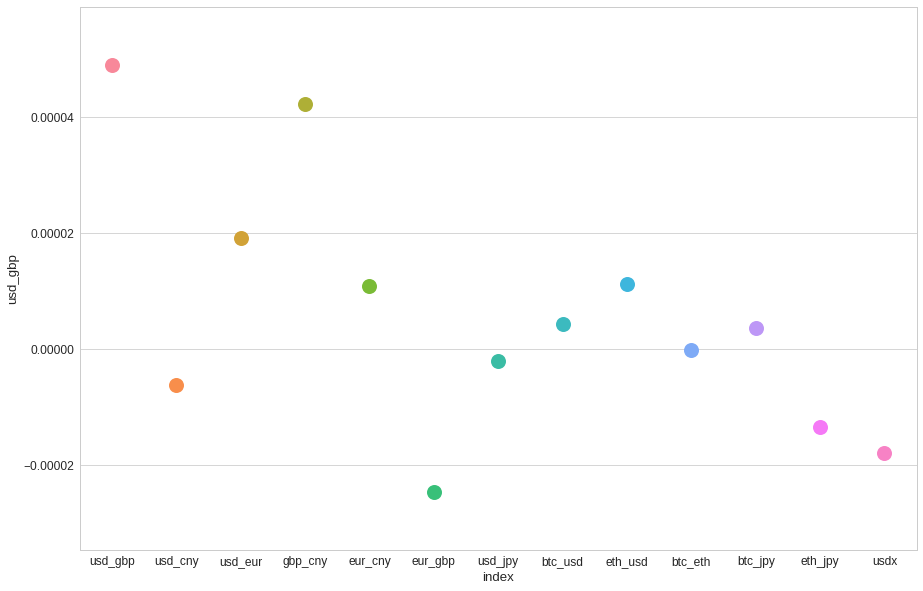

In [87]:
plt.figure(figsize=(15,10))

sns.set_context("paper", font_scale=1.5)       
ymin=cov_df.usd_gbp.min()
ymax=cov_df.usd_gbp.max()
g=sns.stripplot(x="index", y="usd_gbp", data=cov_df,size=15)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.show()

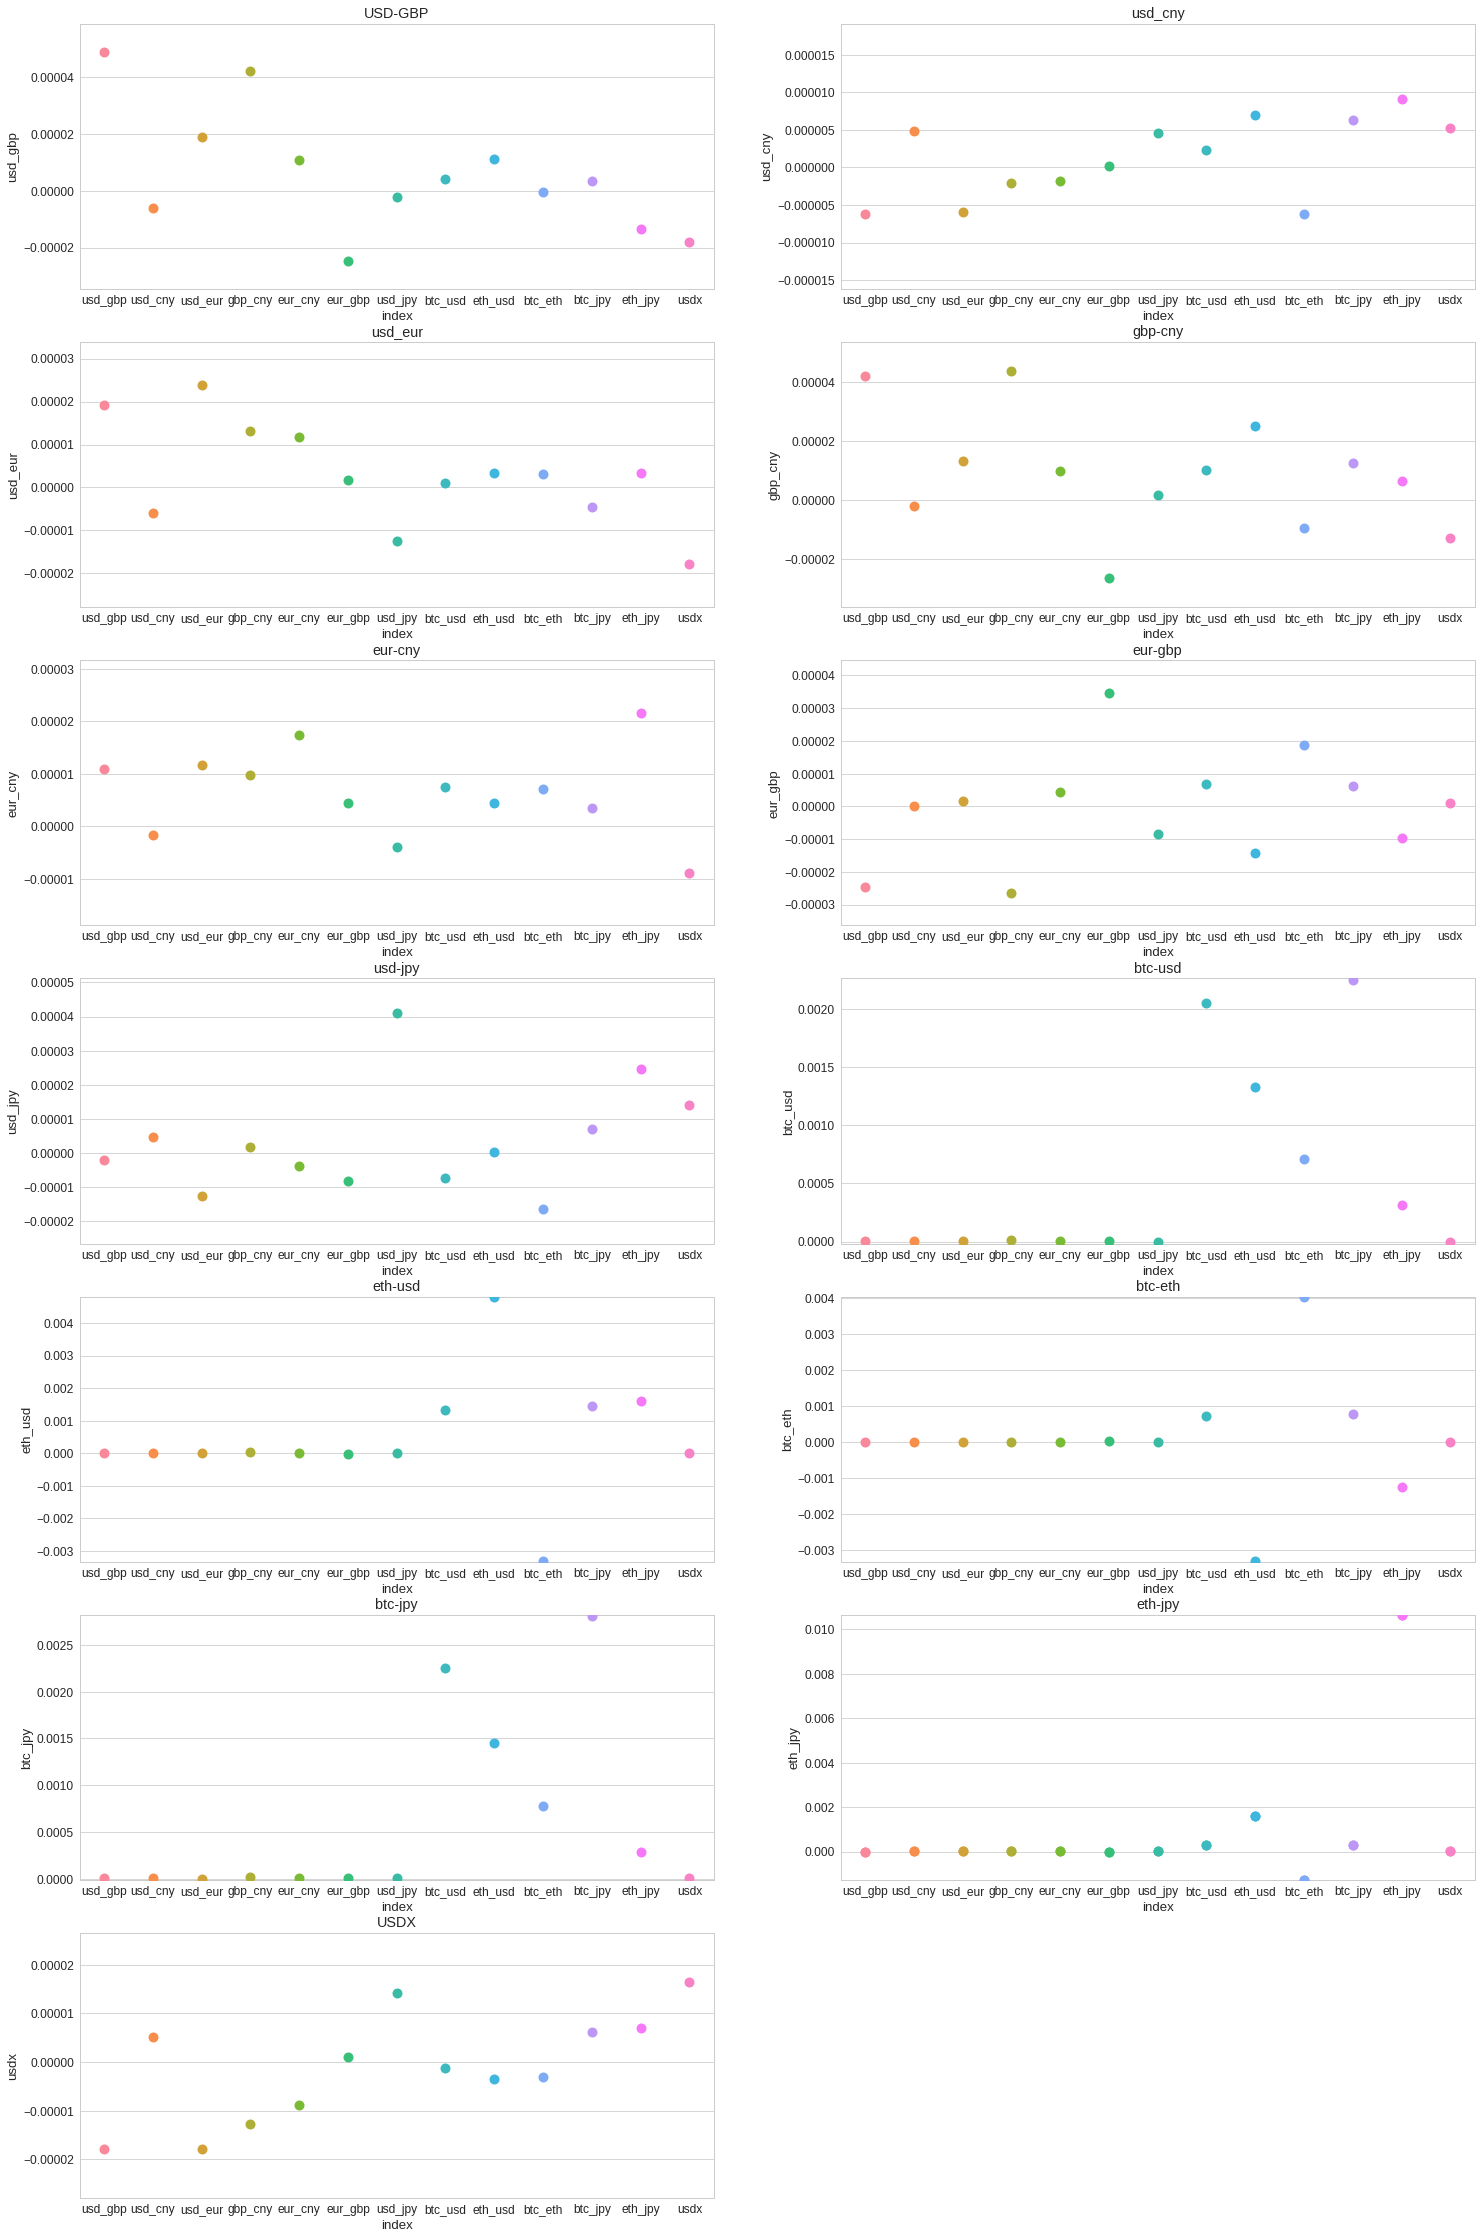

In [89]:
#plotting the covarince of currency pair wrt to each individual currency pair

plt.figure(figsize=(25,40))
sns.set_context("paper", font_scale=1.5)    
plt.subplot(7,2,1) 
ymin=cov_df.usd_gbp.min()
ymax=cov_df.usd_gbp.max()
g=sns.stripplot(x="index", y="usd_gbp", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('USD-GBP')

plt.subplot(7,2,2)
ymin=cov_df.usd_cny.min()
ymax=cov_df.usd_cny.max()
g=sns.stripplot(x="index", y="usd_cny", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('usd_cny')

plt.subplot(7,2,3)
ymin=cov_df.usd_eur.min()
ymax=cov_df.usd_eur.max()
g=sns.stripplot(x="index", y="usd_eur", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('usd_eur')
          
plt.subplot(7,2,4)
ymin=cov_df.gbp_cny.min()
ymax=cov_df.gbp_cny.max()
g=sns.stripplot(x="index", y="gbp_cny", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('gbp-cny')
    
plt.subplot(7,2,5)
ymin=cov_df.eur_cny.min()
ymax=cov_df.eur_cny.max()
g=sns.stripplot(x="index", y="eur_cny", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('eur-cny')
          
plt.subplot(7,2,6)
ymin=cov_df.eur_gbp.min()
ymax=cov_df.eur_gbp.max()
g=sns.stripplot(x="index", y="eur_gbp", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('eur-gbp')
          
plt.subplot(7,2,7)
ymin=cov_df.usd_jpy.min()
ymax=cov_df.usd_jpy.max()
g=sns.stripplot(x="index", y="usd_jpy", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('usd-jpy')
          
plt.subplot(7,2,8)
ymin=cov_df.btc_usd.min()
ymax=cov_df.btc_usd.max()
g=sns.stripplot(x="index", y="btc_usd", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('btc-usd')
          
plt.subplot(7,2,9)
ymin=cov_df.eth_usd.min()
ymax=cov_df.eth_usd.max()
g=sns.stripplot(x="index", y="eth_usd", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('eth-usd')

          
plt.subplot(7,2,10)
ymin=cov_df.btc_eth.min()
ymax=cov_df.btc_eth.max()
g=sns.stripplot(x="index", y="btc_eth", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('btc-eth')

          
plt.subplot(7,2,11)
ymin=cov_df.btc_jpy.min()
ymax=cov_df.btc_jpy.max()
g=sns.stripplot(x="index", y="btc_jpy", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('btc-jpy')
          
plt.subplot(7,2,12)
ymin=cov_df.eth_jpy.min()
ymax=cov_df.eth_jpy.max()
g=sns.stripplot(x="index", y="eth_jpy", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('eth-jpy')

plt.subplot(7,2,12)
ymin=cov_df.eth_jpy.min()
ymax=cov_df.eth_jpy.max()
g=sns.stripplot(x="index", y="eth_jpy", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('eth-jpy')


plt.subplot(7,2,13)
ymin=cov_df.usdx.min()
ymax=cov_df.usdx.max()
g=sns.stripplot(x="index", y="usdx", data=cov_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('USDX')

plt.show()
           

# Correlation Plot

In [107]:
corr_df=corr_df.reset_index()


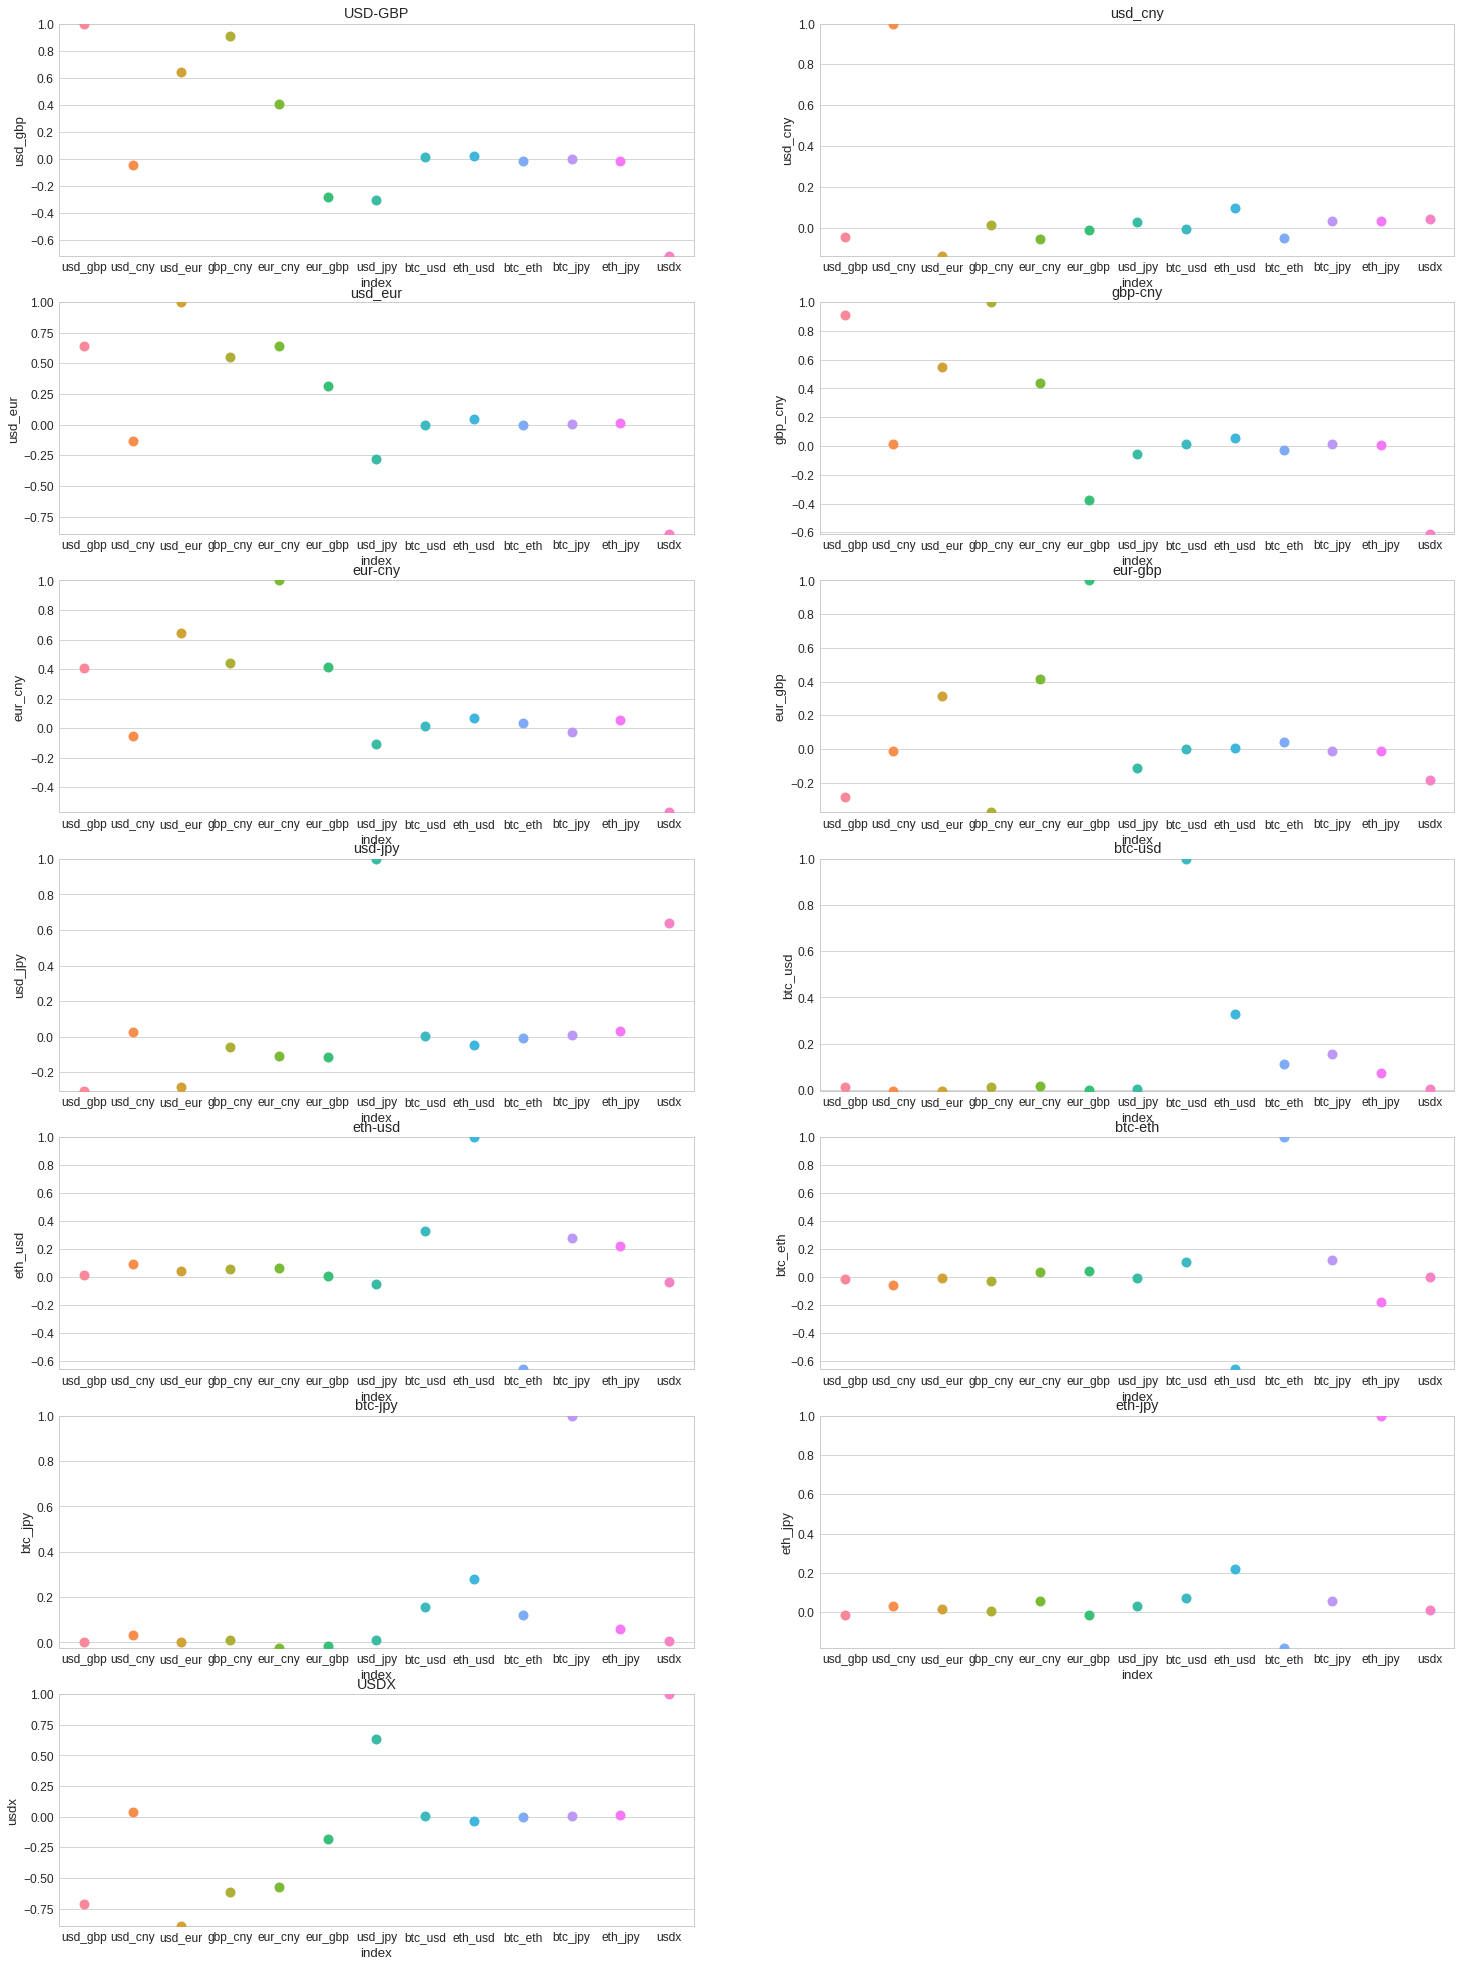

In [108]:
#plotting the correlation of each pair wrt to individual pair 
plt.figure(figsize=(25,35))
import matplotlib.mlab as mlab
sns.set_context("paper", font_scale=1.5)     

plt.subplot(7,2,1) 
ymin=corr_df.usd_gbp.min()
ymax=corr_df.usd_gbp.max()
g=sns.stripplot(x="index", y="usd_gbp", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('USD-GBP')

plt.subplot(7,2,2)
ymin=corr_df.usd_cny.min()
ymax=corr_df.usd_cny.max()
g=sns.stripplot(x="index", y="usd_cny", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('usd_cny')

plt.subplot(7,2,3)
ymin=corr_df.usd_eur.min()
ymax=corr_df.usd_eur.max()
g=sns.stripplot(x="index", y="usd_eur", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('usd_eur')
          
plt.subplot(7,2,4)
ymin=corr_df.gbp_cny.min()
ymax=corr_df.gbp_cny.max()
g=sns.stripplot(x="index", y="gbp_cny", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('gbp-cny')
    
plt.subplot(7,2,5)
ymin=corr_df.eur_cny.min()
ymax=corr_df.eur_cny.max()
g=sns.stripplot(x="index", y="eur_cny", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('eur-cny')
          
plt.subplot(7,2,6)
ymin=corr_df.eur_gbp.min()
ymax=corr_df.eur_gbp.max()
g=sns.stripplot(x="index", y="eur_gbp", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('eur-gbp')
          
plt.subplot(7,2,7)
ymin=corr_df.usd_jpy.min()
ymax=corr_df.usd_jpy.max()
g=sns.stripplot(x="index", y="usd_jpy", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('usd-jpy')
          
plt.subplot(7,2,8)
ymin=corr_df.btc_usd.min()
ymax=corr_df.btc_usd.max()
g=sns.stripplot(x="index", y="btc_usd", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('btc-usd')
          
plt.subplot(7,2,9)
ymin=corr_df.eth_usd.min()
ymax=corr_df.eth_usd.max()
g=sns.stripplot(x="index", y="eth_usd", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('eth-usd')

          
plt.subplot(7,2,10)
ymin=corr_df.btc_eth.min()
ymax=corr_df.btc_eth.max()
g=sns.stripplot(x="index", y="btc_eth", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('btc-eth')

          
plt.subplot(7,2,11)
ymin=corr_df.btc_jpy.min()
ymax=corr_df.btc_jpy.max()
g=sns.stripplot(x="index", y="btc_jpy", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('btc-jpy')
          
plt.subplot(7,2,12)
ymin=corr_df.eth_jpy.min()
ymax=corr_df.eth_jpy.max()
g=sns.stripplot(x="index", y="eth_jpy", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('eth-jpy')

plt.subplot(7,2,13) 
ymin=corr_df.usdx.min()
ymax=corr_df.usdx.max()
g=sns.stripplot(x="index", y="usdx", data=corr_df,size=10)
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('USDX')

plt.show()
           

In [109]:
!pip install msgpack

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [110]:
!pip install pandas_datareader

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [111]:
!pip install fix_yahoo-finance

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


S&P 500 - The S&P 500 is a stock market index using a weighted average of the market capitalizations of 500 companies across both the NYSE and NASDAQ exchanges. The S&P 500 is the standard index used in for calculating beta for a stock.


In [112]:
from pandas_datareader import data as pdr  
import fix_yahoo_finance as yf
yf.pdr_override()
df2=pdr.get_data_yahoo("SPY",start="2016-01-01", end="2018-01-01")

[*********************100%***********************]  1 of 1 downloaded


In [113]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,191.411438,222353500
2016-01-05,201.399994,201.899994,200.050003,201.360001,191.735214,110845800
2016-01-06,198.339996,200.059998,197.600006,198.820007,189.316635,152112600
2016-01-07,195.330002,197.440002,193.589996,194.050003,184.774628,213436100
2016-01-08,195.190002,195.850006,191.580002,191.919998,182.746445,209817200
2016-01-11,193.009995,193.410004,189.820007,192.110001,182.927368,185113200
2016-01-12,193.820007,194.550003,191.139999,193.660004,184.403259,172330500
2016-01-13,194.449997,194.860001,188.380005,188.830002,179.804153,221168900
2016-01-14,189.550003,193.259995,187.660004,191.929993,182.755951,240795600


In [114]:
return_spy=df2.Close.pct_change()[1:]

In [115]:
df3=returns[1:]
df3['spy']=return_spy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
df3=df3.dropna()
df3

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx,spy
Date,,,,,,,,,,,,,,
2016-03-04,0.005229,-0.003797,0.005663,0.000422,0.002553,0.000620,0.003347,-0.024025,0.065241,-0.079096,-0.024618,0.000009,-0.003889,0.003254
2016-03-07,0.002109,0.001399,-0.000545,0.000627,-0.001385,-0.000581,-0.002721,0.021948,-0.134791,0.203065,0.018778,-0.153840,-0.001069,0.000798
2016-03-08,-0.002175,-0.001704,0.002181,-0.001286,0.005085,0.002195,-0.008979,-0.007159,0.040000,-0.036624,-0.005644,0.118182,-0.000323,-0.010918
2016-03-09,0.000773,0.000938,-0.000544,0.001709,-0.003875,-0.006095,0.004264,0.002088,0.169028,-0.181346,0.000582,0.056911,-0.002687,0.004940
2016-03-10,0.004917,-0.000538,0.012702,0.005443,-0.009501,-0.005276,0.000354,0.007438,-0.038095,0.072974,0.007109,0.000000,-0.002814,0.000802
2016-03-11,0.008388,-0.001998,0.001613,0.004136,0.018817,0.011300,0.004951,0.007888,0.012601,0.005376,0.010736,-0.061538,-0.004657,0.016137
2016-03-14,-0.007071,0.000678,-0.006530,-0.004322,0.001539,-0.002152,-0.000616,0.004607,-0.166667,0.200218,0.008418,0.062494,0.005216,-0.001282
2016-03-15,-0.011030,0.001939,0.000450,-0.009121,0.001468,0.012011,-0.006251,0.001979,0.047200,-0.026594,0.001307,-0.175878,0.001198,-0.001630
2016-03-16,-0.004659,0.001213,-0.003330,-0.003448,-0.002157,0.004747,0.007176,0.001879,-0.012987,0.005278,-0.001168,0.070664,0.003256,0.005787


In [117]:
df3_cov=df3.cov()
df3_cov

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx,spy
usd_gbp,5.541587e-05,-6.523185e-06,2.034641e-05,4.841658e-05,0.000012,-2.864698e-05,-0.000001,1.894237e-06,0.000011,-8.722515e-07,5.415834e-06,-2.063036e-05,-1.945313e-05,1.033390e-05
usd_cny,-6.523185e-06,4.217280e-06,-5.816362e-06,-3.314105e-06,-0.000002,7.294675e-07,0.000005,-9.019557e-08,0.000004,-5.231990e-06,3.291238e-06,6.260515e-06,5.258171e-06,1.170089e-07
usd_eur,2.034641e-05,-5.816362e-06,2.499078e-05,1.494624e-05,0.000012,1.524746e-06,-0.000014,9.510768e-07,0.000005,2.664928e-06,-1.827971e-06,1.264329e-05,-1.891638e-05,-1.938054e-07
gbp_cny,4.841658e-05,-3.314105e-06,1.494624e-05,4.889844e-05,0.000011,-3.004539e-05,0.000002,2.050895e-06,0.000020,-1.019744e-05,5.490524e-06,-4.546496e-07,-1.451182e-05,1.078760e-05
eur_cny,1.171043e-05,-1.792753e-06,1.218738e-05,1.069680e-05,0.000018,4.869410e-06,-0.000004,6.249464e-06,0.000004,5.843023e-06,4.441656e-06,3.051101e-05,-9.408866e-06,1.846598e-06
eur_gbp,-2.864698e-05,7.294675e-07,1.524746e-06,-3.004539e-05,0.000005,3.905879e-05,-0.000010,8.778062e-06,-0.000017,2.223788e-05,6.552963e-06,-3.622490e-06,1.118683e-06,-7.729833e-06
usd_jpy,-1.443790e-06,5.284815e-06,-1.405162e-05,2.477495e-06,-0.000004,-1.030330e-05,0.000046,-4.277815e-06,0.000011,-2.647881e-05,8.075213e-06,3.066044e-05,1.601717e-05,1.219545e-05
btc_usd,1.894237e-06,-9.019557e-08,9.510768e-07,2.050895e-06,0.000006,8.778062e-06,-0.000004,1.797780e-03,0.000908,8.727139e-04,1.980695e-03,-1.320524e-04,2.427637e-07,8.767280e-07
eth_usd,1.099650e-05,3.818865e-06,4.807268e-06,1.977510e-05,0.000004,-1.718924e-05,0.000011,9.076664e-04,0.004962,-3.886561e-03,9.885485e-04,1.387375e-03,-1.524432e-06,5.430450e-06
btc_eth,-8.722515e-07,-5.231990e-06,2.664928e-06,-1.019744e-05,0.000006,2.223788e-05,-0.000026,8.727139e-04,-0.003887,4.747057e-03,9.643909e-04,-1.500813e-03,-4.486191e-06,-6.895915e-06


In [118]:
spy_var=df3.spy.var()
spy_var

3.1331284324821752e-05

# Beta Calculation 

The Beta of an currency exchange/stock is a measure of the sensitivity of its returns relative to a market benchmark i.e market index. It represents sensitivity/insensitivity of the returns of an currency exchange/stock to the overall market returns (usually a market index like S&P 500, or for our currency study: SDR and US dollar index).
         
β =0 indicates no correlation with the chosen benchmark (e.g. SDR index )
β =1  indicates a stock has the same volatility as the market
β >1 indicates a stock that is more volatile than its benchmark      
β <1 indicates a stock that is less volatile than the benchmark
β = 1.5 is 50% more volatile than the benchmark

Beta values indicate relative volatility to the index only if there is correlation (positive or negative) with the index. An asset with a Beta of less than 1, can be considered to be less volatile than the index, if the two series are correlated. However, an asset could have low beta value and still have a high amount of volatility if it is not correlated with the index. 


In [119]:
beta_df1=pd.DataFrame()
beta=df3_cov.spy/spy_var
beta_df1['value']=beta[:-1]
beta_df1

,value
usd_gbp,0.329827
usd_cny,0.003735
usd_eur,-0.006186
gbp_cny,0.344308
eur_cny,0.058938
eur_gbp,-0.246713
usd_jpy,0.389242
btc_usd,0.027983
eth_usd,0.173324
btc_eth,-0.220097


In [120]:
beta_df1=beta_df1.reset_index()

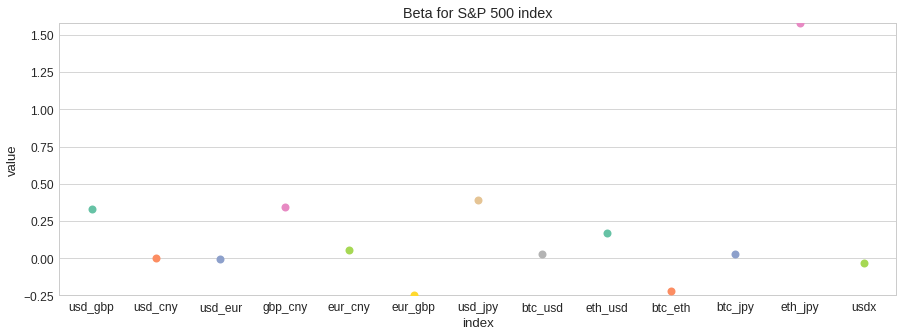

In [121]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_df1.value.min()
ymax=beta_df1.value.max()
g=sns.stripplot(x="index", y="value", data=beta_df1,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('Beta for S&P 500 index')

# Beta for XDR index

Currency SDR = .4173 (USD-USD=1) + .3093 * (EUR-USD) + 0.0833 * (1/USD-CNY) + 0.0809 (1/USD_JPY) + 0.1092* (USD-GBP)

SDR- Special drawing rights (XDR/SDR) is an index used by the International Monetary Fund (IMF) for international debt accounting. The amount is a basket of currencies with weights set by the IMF every five years. Currently, the XDR basket consists of the following five currencies: U.S. dollar 41.73%, Euro 30.93%, Renminbi (Chinese yuan) 10.92%, Japanese yen 8.33%, British pound 8.09%. 



In [122]:
sdr_index=pd.DataFrame()
USD_USD=usd_eur
USD_USD['Value']=1
EUR_USD=usd_eur
USD_CNY=usd_cny
USD_JPY=usd_jpy
USD_GBP=usd_gbp
sdr_index= (USD_USD.Value*0.4173) + (EUR_USD.Value*0.3093) + (0.0833*(1/USD_CNY.Value))+ (0.0809*(1/USD_JPY.Value)) + (0.1092*USD_GBP.Value)
sdr_index=sdr_index.dropna()


In [123]:
sdr_df=sdr_index.to_frame()


In [124]:
return_sdr=sdr_df.Value.pct_change()[1:]


In [125]:
df_re=returns[1:]
df_re['sdr']=return_sdr

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [126]:
df_re=df_re.dropna()


In [127]:
df_re_cov=df_re.cov()
df_re_cov

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx,sdr
usd_gbp,4.893750e-05,-6.143767e-06,0.000019,0.000042,0.000011,-2.460380e-05,-2.019961e-06,4.360199e-06,1.126512e-05,-2.281159e-07,3.634915e-06,-0.000013,-1.795231e-05,8.293403e-06
usd_cny,-6.143767e-06,4.849595e-06,-0.000006,-0.000002,-0.000002,1.995162e-07,4.575262e-06,2.304575e-06,6.918352e-06,-6.174406e-06,6.368701e-06,0.000009,5.206658e-06,-1.094693e-06
usd_eur,1.911153e-05,-5.903502e-06,0.000024,0.000013,0.000012,1.714482e-06,-1.252217e-05,1.014281e-06,3.357478e-06,3.044882e-06,-4.615997e-06,0.000003,-1.784939e-05,3.275997e-06
gbp_cny,4.221563e-05,-2.053891e-06,0.000013,0.000044,0.000010,-2.636718e-05,1.618662e-06,1.018267e-05,2.521300e-05,-9.472064e-06,1.271540e-05,0.000007,-1.272502e-05,7.115808e-06
eur_cny,1.091903e-05,-1.739058e-06,0.000012,0.000010,0.000017,4.414621e-06,-3.887327e-06,7.460510e-06,4.462759e-06,6.999043e-06,3.555711e-06,0.000022,-8.899029e-06,1.857588e-06
eur_gbp,-2.460380e-05,1.995162e-07,0.000002,-0.000026,0.000004,3.466068e-05,-8.323957e-06,6.793377e-06,-1.419487e-05,1.875524e-05,6.143982e-06,-0.000010,9.475803e-07,-4.172694e-06
usd_jpy,-2.019961e-06,4.575262e-06,-0.000013,0.000002,-0.000004,-8.323957e-06,4.117560e-05,-7.336926e-06,2.845779e-07,-1.657338e-05,6.927977e-06,0.000024,1.417333e-05,-3.221698e-07
btc_usd,4.360199e-06,2.304575e-06,0.000001,0.000010,0.000007,6.793377e-06,-7.336926e-06,2.049379e-03,1.329348e-03,7.086953e-04,2.250922e-03,0.000318,-1.175101e-06,6.303211e-07
eth_usd,1.126512e-05,6.918352e-06,0.000003,0.000025,0.000004,-1.419487e-05,2.845779e-07,1.329348e-03,4.799102e-03,-3.326458e-03,1.448284e-03,0.001617,-3.405824e-06,1.743691e-06
btc_eth,-2.281159e-07,-6.174406e-06,0.000003,-0.000009,0.000007,1.875524e-05,-1.657338e-05,7.086953e-04,-3.326458e-03,4.026609e-03,7.794079e-04,-0.001270,-3.027055e-06,3.079009e-08


In [128]:
df_corr=df_re.corr()
df_corr

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx,sdr
usd_gbp,1.000000,-0.398805,0.559335,0.912299,0.374063,-0.597397,-0.044999,0.013768,0.023245,-0.000514,0.009800,-0.018475,-0.632010,0.998467
usd_cny,-0.398805,1.000000,-0.548851,-0.140997,-0.189253,0.015389,0.323775,0.023117,0.045349,-0.044185,0.054544,0.040128,0.582279,-0.418660
usd_eur,0.559335,-0.548851,1.000000,0.409881,0.576859,0.059623,-0.399537,0.004587,0.009923,0.009824,-0.017824,0.006657,-0.900007,0.564889
gbp_cny,0.912299,-0.140997,0.409881,1.000000,0.356926,-0.677064,0.038135,0.034004,0.055021,-0.022566,0.036255,0.009708,-0.473770,0.906005
eur_cny,0.374063,-0.189253,0.576859,0.356926,1.000000,0.179703,-0.145182,0.039495,0.015438,0.026433,0.016072,0.050262,-0.525229,0.374932
eur_gbp,-0.597397,0.015389,0.059623,-0.677064,0.179703,1.000000,-0.220339,0.025489,-0.034804,0.050204,0.019683,-0.016066,0.039639,-0.596925
usd_jpy,-0.044999,0.323775,-0.399537,0.038135,-0.145182,-0.220339,1.000000,-0.025257,0.000640,-0.040703,0.020363,0.036988,0.543972,-0.042285
btc_usd,0.013768,0.023117,0.004587,0.034004,0.039495,0.025489,-0.025257,1.000000,0.423885,0.246705,0.937781,0.068065,-0.006393,0.011727
eth_usd,0.023245,0.045349,0.009923,0.055021,0.015438,-0.034804,0.000640,0.423885,1.000000,-0.756715,0.394299,0.226238,-0.012108,0.021199
btc_eth,-0.000514,-0.044185,0.009824,-0.022566,0.026433,0.050204,-0.040703,0.246705,-0.756715,1.000000,0.231658,-0.193901,-0.011748,0.000409


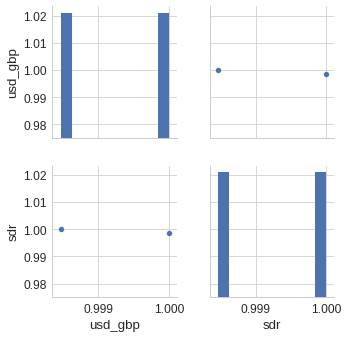

In [129]:
data1=pd.DataFrame()
data1['usd_gbp']=df_re['usd_gbp']
data1['sdr']=df_re['sdr']
data_corr=data1.corr()
data_corr
sns.pairplot(data_corr)
#sns.pairplot(returns[1:].dropna())

In [130]:
sdr_var=df_re.sdr.var()
sdr_var

1.4097958587749715e-06

In [131]:
#sdr_var=df_re.sdr.var()
#sdr_var

# Beta Calculation

In [132]:
beta_df2=pd.DataFrame()
beta=df_re_cov.sdr/sdr_var
beta_df2['value']=beta[:-1]
beta_df2

,value
usd_gbp,5.882698
usd_cny,-0.776491
usd_eur,2.323738
gbp_cny,5.047403
eur_cny,1.317629
eur_gbp,-2.959786
usd_jpy,-0.228522
btc_usd,0.447101
eth_usd,1.236839
btc_eth,0.021840


In [133]:
beta_df2=beta_df2.reset_index()

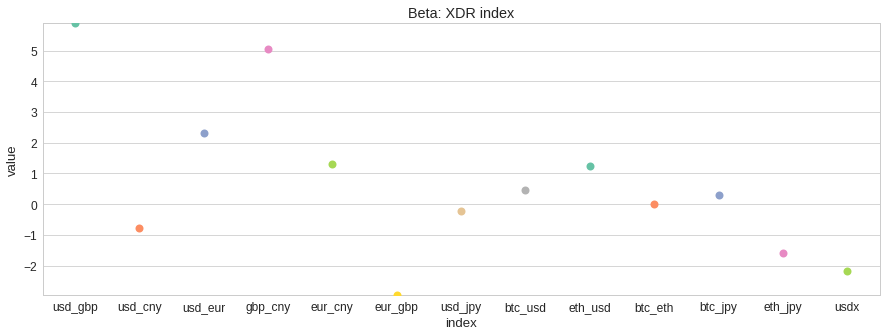

In [134]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_df2.value.min()
ymax=beta_df2.value.max()
g=sns.stripplot(x="index", y="value", data=beta_df2,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('Beta: XDR index')

Removing USD_CNY for SDR index calculation

In [135]:
xdr_index= (USD_USD.Value*0.4173) + (EUR_USD.Value*0.3093) + (0.0809*(1/USD_JPY.Value)) + (0.1092*USD_GBP.Value)
xdr_index=xdr_index.dropna()
xdr_df=xdr_index.to_frame()
return_xdr=xdr_df.Value.pct_change()[1:]
df_xdr_re=returns[1:]
df_xdr_re['xdr']=return_xdr
df_xdr_re=df_xdr_re.dropna()
df_xdr_re.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx,xdr
Date,,,,,,,,,,,,,,
2016-03-04,0.005229,-0.003797,0.005663,0.000422,0.002553,0.000620,0.003347,-0.024025,0.065241,-0.079096,-0.024618,0.000009,-0.003889,0.000914
2016-03-07,0.002109,0.001399,-0.000545,0.000627,-0.001385,-0.000581,-0.002721,0.021948,-0.134791,0.203065,0.018778,-0.153840,-0.001069,0.000373
2016-03-08,-0.002175,-0.001704,0.002181,-0.001286,0.005085,0.002195,-0.008979,-0.007159,0.040000,-0.036624,-0.005644,0.118182,-0.000323,-0.000376
2016-03-09,0.000773,0.000938,-0.000544,0.001709,-0.003875,-0.006095,0.004264,0.002088,0.169028,-0.181346,0.000582,0.056911,-0.002687,0.000133
2016-03-10,0.004917,-0.000538,0.012702,0.005443,-0.009501,-0.005276,0.000354,0.007438,-0.038095,0.072974,0.007109,0.000000,-0.002814,0.000866


In [136]:
df_xdrre_cov=df_xdr_re.cov()
df_xdrre_cov

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx,xdr
usd_gbp,4.893750e-05,-6.143767e-06,0.000019,0.000042,0.000011,-2.460380e-05,-2.019961e-06,4.360199e-06,1.126512e-05,-2.281159e-07,3.634915e-06,-0.000013,-1.795231e-05,8.324030e-06
usd_cny,-6.143767e-06,4.849595e-06,-0.000006,-0.000002,-0.000002,1.995162e-07,4.575262e-06,2.304575e-06,6.918352e-06,-6.174406e-06,6.368701e-06,0.000009,5.206658e-06,-1.040094e-06
usd_eur,1.911153e-05,-5.903502e-06,0.000024,0.000013,0.000012,1.714482e-06,-1.252217e-05,1.014281e-06,3.357478e-06,3.044882e-06,-4.615997e-06,0.000003,-1.784939e-05,3.237996e-06
gbp_cny,4.221563e-05,-2.053891e-06,0.000013,0.000044,0.000010,-2.636718e-05,1.618662e-06,1.018267e-05,2.521300e-05,-9.472064e-06,1.271540e-05,0.000007,-1.272502e-05,7.189072e-06
eur_cny,1.091903e-05,-1.739058e-06,0.000012,0.000010,0.000017,4.414621e-06,-3.887327e-06,7.460510e-06,4.462759e-06,6.999043e-06,3.555711e-06,0.000022,-8.899029e-06,1.859318e-06
eur_gbp,-2.460380e-05,1.995162e-07,0.000002,-0.000026,0.000004,3.466068e-05,-8.323957e-06,6.793377e-06,-1.419487e-05,1.875524e-05,6.143982e-06,-0.000010,9.475803e-07,-4.229946e-06
usd_jpy,-2.019961e-06,4.575262e-06,-0.000013,0.000002,-0.000004,-8.323957e-06,4.117560e-05,-7.336926e-06,2.845779e-07,-1.657338e-05,6.927977e-06,0.000024,1.417333e-05,-2.612454e-07
btc_usd,4.360199e-06,2.304575e-06,0.000001,0.000010,0.000007,6.793377e-06,-7.336926e-06,2.049379e-03,1.329348e-03,7.086953e-04,2.250922e-03,0.000318,-1.175101e-06,6.748214e-07
eth_usd,1.126512e-05,6.918352e-06,0.000003,0.000025,0.000004,-1.419487e-05,2.845779e-07,1.329348e-03,4.799102e-03,-3.326458e-03,1.448284e-03,0.001617,-3.405824e-06,1.870644e-06
btc_eth,-2.281159e-07,-6.174406e-06,0.000003,-0.000009,0.000007,1.875524e-05,-1.657338e-05,7.086953e-04,-3.326458e-03,4.026609e-03,7.794079e-04,-0.001270,-3.027055e-06,-5.798605e-08


In [137]:
xdr_var=df_xdr_re.xdr.var()
xdr_var

1.4196028376690213e-06

In [138]:
beta_df3=pd.DataFrame()
beta=df_xdrre_cov.xdr/xdr_var
beta_df3['value']=beta[:-1]
beta_df3=beta_df3.reset_index()
beta_df3

,index,value
0,usd_gbp,5.863633
1,usd_cny,-0.732666
2,usd_eur,2.280917
3,gbp_cny,5.064143
4,eur_cny,1.309745
5,eur_gbp,-2.979668
6,usd_jpy,-0.184027
7,btc_usd,0.475359
8,eth_usd,1.317723
9,btc_eth,-0.040847


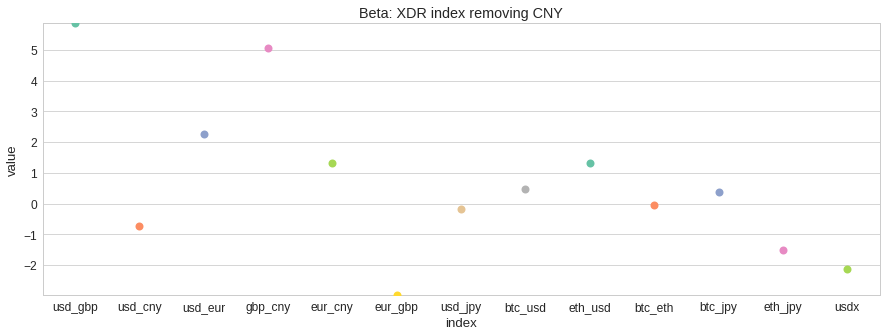

In [139]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_df3.value.min()
ymax=beta_df3.value.max()
g=sns.stripplot(x="index", y="value", data=beta_df3,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('Beta: XDR index removing CNY')

## Using USD-GBP single currency as the Index
### Verifying the volatility of the USD-GBP Pair

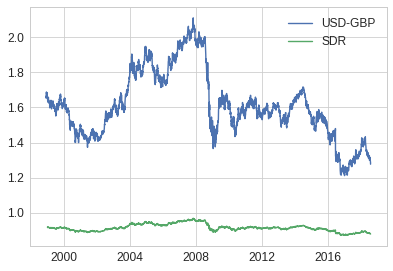

In [140]:
plt.plot(usd_gbp[7000:]) # Just picking the 7000, matches close enough, you can do real indexing if you like
plt.plot(sdr_df)
plt.legend(['USD-GBP', 'SDR'])

In [141]:
temp_var = pd.DataFrame()
temp_var = df_re.usd_gbp.var()

In [142]:
beta_df4=pd.DataFrame()

beta4=df_re_cov.usd_gbp/temp_var
beta_df4['value'] = beta4[:-1]
beta_df4=beta_df4.reset_index()
beta_df4

,index,value
0,usd_gbp,1.000000
1,usd_cny,-0.125543
2,usd_eur,0.390529
3,gbp_cny,0.862644
4,eur_cny,0.223122
5,eur_gbp,-0.502760
6,usd_jpy,-0.041276
7,btc_usd,0.089097
8,eth_usd,0.230194
9,btc_eth,-0.004661


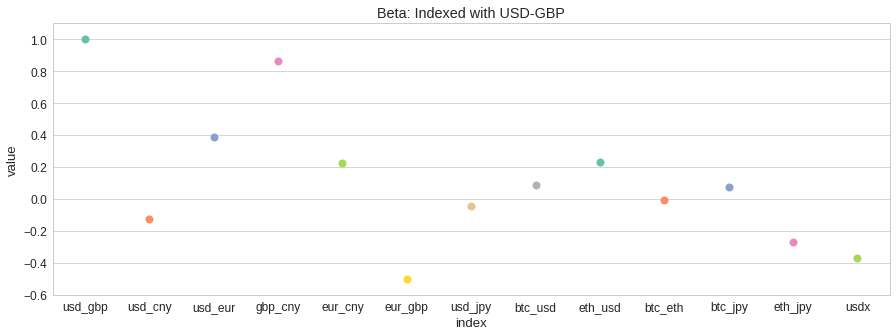

In [143]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_df4.value.min()
ymax=beta_df4.value.max()
g=sns.stripplot(x="index", y="value", data=beta_df4,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with USD-GBP')

# Using USD-GBP single currency as the Index
Verifying the volatility of the USD-GBP Pair

In [144]:
pairindex_df=returns[1:]
pairindex_df=pairindex_df.dropna()
pairindex_df

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx
Date,,,,,,,,,,,,,
2016-03-04,0.005229,-0.003797,0.005663,0.000422,0.002553,0.000620,0.003347,-0.024025,0.065241,-0.079096,-0.024618,0.000009,-0.003889
2016-03-07,0.002109,0.001399,-0.000545,0.000627,-0.001385,-0.000581,-0.002721,0.021948,-0.134791,0.203065,0.018778,-0.153840,-0.001069
2016-03-08,-0.002175,-0.001704,0.002181,-0.001286,0.005085,0.002195,-0.008979,-0.007159,0.040000,-0.036624,-0.005644,0.118182,-0.000323
2016-03-09,0.000773,0.000938,-0.000544,0.001709,-0.003875,-0.006095,0.004264,0.002088,0.169028,-0.181346,0.000582,0.056911,-0.002687
2016-03-10,0.004917,-0.000538,0.012702,0.005443,-0.009501,-0.005276,0.000354,0.007438,-0.038095,0.072974,0.007109,0.000000,-0.002814
2016-03-11,0.008388,-0.001998,0.001613,0.004136,0.018817,0.011300,0.004951,0.007888,0.012601,0.005376,0.010736,-0.061538,-0.004657
2016-03-14,-0.007071,0.000678,-0.006530,-0.004322,0.001539,-0.002152,-0.000616,0.004607,-0.166667,0.200218,0.008418,0.062494,0.005216
2016-03-15,-0.011030,0.001939,0.000450,-0.009121,0.001468,0.012011,-0.006251,0.001979,0.047200,-0.026594,0.001307,-0.175878,0.001198
2016-03-16,-0.004659,0.001213,-0.003330,-0.003448,-0.002157,0.004747,0.007176,0.001879,-0.012987,0.005278,-0.001168,0.070664,0.003256


In [145]:
pairindex_cov=pairindex_df.cov()
pairindex_cov

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx
usd_gbp,4.893750e-05,-6.143767e-06,0.000019,0.000042,0.000011,-2.460380e-05,-2.019961e-06,0.000004,1.126512e-05,-2.281159e-07,0.000004,-0.000013,-1.795231e-05
usd_cny,-6.143767e-06,4.849595e-06,-0.000006,-0.000002,-0.000002,1.995162e-07,4.575262e-06,0.000002,6.918352e-06,-6.174406e-06,0.000006,0.000009,5.206658e-06
usd_eur,1.911153e-05,-5.903502e-06,0.000024,0.000013,0.000012,1.714482e-06,-1.252217e-05,0.000001,3.357478e-06,3.044882e-06,-0.000005,0.000003,-1.784939e-05
gbp_cny,4.221563e-05,-2.053891e-06,0.000013,0.000044,0.000010,-2.636718e-05,1.618662e-06,0.000010,2.521300e-05,-9.472064e-06,0.000013,0.000007,-1.272502e-05
eur_cny,1.091903e-05,-1.739058e-06,0.000012,0.000010,0.000017,4.414621e-06,-3.887327e-06,0.000007,4.462759e-06,6.999043e-06,0.000004,0.000022,-8.899029e-06
eur_gbp,-2.460380e-05,1.995162e-07,0.000002,-0.000026,0.000004,3.466068e-05,-8.323957e-06,0.000007,-1.419487e-05,1.875524e-05,0.000006,-0.000010,9.475803e-07
usd_jpy,-2.019961e-06,4.575262e-06,-0.000013,0.000002,-0.000004,-8.323957e-06,4.117560e-05,-0.000007,2.845779e-07,-1.657338e-05,0.000007,0.000024,1.417333e-05
btc_usd,4.360199e-06,2.304575e-06,0.000001,0.000010,0.000007,6.793377e-06,-7.336926e-06,0.002049,1.329348e-03,7.086953e-04,0.002251,0.000318,-1.175101e-06
eth_usd,1.126512e-05,6.918352e-06,0.000003,0.000025,0.000004,-1.419487e-05,2.845779e-07,0.001329,4.799102e-03,-3.326458e-03,0.001448,0.001617,-3.405824e-06
btc_eth,-2.281159e-07,-6.174406e-06,0.000003,-0.000009,0.000007,1.875524e-05,-1.657338e-05,0.000709,-3.326458e-03,4.026609e-03,0.000779,-0.001270,-3.027055e-06


In [146]:
temp_var = pairindex_df.usd_gbp.var()
beta_pair1=pd.DataFrame()
beta =pairindex_cov.usd_gbp/temp_var
beta_pair1['value'] = beta
beta_pair1=beta_pair1.reset_index()
beta_pair1

,index,value
0,usd_gbp,1.000000
1,usd_cny,-0.125543
2,usd_eur,0.390529
3,gbp_cny,0.862644
4,eur_cny,0.223122
5,eur_gbp,-0.502760
6,usd_jpy,-0.041276
7,btc_usd,0.089097
8,eth_usd,0.230194
9,btc_eth,-0.004661


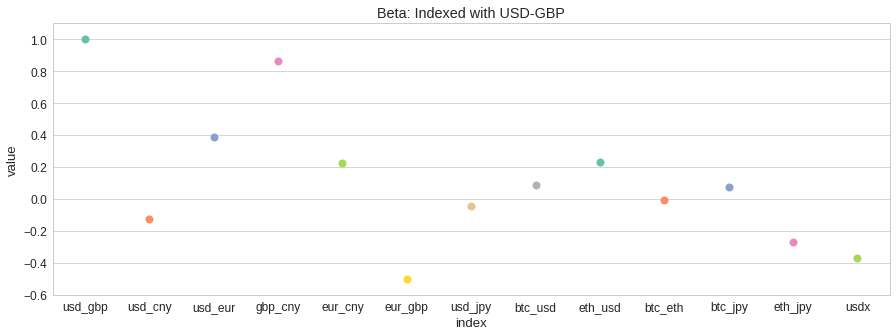

In [147]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair1.value.min()
ymax=beta_pair1.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair1,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with USD-GBP')

# Using USD-CNY single currency as the Index
Verifying the volatility of the USD-CNY Pair

In [148]:
temp_var = pairindex_df.usd_cny.var()
beta_pair2=pd.DataFrame()
beta =pairindex_cov.usd_cny/temp_var
beta_pair2['value'] = beta
beta_pair2=beta_pair2.reset_index()
beta_pair2

,index,value
0,usd_gbp,-1.266862
1,usd_cny,1.000000
2,usd_eur,-1.217318
3,gbp_cny,-0.423518
4,eur_cny,-0.358599
5,eur_gbp,0.041141
6,usd_jpy,0.943432
7,btc_usd,0.475210
8,eth_usd,1.426583
9,btc_eth,-1.273180


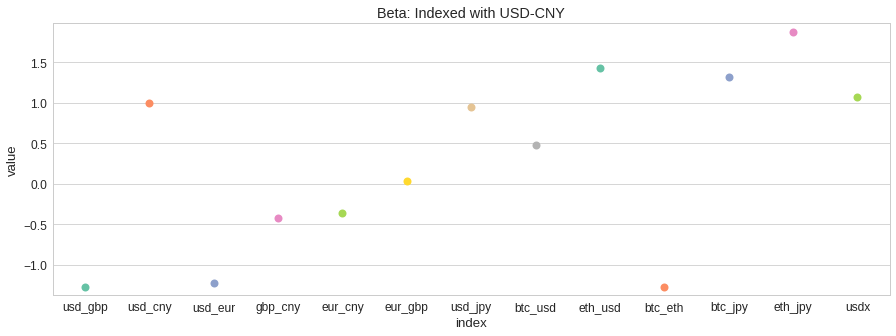

In [149]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair2.value.min()
ymax=beta_pair2.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair2,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with USD-CNY')

# Using USD-EUR single currency as the Index
Verifying the volatility of the USD-EUR Pair

In [150]:
temp_var = pairindex_df.usd_eur.var()
beta_pair3=pd.DataFrame()
beta =pairindex_cov.usd_eur/temp_var
beta_pair3['value'] = beta
beta_pair3=beta_pair3.reset_index()
beta_pair3

,index,value
0,usd_gbp,0.801107
1,usd_cny,-0.247460
2,usd_eur,1.000000
3,gbp_cny,0.555099
4,eur_cny,0.492817
5,eur_gbp,0.071867
6,usd_jpy,-0.524898
7,btc_usd,0.042516
8,eth_usd,0.140737
9,btc_eth,0.127634


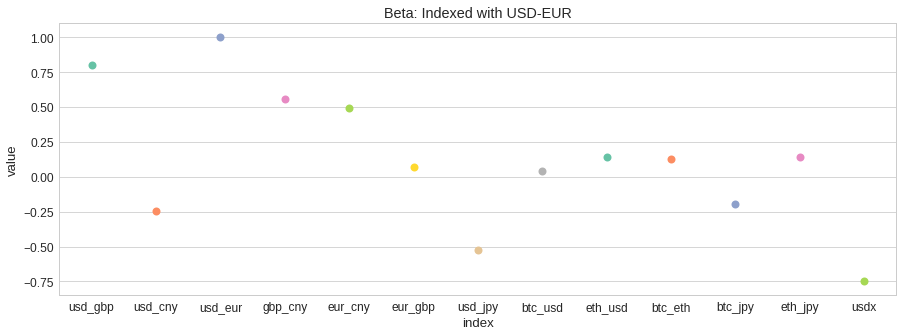

In [151]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair3.value.min()
ymax=beta_pair3.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair3,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with USD-EUR')

# Using GBP-CNY single currency as the Index
Verifying the volatility of the GBP-CNY Pair

In [152]:
temp_var = pairindex_df.gbp_cny.var()
beta_pair4=pd.DataFrame()
beta =pairindex_cov.gbp_cny/temp_var
beta_pair4['value'] = beta
beta_pair4=beta_pair4.reset_index()
beta_pair4

,index,value
0,usd_gbp,0.964812
1,usd_cny,-0.046940
2,usd_eur,0.302653
3,gbp_cny,1.000000
4,eur_cny,0.225155
5,eur_gbp,-0.602605
6,usd_jpy,0.036994
7,btc_usd,0.232718
8,eth_usd,0.576227
9,btc_eth,-0.216478


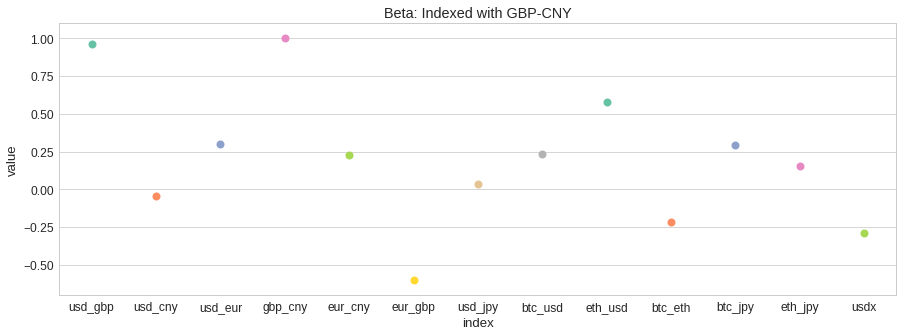

In [153]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair4.value.min()
ymax=beta_pair4.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair4,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with GBP-CNY')

# Using EUR-CNY single currency as the Index
Verifying the volatility of the EUR-CNY Pair

In [154]:
temp_var = pairindex_df.eur_cny.var()
beta_pair5=pd.DataFrame()
beta =pairindex_cov.eur_cny/temp_var
beta_pair5['value'] = beta
beta_pair5=beta_pair5.reset_index()
beta_pair5

,index,value
0,usd_gbp,0.627115
1,usd_cny,-0.099880
2,usd_eur,0.675233
3,gbp_cny,0.565816
4,eur_cny,1.000000
5,eur_gbp,0.253546
6,usd_jpy,-0.223262
7,btc_usd,0.428481
8,eth_usd,0.256311
9,btc_eth,0.401978


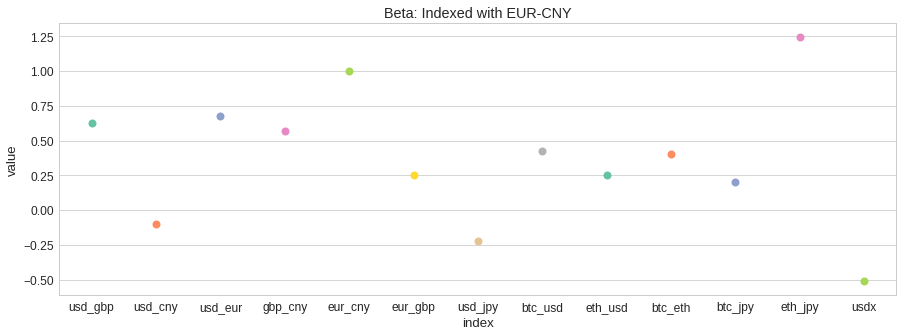

In [155]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair5.value.min()
ymax=beta_pair5.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair5,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with EUR-CNY')

# Using EUR-GBP single currency as the Index
Verifying the volatility of the EUR-GBP Pair

In [156]:
temp_var = pairindex_df.eur_gbp.var()
beta_pair6=pd.DataFrame()
beta =pairindex_cov.eur_gbp/temp_var
beta_pair6['value'] = beta
beta_pair6=beta_pair6.reset_index()
beta_pair6

,index,value
0,usd_gbp,-0.709847
1,usd_cny,0.005756
2,usd_eur,0.049465
3,gbp_cny,-0.760723
4,eur_cny,0.127367
5,eur_gbp,1.000000
6,usd_jpy,-0.240156
7,btc_usd,0.195997
8,eth_usd,-0.409538
9,btc_eth,0.541110


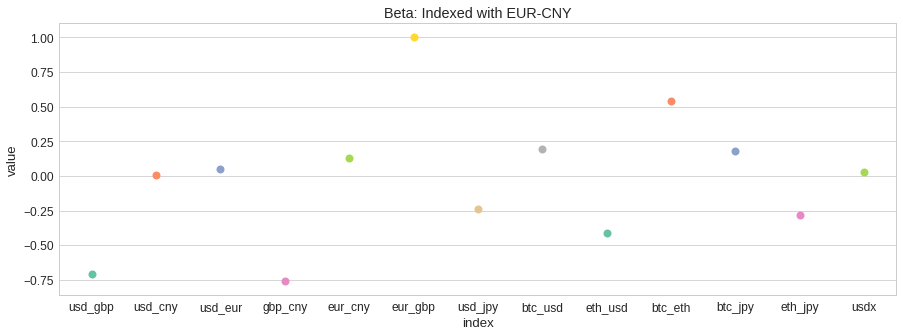

In [157]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair6.value.min()
ymax=beta_pair6.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair6,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with EUR-CNY')

# Using USD-JPY single currency as the Index
Verifying the volatility of the USD-JPY Pair

In [158]:
temp_var = pairindex_df.usd_jpy.var()
beta_pair7=pd.DataFrame()
beta =pairindex_cov.usd_jpy/temp_var
beta_pair7['value'] = beta
beta_pair7=beta_pair7.reset_index()
beta_pair7

,index,value
0,usd_gbp,-0.049057
1,usd_cny,0.111116
2,usd_eur,-0.304116
3,gbp_cny,0.039311
4,eur_cny,-0.094409
5,eur_gbp,-0.202158
6,usd_jpy,1.000000
7,btc_usd,-0.178186
8,eth_usd,0.006911
9,btc_eth,-0.402505


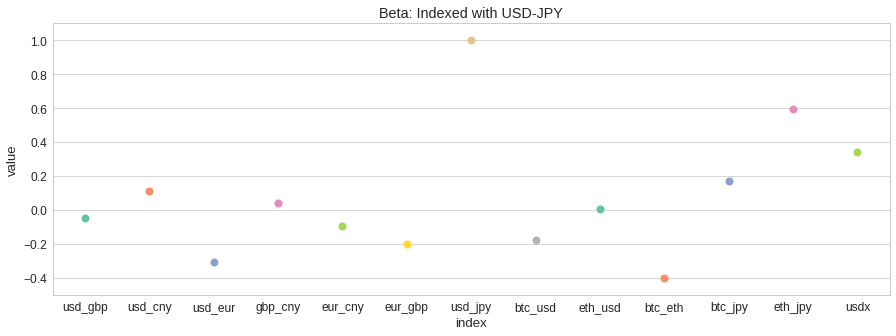

In [159]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair7.value.min()
ymax=beta_pair7.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair7,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with USD-JPY')

# Using BTC-USD single currency as the Index
Verifying the volatility of the BTC-USD Pair

In [160]:
temp_var = pairindex_df.btc_usd.var()
beta_pair8=pd.DataFrame()
beta =pairindex_cov.btc_usd/temp_var
beta_pair8['value'] = beta
beta_pair8=beta_pair8.reset_index()
beta_pair8

,index,value
0,usd_gbp,0.002128
1,usd_cny,0.001125
2,usd_eur,0.000495
3,gbp_cny,0.004969
4,eur_cny,0.003640
5,eur_gbp,0.003315
6,usd_jpy,-0.003580
7,btc_usd,1.000000
8,eth_usd,0.648659
9,btc_eth,0.345810


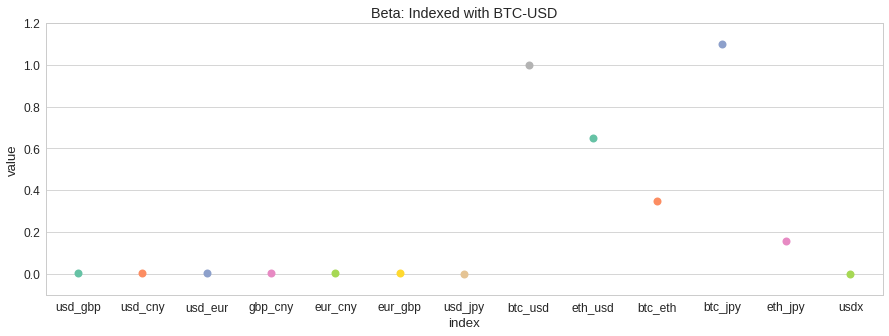

In [161]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair8.value.min()
ymax=beta_pair8.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair8,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with BTC-USD')

# Using ETH-USD single currency as the Index
Verifying the volatility of the ETH-USD Pair

In [162]:
temp_var = pairindex_df.eth_usd.var()
beta_pair9=pd.DataFrame()
beta =pairindex_cov.eth_usd/temp_var
beta_pair9['value'] = beta
beta_pair9=beta_pair9.reset_index()
beta_pair9

,index,value
0,usd_gbp,0.002347
1,usd_cny,0.001442
2,usd_eur,0.000700
3,gbp_cny,0.005254
4,eur_cny,0.000930
5,eur_gbp,-0.002958
6,usd_jpy,0.000059
7,btc_usd,0.276999
8,eth_usd,1.000000
9,btc_eth,-0.693142


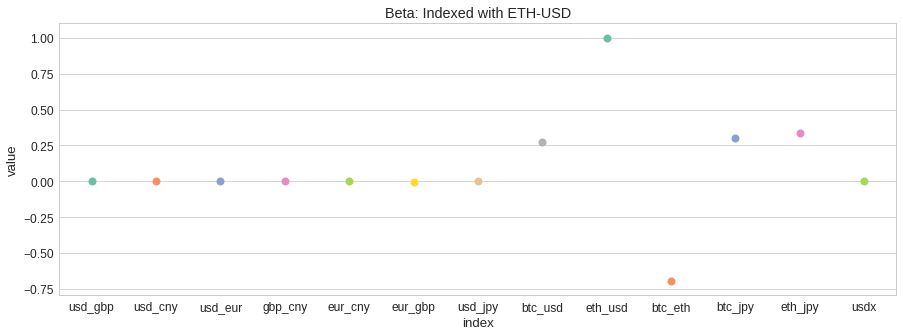

In [163]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair9.value.min()
ymax=beta_pair9.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair9,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with ETH-USD')

# Using BTC-ETH single currency as the Index
Verifying the volatility of the BTC-ETH Pair

In [164]:
temp_var = pairindex_df.btc_eth.var()
beta_pair10=pd.DataFrame()
beta =pairindex_cov.btc_eth/temp_var
beta_pair10['value'] = beta
beta_pair10=beta_pair10.reset_index()
beta_pair10

,index,value
0,usd_gbp,-0.000057
1,usd_cny,-0.001533
2,usd_eur,0.000756
3,gbp_cny,-0.002352
4,eur_cny,0.001738
5,eur_gbp,0.004658
6,usd_jpy,-0.004116
7,btc_usd,0.176003
8,eth_usd,-0.826119
9,btc_eth,1.000000


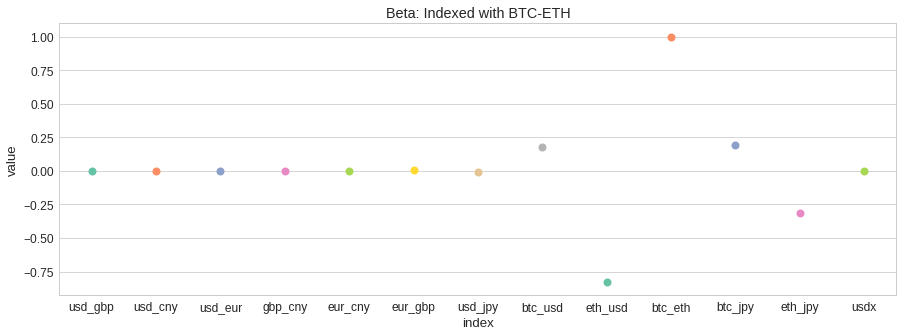

In [165]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair10.value.min()
ymax=beta_pair10.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair10,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with BTC-ETH')

# Using BTC-JPY single currency as the Index
Verifying the volatility of the BTC-JPY Pair

In [166]:
temp_var = pairindex_df.btc_jpy.var()
beta_pair11=pd.DataFrame()
beta =pairindex_cov.btc_jpy/temp_var
beta_pair11['value'] = beta
beta_pair11=beta_pair11.reset_index()
beta_pair11

,index,value
0,usd_gbp,0.001293
1,usd_cny,0.002265
2,usd_eur,-0.001642
3,gbp_cny,0.004523
4,eur_cny,0.001265
5,eur_gbp,0.002186
6,usd_jpy,0.002464
7,btc_usd,0.800691
8,eth_usd,0.515179
9,btc_eth,0.277248


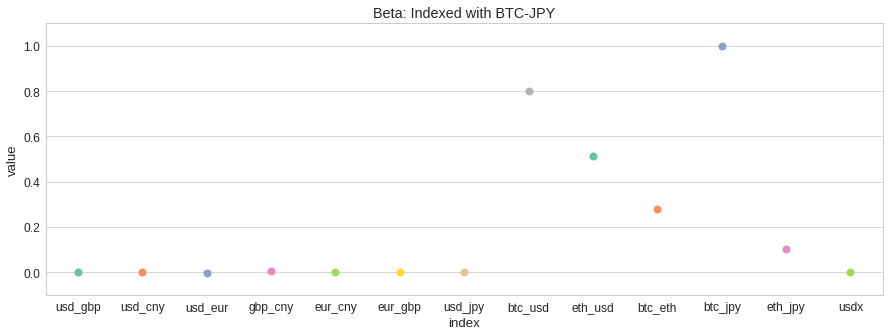

In [167]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair11.value.min()
ymax=beta_pair11.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair11,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with BTC-JPY')

# Using ETH-JPY single currency as the Index
Verifying the volatility of the ETH-JPY Pair

In [168]:
temp_var = pairindex_df.eth_jpy.var()
beta_pair12=pd.DataFrame()
beta =pairindex_cov.eth_jpy/temp_var
beta_pair12['value'] = beta
beta_pair12=beta_pair12.reset_index()
beta_pair12

,index,value
0,usd_gbp,-0.001253
1,usd_cny,0.000856
2,usd_eur,0.000315
3,gbp_cny,0.000622
4,eur_cny,0.002033
5,eur_gbp,-0.000917
6,usd_jpy,0.002300
7,btc_usd,0.029864
8,eth_usd,0.151901
9,btc_eth,-0.119252


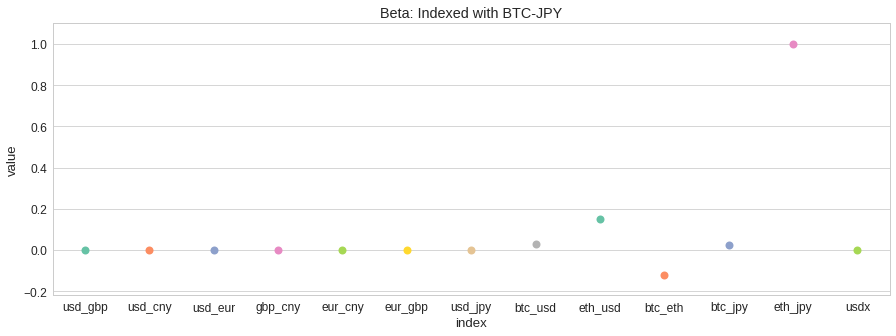

In [169]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=beta_pair12.value.min()
ymax=beta_pair12.value.max()
g=sns.stripplot(x="index", y="value", data=beta_pair12,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.1, ymax+0.1)
plt.title('Beta: Indexed with BTC-JPY')

# Beta Calculation using USDX Index 

USDX - The U.S. Dollar Index (USDX, DXY, DX) is an index (or measure) of the value of the United States dollar relative to a basket of foreign currencies.


In [173]:
dd_xy= pd.read_csv('USDX.csv')


In [174]:
ddxy= dd_xy.set_index('Date')
ddxy = ddxy.sort_index()
ddxy.index =pd.to_datetime(ddxy.index)
ddxy.head()


,Value
Date,
1973-01-02,108.2242
1973-01-03,108.2934
1973-01-04,108.2632
1973-01-05,108.2548
1973-01-08,108.3818


In [175]:
return_dxy=ddxy.Value.pct_change()[1:]
return_dxy=return_dxy.to_frame()

In [178]:
dxy_re=returns[1:]
dxy_re['usdx1']=return_dxy
dxy_re=dxy_re.dropna()
dxy_re

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx,usdx1
Date,,,,,,,,,,,,,,
2016-03-04,0.005229,-0.003797,0.005663,0.000422,0.002553,0.000620,0.003347,-0.024025,0.065241,-0.079096,-0.024618,0.000009,-0.003889,-0.003889
2016-03-07,0.002109,0.001399,-0.000545,0.000627,-0.001385,-0.000581,-0.002721,0.021948,-0.134791,0.203065,0.018778,-0.153840,-0.001069,-0.001069
2016-03-08,-0.002175,-0.001704,0.002181,-0.001286,0.005085,0.002195,-0.008979,-0.007159,0.040000,-0.036624,-0.005644,0.118182,-0.000323,-0.000323
2016-03-09,0.000773,0.000938,-0.000544,0.001709,-0.003875,-0.006095,0.004264,0.002088,0.169028,-0.181346,0.000582,0.056911,-0.002687,-0.002687
2016-03-10,0.004917,-0.000538,0.012702,0.005443,-0.009501,-0.005276,0.000354,0.007438,-0.038095,0.072974,0.007109,0.000000,-0.002814,-0.002814
2016-03-11,0.008388,-0.001998,0.001613,0.004136,0.018817,0.011300,0.004951,0.007888,0.012601,0.005376,0.010736,-0.061538,-0.004657,-0.004657
2016-03-14,-0.007071,0.000678,-0.006530,-0.004322,0.001539,-0.002152,-0.000616,0.004607,-0.166667,0.200218,0.008418,0.062494,0.005216,0.005216
2016-03-15,-0.011030,0.001939,0.000450,-0.009121,0.001468,0.012011,-0.006251,0.001979,0.047200,-0.026594,0.001307,-0.175878,0.001198,0.001198
2016-03-16,-0.004659,0.001213,-0.003330,-0.003448,-0.002157,0.004747,0.007176,0.001879,-0.012987,0.005278,-0.001168,0.070664,0.003256,0.003256


In [179]:
dxy_re_cov=dxy_re.cov()
dxy_re_cov

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx,usdx1
usd_gbp,4.893750e-05,-6.143767e-06,0.000019,0.000042,0.000011,-2.460380e-05,-2.019961e-06,0.000004,1.126512e-05,-2.281159e-07,0.000004,-0.000013,-1.795231e-05,-1.795231e-05
usd_cny,-6.143767e-06,4.849595e-06,-0.000006,-0.000002,-0.000002,1.995162e-07,4.575262e-06,0.000002,6.918352e-06,-6.174406e-06,0.000006,0.000009,5.206658e-06,5.206658e-06
usd_eur,1.911153e-05,-5.903502e-06,0.000024,0.000013,0.000012,1.714482e-06,-1.252217e-05,0.000001,3.357478e-06,3.044882e-06,-0.000005,0.000003,-1.784939e-05,-1.784939e-05
gbp_cny,4.221563e-05,-2.053891e-06,0.000013,0.000044,0.000010,-2.636718e-05,1.618662e-06,0.000010,2.521300e-05,-9.472064e-06,0.000013,0.000007,-1.272502e-05,-1.272502e-05
eur_cny,1.091903e-05,-1.739058e-06,0.000012,0.000010,0.000017,4.414621e-06,-3.887327e-06,0.000007,4.462759e-06,6.999043e-06,0.000004,0.000022,-8.899029e-06,-8.899029e-06
eur_gbp,-2.460380e-05,1.995162e-07,0.000002,-0.000026,0.000004,3.466068e-05,-8.323957e-06,0.000007,-1.419487e-05,1.875524e-05,0.000006,-0.000010,9.475803e-07,9.475803e-07
usd_jpy,-2.019961e-06,4.575262e-06,-0.000013,0.000002,-0.000004,-8.323957e-06,4.117560e-05,-0.000007,2.845779e-07,-1.657338e-05,0.000007,0.000024,1.417333e-05,1.417333e-05
btc_usd,4.360199e-06,2.304575e-06,0.000001,0.000010,0.000007,6.793377e-06,-7.336926e-06,0.002049,1.329348e-03,7.086953e-04,0.002251,0.000318,-1.175101e-06,-1.175101e-06
eth_usd,1.126512e-05,6.918352e-06,0.000003,0.000025,0.000004,-1.419487e-05,2.845779e-07,0.001329,4.799102e-03,-3.326458e-03,0.001448,0.001617,-3.405824e-06,-3.405824e-06
btc_eth,-2.281159e-07,-6.174406e-06,0.000003,-0.000009,0.000007,1.875524e-05,-1.657338e-05,0.000709,-3.326458e-03,4.026609e-03,0.000779,-0.001270,-3.027055e-06,-3.027055e-06


In [180]:
dxy_re_corr=dxy_re.corr()
dxy_re_corr

,usd_gbp,usd_cny,usd_eur,gbp_cny,eur_cny,eur_gbp,usd_jpy,btc_usd,eth_usd,btc_eth,btc_jpy,eth_jpy,usdx,usdx1
usd_gbp,1.000000,-0.398805,0.559335,0.912299,0.374063,-0.597397,-0.044999,0.013768,0.023245,-0.000514,0.009800,-0.018475,-0.632010,-0.632010
usd_cny,-0.398805,1.000000,-0.548851,-0.140997,-0.189253,0.015389,0.323775,0.023117,0.045349,-0.044185,0.054544,0.040128,0.582279,0.582279
usd_eur,0.559335,-0.548851,1.000000,0.409881,0.576859,0.059623,-0.399537,0.004587,0.009923,0.009824,-0.017824,0.006657,-0.900007,-0.900007
gbp_cny,0.912299,-0.140997,0.409881,1.000000,0.356926,-0.677064,0.038135,0.034004,0.055021,-0.022566,0.036255,0.009708,-0.473770,-0.473770
eur_cny,0.374063,-0.189253,0.576859,0.356926,1.000000,0.179703,-0.145182,0.039495,0.015438,0.026433,0.016072,0.050262,-0.525229,-0.525229
eur_gbp,-0.597397,0.015389,0.059623,-0.677064,0.179703,1.000000,-0.220339,0.025489,-0.034804,0.050204,0.019683,-0.016066,0.039639,0.039639
usd_jpy,-0.044999,0.323775,-0.399537,0.038135,-0.145182,-0.220339,1.000000,-0.025257,0.000640,-0.040703,0.020363,0.036988,0.543972,0.543972
btc_usd,0.013768,0.023117,0.004587,0.034004,0.039495,0.025489,-0.025257,1.000000,0.423885,0.246705,0.937781,0.068065,-0.006393,-0.006393
eth_usd,0.023245,0.045349,0.009923,0.055021,0.015438,-0.034804,0.000640,0.423885,1.000000,-0.756715,0.394299,0.226238,-0.012108,-0.012108
btc_eth,-0.000514,-0.044185,0.009824,-0.022566,0.026433,0.050204,-0.040703,0.246705,-0.756715,1.000000,0.231658,-0.193901,-0.011748,-0.011748


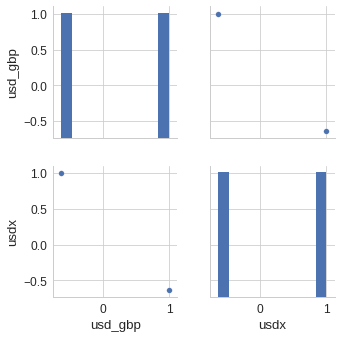

In [181]:
data1=pd.DataFrame()
data1['usd_gbp']=dxy_re['usd_gbp']
data1['usdx']=dxy_re['usdx']
data_corr=data1.corr()
data_corr
sns.pairplot(data_corr)
#sns.pairplot(returns[1:].dropna())

In [182]:
usdx_var=dxy_re.usdx.var()
usdx_var

1.6487334924730277e-05

In [183]:
betaxy_df=pd.DataFrame()
beta=dxy_re_cov.usdx/usdx_var
betaxy_df['value']=beta#[:-1]
betaxy_df

,value
usd_gbp,-1.088854
usd_cny,0.315797
usd_eur,-1.082612
gbp_cny,-0.771806
eur_cny,-0.539749
eur_gbp,0.057473
usd_jpy,0.859649
btc_usd,-0.071273
eth_usd,-0.206572
btc_eth,-0.183599


In [184]:
betaxy_df=betaxy_df.reset_index()

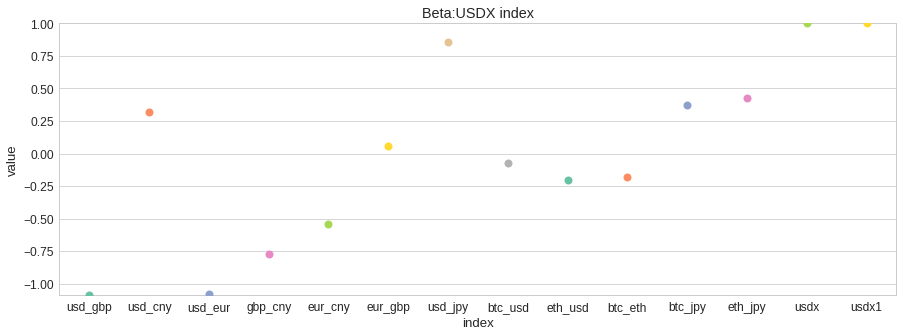

In [185]:
plt.figure(figsize=(15,5))
sns.set_context("paper", font_scale=1.5)    
ymin=betaxy_df.value.min()
ymax=betaxy_df.value.max()
g=sns.stripplot(x="index", y="value", data=betaxy_df,size=8,palette="Set2")#color='b')
g.set_ylim(ymin-0.00001, ymax+0.00001)
plt.title('Beta:USDX index')